In [357]:
import os
print(os.getcwd())  # Prints the current working directory

/Users/haimanwong


In [15]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [10]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 25.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 27.6 MB/s eta 0:00:00


In [11]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 29.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 35.0 MB/s eta 0:00:0000:0100:01


In [12]:
!pip install matplotlib

In [8]:
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.9 MB/s eta 0:00:00


In [31]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/haimanwong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [19]:
df1 = pd.read_csv('LATEST_categorized_nist_2021_rfis .csv')
df1

,Filename,Organization,Date,Text,Category
0,IEEE_SA_nist_rfi_2021.pdf,IEEE,2021-09-13 00:00:00,"September 13, 2021 - Submitted electronically ...",industry_associations
1,Weng_nist_rfi_2021-merged.pdf,Weng,2021-09-15 00:00:00,As of: 9/16/21 10:53 AM \r\nReceived: Septembe...,independent
2,UCB_nist_rfi_2021.pdf,UCB,2021-09-15 00:00:00,1 \r\n \r\n15 September 2021 \r\n \r\nElham Ta...,academia
3,AIST_nist_rfi_2021.pdf,AIST,2021-09-14 00:00:00,Comments for Request for Information on NIST’s...,tech_private_sector
4,DeLorey_nist_rfi_2021.pdf,DeLorey,2021-08-05 00:00:00,"From: \r\nSteve DeLorey \r\nTo: \r\nPrzybocki,...",independent
5,QuantUniversity_nist_rfi_2021.pdf,QuantUniversity,2021-09-15 00:00:00,09/15/2021 \r\nNIST \r\nSUBJECT: AI RISK MANAG...,tech_private_sector
6,GlobalCatastrophicRiskInstitute_nist_rfi_2021.pdf,GlobalCatastrophicRiskInstitute,2019-11-22 00:00:00,Comments templatefor Draft SP 800-207 \r\nPlea...,advocacy
7,Monitaur_nist_rfi_2021.pdf,Monitaur,2021-08-19 00:00:00,"August 19, 2021 \r\nNational Institute of Stan...",tech_private_sector
8,WiCyS_nist_rfi_2021.pdf,WiCyS,2021-08-17 00:00:00,As of: 8/18/21 9:20 AM \r\nReceived: August 17...,industry_associations
9,NEC_nist_rfi_2021.pdf,NEC,2021-09-15 00:00:00,1 \r\nNEC Corporation of America \r\n1820 Nort...,tech_private_sector


In [20]:
df1.head(5)

,Filename,Organization,Date,Text,Category
0,IEEE_SA_nist_rfi_2021.pdf,IEEE,2021-09-13 00:00:00,"September 13, 2021 - Submitted electronically ...",industry_associations
1,Weng_nist_rfi_2021-merged.pdf,Weng,2021-09-15 00:00:00,As of: 9/16/21 10:53 AM \r\nReceived: Septembe...,independent
2,UCB_nist_rfi_2021.pdf,UCB,2021-09-15 00:00:00,1 \r\n \r\n15 September 2021 \r\n \r\nElham Ta...,academia
3,AIST_nist_rfi_2021.pdf,AIST,2021-09-14 00:00:00,Comments for Request for Information on NIST’s...,tech_private_sector
4,DeLorey_nist_rfi_2021.pdf,DeLorey,2021-08-05 00:00:00,"From: \r\nSteve DeLorey \r\nTo: \r\nPrzybocki,...",independent


In [21]:
df1.describe()

,Filename,Organization,Date,Text,Category
count,104,104,104,104,104
unique,104,104,32,104,7
top,IEEE_SA_nist_rfi_2021.pdf,IEEE,2021-09-15 00:00:00,"September 13, 2021 - Submitted electronically ...",tech_private_sector
freq,1,1,30,1,38


In [22]:
df1.count()

Filename        104
Organization    104
Date            104
Text            104
Category        104
dtype: int64

In [23]:
df2 = pd.read_csv('LATEST_categorized_nist_2024_rfis .csv')
df2

,Filename,Organization,Date,Text,Category
0,IST_nist_rfi_2024.pdf,IST,2024-01-30,"IST Leadership\nMike McNerney\nChair, Board of...",advocacy
1,duality.technologies_nist_rfi_2024.pdf,duality.technologies,2024-02-01,"Duality Technologies, Inc. \nDuality Technolog...",tech_private_sector
2,checkfor.ai_nist_rfi_2024.pdf,checkfor.ai,2024-02-03,Comment on NIST Request for Information (RFI)\...,tech_private_sector
3,Sage_nist_rfi_2024.pdf,Sage,2024-02-02,1 \n \n \nSage uses the power of AI (Artificia...,tech_private_sector
4,ADS.societygroup.UCB_nist_rfi_2024.pdf,ADS.societygroup.UCB,2024-02-03,Comments on RFI Related to NIST's Assignments ...,academia
5,SWGFL_nist_rfi_2024.pdf,SWGFL,2024-02-02,Response to RFI on NIST's Assignments under Se...,advocacy
6,mattm_nist_rfi_2024.pdf,mattm,2024-02-02,An official website of the United States Gover...,independent
7,SVPA_nist_rfi_2024.pdf,SVPA,2024-02-02,"February 2, 2024\nSubmitted via regulations.go...",advocacy
8,holisticAI_nist_rfi_2024.pdf,holisticAI,2024-02-02,Holistic AI’s Response on NIST’s execution of ...,tech_private_sector
9,prismaguard_nist_rfi_2024.pdf,prismaguard,2023-11-01,RESPONSE TO NIST Request for Informa5on (RFI) ...,tech_private_sector


In [24]:
df2.describe()

,Filename,Organization,Date,Text,Category
count,239,239,239,239,239
unique,239,239,31,237,7
top,IST_nist_rfi_2024.pdf,IST,2024-02-02,Promoting Innovation Worldwide\n \nInformation...,independent
freq,1,1,159,2,84


In [25]:
df2.count()

Filename        239
Organization    239
Date            239
Text            239
Category        239
dtype: int64

In [26]:
df3 = pd.read_csv('nist_rfis_combined.csv')
df3

,Filename,Organization,Date,Text,year,doc_id
0,IEEE_SA_nist_rfi_2021.pdf,IEEE,"September 13, 2021","September 13, 2021 - Submitted electronically ...",2021,1
1,Weng_nist_rfi_2021-merged.pdf,Weng,"September 15, 2021",As of: 9/16/21 10:53 AM \r\nReceived: Septembe...,2021,2
2,UCB_nist_rfi_2021.pdf,UCB,NaN,1 \r\n \r\n15 September 2021 \r\n \r\nElham Ta...,2021,3
3,AIST_nist_rfi_2021.pdf,AIST,NaN,Comments for Request for Information on NIST’s...,2021,4
4,DeLorey_nist_rfi_2021.pdf,DeLorey,"August 5, 2021","From: \r\nSteve DeLorey \r\nTo: \r\nPrzybocki,...",2021,5
5,QuantUniversity_nist_rfi_2021.pdf,QuantUniversity,NaN,09/15/2021 \r\nNIST \r\nSUBJECT: AI RISK MANAG...,2021,6
6,GlobalCatastrophicRiskInstitute_nist_rfi_2021.pdf,GlobalCatastrophicRiskInstitute,"November 22, 2019",Comments templatefor Draft SP 800-207 \r\nPlea...,2021,7
7,Monitaur_nist_rfi_2021.pdf,Monitaur,"August 19, 2021","August 19, 2021 \r\nNational Institute of Stan...",2021,8
8,WiCyS_nist_rfi_2021.pdf,WiCyS,"August 17, 2021",As of: 8/18/21 9:20 AM \r\nReceived: August 17...,2021,9
9,NEC_nist_rfi_2021.pdf,NEC,"September 15, 2021",1 \r\nNEC Corporation of America \r\n1820 Nort...,2021,10


In [27]:
df3.count()

Filename        343
Organization    343
Date            245
Text            340
year            343
doc_id          343
dtype: int64

In [28]:
df3.describe()

,year,doc_id
count,343.000000,343.000000
mean,2023.090379,172.000000
std,1.380946,99.159804
min,2021.000000,1.000000
25%,2021.000000,86.500000
50%,2024.000000,172.000000
75%,2024.000000,257.500000
max,2024.000000,343.000000


### Text Cleaning

#### df1 cleaning

In [29]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

def cleaned_text(text):
    if pd.isnull(text):
        return ''  # Handle NaN values
    if isinstance(text, str):
        # Remove line breaks and other extra whitespace characters
        text = re.sub(r'\s+', ' ', text)
        # Lowercase the text
        text = text.lower()
        # Remove punctuation and special characters
        text = re.sub(r'[^\w\s]', '', text)
        # Remove numbers
        text = re.sub(r'\d', '', text)
        # Tokenize the text
        tokens = word_tokenize(text)
        # Remove stopwords
        stopwords_set = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word not in stopwords_set]
        return ' '.join(filtered_tokens)
    else:
        return ''  # Return empty string for non-string values

# Assuming df1 is already loaded with your data
df1['cleaned_text'] = df1['Text'].apply(cleaned_text)
print(df1[['Text', 'cleaned_text']].head())  # Print original and cleaned text to compare

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/haimanwong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haimanwong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Text  \
0  September 13, 2021 - Submitted electronically ...   
1  As of: 9/16/21 10:53 AM \r\nReceived: Septembe...   
2  1 \r\n \r\n15 September 2021 \r\n \r\nElham Ta...   
3  Comments for Request for Information on NIST’s...   
4  From: \r\nSteve DeLorey \r\nTo: \r\nPrzybocki,...   

                                        cleaned_text  
0  september submitted electronically via regulat...  
1  received september public submission status pe...  
2  september elham tabassi mark przybocki nationa...  
3  comments request information nists ai risk man...  
4  steve delorey przybocki mark fed subject trust...  


#### df2 cleaning

In [30]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

def cleaned_text(text):
    if pd.isnull(text):
        return ''  # Handle NaN values
    if isinstance(text, str):
        # Remove line breaks and other extra whitespace characters
        text = re.sub(r'\s+', ' ', text)
        # Lowercase the text
        text = text.lower()
        # Remove punctuation and special characters
        text = re.sub(r'[^\w\s]', '', text)
        # Remove numbers
        text = re.sub(r'\d', '', text)
        # Tokenize the text
        tokens = word_tokenize(text)
        # Remove stopwords
        stopwords_set = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word not in stopwords_set]
        return ' '.join(filtered_tokens)
    else:
        return ''  # Return empty string for non-string values

# Assuming df1 is already loaded with your data
df2['cleaned_text'] = df2['Text'].apply(cleaned_text)
print(df2[['Text', 'cleaned_text']].head())  # Print original and cleaned text to compare

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/haimanwong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haimanwong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Text  \
0  IST Leadership\nMike McNerney\nChair, Board of...   
1  Duality Technologies, Inc. \nDuality Technolog...   
2  Comment on NIST Request for Information (RFI)\...   
3  1 \n \n \nSage uses the power of AI (Artificia...   
4  Comments on RFI Related to NIST's Assignments ...   

                                        cleaned_text  
0  ist leadership mike mcnerney chair board direc...  
1  duality technologies inc duality technologies ...  
2  comment nist request information rfi related n...  
3  sage uses power ai artificial intelligence sup...  
4  comments rfi related nists assignments section...  


#### df3 cleaning

In [31]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

def cleaned_text(text):
    if pd.isnull(text):
        return ''  # Handle NaN values
    if isinstance(text, str):
        # Remove line breaks and other extra whitespace characters
        text = re.sub(r'\s+', ' ', text)
        # Lowercase the text
        text = text.lower()
        # Remove punctuation and special characters
        text = re.sub(r'[^\w\s]', '', text)
        # Remove numbers
        text = re.sub(r'\d', '', text)
        # Tokenize the text
        tokens = word_tokenize(text)
        # Remove stopwords
        stopwords_set = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word not in stopwords_set]
        return ' '.join(filtered_tokens)
    else:
        return ''  # Return empty string for non-string values

# Assuming df1 is already loaded with your data
df3['cleaned_text'] = df3['Text'].apply(cleaned_text)
print(df3[['Text', 'cleaned_text']].head())  # Print original and cleaned text to compare

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/haimanwong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haimanwong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Text  \
0  September 13, 2021 - Submitted electronically ...   
1  As of: 9/16/21 10:53 AM \r\nReceived: Septembe...   
2  1 \r\n \r\n15 September 2021 \r\n \r\nElham Ta...   
3  Comments for Request for Information on NIST’s...   
4  From: \r\nSteve DeLorey \r\nTo: \r\nPrzybocki,...   

                                        cleaned_text  
0  september submitted electronically via regulat...  
1  received september public submission status pe...  
2  september elham tabassi mark przybocki nationa...  
3  comments request information nists ai risk man...  
4  steve delorey przybocki mark fed subject trust...  


### Lemmatization and Stemming

#### df1 lemmatization and stemming

In [32]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

def stem_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Stem the tokens
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

# Apply lemmatization and stemming to your existing 'cleaned_text' column
df1['lemmatized_text'] = df1['cleaned_text'].apply(lemmatize_text)
df1['stemmed_text'] = df1['cleaned_text'].apply(stem_text)

In [33]:
print(df1['lemmatized_text'][7])

august national institute standard technology alicia chamber nist executive secretariat bureau drive gaithersburg md may concern monitaur pleased opportunity offer response nist artiﬁcial intelligence risk management framework important project opportunity accelerate effective governance assurance artiﬁcial intelligence ai machine learning ml system believe creating trust conﬁdence technology used managed stakeholder corporation regulator consumer beneﬁt extraordinary innovation fair safe compliant robust ﬁnd detailed recommendation listed question key takeaway ai actor need create comprehensive program ongoing governance assurance across ai system order protect society unique risk ai present risk management ai demand holistic approach incorporates human process oversight model data risk management ai actor use methodology machine learning assurance take advantage established effective crispdm framework already familiar many organization order accelerate adoption education achieving tr

In [34]:
print(df1['stemmed_text'][7])

august nation institut standard technolog alicia chamber nist execut secretariat bureau drive gaithersburg md may concern monitaur pleas opportun offer respons nist artiﬁci intellig risk manag framework import project opportun acceler effect govern assur artiﬁci intellig ai machin learn ml system believ creat trust conﬁdenc technolog use manag stakehold corpor regul consum beneﬁt extraordinari innov fair safe compliant robust ﬁnd detail recommend list question key takeaway ai actor need creat comprehens program ongo govern assur across ai system order protect societi uniqu risk ai present risk manag ai demand holist approach incorpor human process oversight model data risk manag ai actor use methodolog machin learn assur take advantag establish effect crispdm framework alreadi familiar mani organ order acceler adopt educ achiev transpar fair account ai system requir organ pursu context veriﬁ object primari goal govern assur effort look forward particip nist ai rmf futur sincer andrew c

#### df2 lemmatization and stemming

In [35]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

def stem_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Stem the tokens
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

# Apply lemmatization and stemming to your existing 'cleaned_text' column
df2['lemmatized_text'] = df2['cleaned_text'].apply(lemmatize_text)
df2['stemmed_text'] = df2['cleaned_text'].apply(stem_text)

In [36]:
print(df2['lemmatized_text'][7])

february submitted via regulationsgov gina raimondo laurie e locascio secretary commerce director nist u department commerce national institute standard technology constitution ave nw bureau drive washington dc gaithersburg md written comment request information related nist assignment section executive order concerning artificial intelligence executive order document citation fr secretary commerce gina raimondo director national institute standard technology laurie e locascio behalf sexual violence prevention association svpa national nonprofit dedicated preventing sexual violence systemically would like thank department commerce national instute standard technology opportunity submit formal comment development use artificial intelligence ai welcome executive office effort address use ai certain aspect executive order feel need addressed future regulation specifically believe regulation cover nonconsensual deepfake pornography issue must covered comprehensively due increasing prolifer

In [37]:
print(df2['stemmed_text'][7])

februari submit via regulationsgov gina raimondo lauri e locascio secretari commerc director nist us depart commerc nation institut standard technolog constitut ave nw bureau drive washington dc gaithersburg md written comment request inform relat nist assign section execut order concern artifici intellig execut order document citat fr secretari commerc gina raimondo director nation institut standard technolog lauri e locascio behalf sexual violenc prevent associ svpa nation nonprofit dedic prevent sexual violenc system would like thank depart commerc nation instut standard technolog opportun submit formal comment develop use artifici intellig ai welcom execut offic effort address use ai certain aspect execut order feel need address futur regul specif believ regul cover nonconsensu deepfak pornographi issu must cover comprehens due increas prolifer unit state recent analysi found unit state rank nd world deepfak pornographi deepfak internet pornographi deepfak share onlin number deepfa

#### df3 lemmatization and stemming

In [38]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

def stem_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Stem the tokens
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

# Apply lemmatization and stemming to your existing 'cleaned_text' column
df3['lemmatized_text'] = df3['cleaned_text'].apply(lemmatize_text)
df3['stemmed_text'] = df3['cleaned_text'].apply(stem_text)

In [39]:
print(df3['lemmatized_text'][17])

september request information artificial intelligence risk management framework fed reg july docket overview boston consulting group welcome opportunity respond nist rfi artificial intelligence risk management framework believe competitive advantage exists intersection data science technology people deep business expertise unlock true power ai must woven process way working applied really matter response greatest challenge improving ai actor manage airelated risk manage mean identify assess prioritize respond communicate risk ai risk much like risk problem faced traditional software product vary upon ai deployed would encourage nist emphasize importance design system thinking come ai risk management type thinking combination traditional cybersecurity threat modeling allow ai actor better understand ai system critical identification assessment prioritization ai risk one biggest issue nist could solve framework ability communicate risk effectively recommend first step establishing defini

In [40]:
print(df3['stemmed_text'][17])

septemb request inform artifici intellig risk manag framework fed reg juli docket overview boston consult group welcom opportun respond nist rfi artifici intellig risk manag framework believ competit advantag exist intersect data scienc technolog peopl deep busi expertis unlock true power ai must woven process way work appli realli matter respons greatest challeng improv ai actor manag airel risk manag mean identifi assess priorit respond commun risk ai risk much like risk problem face tradit softwar product vari upon ai deploy would encourag nist emphas import design system think come ai risk manag type think combin tradit cybersecur threat model allow ai actor better understand ai system critic identif assess priorit ai risk one biggest issu nist could solv framework abil commun risk effect recommend first step establish definit mean behind word phrase concept use frequent space often carri ambigu establish ai dictionari would help enabl ai actor commun risk organ current defin manag

### Vectorization

#### df1 vectorization

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features

# Fit and transform your lemmatized text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df1['lemmatized_text'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df1 = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [42]:
tfidf_df1.head(10)

ability      able  academic    access  accessible  according   account  \
0  0.000000  0.005906  0.000000  0.000000      0.0086   0.000000  0.035595   
1  0.000000  0.003499  0.000000  0.000000      0.0000   0.009922  0.004519   
2  0.003316  0.000000  0.000000  0.000000      0.0000   0.005040  0.003316   
3  0.000000  0.000000  0.000000  0.000000      0.0000   0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000      0.0000   0.000000  0.000000   
5  0.000000  0.027035  0.059718  0.000000      0.0000   0.000000  0.000000   
6  0.000000  0.018970  0.000000  0.000000      0.0000   0.000000  0.065335   
7  0.012872  0.029898  0.000000  0.000000      0.0000   0.000000  0.012872   
8  0.000000  0.000000  0.000000  0.000000      0.0000   0.000000  0.000000   
9  0.000000  0.010615  0.011723  0.020149      0.0000   0.000000  0.027420   

   accountability  accountable  accuracy  accurate   achieve       acm  \
0        0.009091     0.013891  0.009190  0.000000  0.005677  0.000000   
1        0.000000     0.000000  0.004991  0.004049  0.000000  0.003571   
2        0.041500     0.000000  0.002997  0.000000  0.003703  0.035371   
3        0.000000     0.000000  0.048706  0.000000  0.000000  0.000000   
4        0.000000     0.000000  0.000000  0.000000  0.000000  0.000000   
5        0.000000     0.015898  0.000000  0.000000  0.000000  0.000000   
6        0.014600     0.000000  0.014759  0.000000  0.018236  0.000000   
7        0.057528     0.000000  0.023262  0.000000  0.014371  0.000000   
8        0.000000     0.000000  0.000000  0.000000  0.000000  0.000000   
9        0.000000     0.000000  0.008259  0.024567  0.020409  0.000000   

   acquiring  acquisition    across       act  actiac    action  activity  \
0   0.000000     0.000000  0.000000  0.011503     0.0  0.000000  0.006332   
1   0.000000     0.008116  0.017762  0.002840     0.0  0.020975  0.000625   
2   0.000000     0.000000  0.020527  0.022505     0.0  0.000000  0.000000   
3   0.000000     0.000000  0.000000  0.000000     0.0  0.064328  0.067121   
4   0.000000     0.000000  0.000000  0.000000     0.0  0.000000  0.000000   
5   0.025216     0.000000  0.000000  0.000000     0.0  0.013891  0.000000   
6   0.000000     0.000000  0.000000  0.000000     0.0  0.000000  0.020340   
7   0.000000     0.000000  0.091058  0.043676     0.0  0.000000  0.000000   
8   0.000000     0.000000  0.000000  0.000000     0.0  0.000000  0.000000   
9   0.000000     0.000000  0.032328  0.010338     0.0  0.032724  0.000000   

      actor  addition  additional  additionally   address  addressed  \
0  0.031239  0.004969    0.016398      0.000000  0.000000   0.000000   
1  0.000000  0.000491    0.001080      0.000000  0.008423   0.002092   
2  0.006791  0.022683    0.014259      0.000000  0.013906   0.004606   
3  0.000000  0.000000    0.000000      0.000000  0.000000   0.000000   
4  0.000000  0.000000    0.000000      0.000000  0.000000   0.000000   
5  0.000000  0.034119    0.037534      0.000000  0.019522   0.000000   
6  0.016724  0.000000    0.000000      0.060146  0.000000   0.000000   
7  0.039538  0.025155    0.013836      0.015800  0.000000   0.000000   
8  0.000000  0.000000    0.000000      0.000000  0.000000   0.000000   
9  0.000000  0.026792    0.009825      0.022437  0.038325   0.000000   

   addressing  administration  administrative     adopt   adopted  adoption  \
0    0.047888             0.0             0.0  0.000000  0.006726  0.011210   
1    0.000000             0.0             0.0  0.000654  0.001328  0.000000   
2    0.011712             0.0             0.0  0.008638  0.000000  0.003655   
3    0.000000             0.0             0.0  0.000000  0.000000  0.000000   
4    0.000000             0.0             0.0  0.000000  0.000000  0.000000   
5    0.000000             0.0             0.0  0.000000  0.015396  0.025660   
6    0.000000             0.0             0.0  0.000000  0.000000  0.000000   
7    0.000000             0.0             0.0  0.000000  

#### df2 vectorization

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features

# Fit and transform your lemmatized text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df2['lemmatized_text'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df2 = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [44]:
tfidf_df2.head(10)

ability      able     abuse  academic  acceptable    access  accessed  \
0  0.000000  0.000000  0.000000  0.000000     0.00000  0.374759       0.0   
1  0.008138  0.008362  0.000000  0.000000     0.00000  0.044725       0.0   
2  0.000000  0.049801  0.000000  0.065020     0.00000  0.000000       0.0   
3  0.000000  0.000000  0.000000  0.000000     0.00000  0.000000       0.0   
4  0.000000  0.006820  0.025930  0.000000     0.00000  0.018239       0.0   
5  0.000000  0.015809  0.260468  0.000000     0.00000  0.000000       0.0   
6  0.000000  0.000000  0.000000  0.000000     0.00000  0.074905       0.0   
7  0.000000  0.000000  0.000000  0.000000     0.00000  0.000000       0.0   
8  0.000000  0.000000  0.000000  0.092853     0.01693  0.073966       0.0   
9  0.014049  0.003937  0.008315  0.003427     0.00000  0.029245       0.0   

   accessibility  accessible   account  accountability  accuracy   achieve  \
0       0.000000    0.000000  0.038754        0.000000  0.000000  0.000000   
1       0.000000    0.000000  0.000000        0.008746  0.029278  0.010521   
2       0.000000    0.000000  0.000000        0.000000  0.348742  0.000000   
3       0.000000    0.000000  0.022938        0.000000  0.000000  0.000000   
4       0.000000    0.000000  0.008173        0.028532  0.000000  0.000000   
5       0.000000    0.000000  0.000000        0.000000  0.000000  0.000000   
6       0.173772    0.115974  0.000000        0.000000  0.000000  0.000000   
7       0.000000    0.000000  0.000000        0.000000  0.000000  0.000000   
8       0.000000    0.016360  0.014205        0.000000  0.013834  0.000000   
9       0.001357    0.000000  0.026735        0.002745  0.003063  0.003302   

        acm    across       act    action  activity     actor  addition  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.040041  0.000000  0.000000  0.009394  0.062423  0.000000   
2  0.000000  0.079490  0.000000  0.000000  0.000000  0.046471  0.000000   
3  0.000000  0.030551  0.000000  0.019036  0.000000  0.000000  0.000000   
4  0.104633  0.005443  0.000000  0.000000  0.000000  0.025456  0.036290   
5  0.000000  0.000000  0.017437  0.015723  0.000000  0.000000  0.000000   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8  0.000000  0.009460  0.000000  0.023577  0.000000  0.011061  0.025229   
9  0.000000  0.016756  0.030395  0.046983  0.026537  0.011021  0.005586   

   additional  additionally   address  addressed  addressing  administration  \
0    0.000000      0.000000  0.000000   0.000000    0.000000        0.000000   
1    0.000000      0.010158  0.006929   0.000000    0.000000        0.000000   
2    0.000000      0.000000  0.000000   0.000000    0.000000        0.000000   
3    0.059715      0.000000  0.015861   0.000000    0.000000        0.025989   
4    0.014185      0.016570  0.005652   0.000000    0.007344        0.000000   
5    0.000000      0.000000  0.013101   0.000000    0.017024        0.000000   
6    0.000000      0.000000  0.000000   0.000000    0.000000        0.000000   
7    0.000000      0.000000  0.021493   0.032400    0.000000        0.000000   
8    0.000000      0.000000  0.009823   0.014807    0.000000        0.000000   
9    0.019105      0.000000  0.040235   0.001639    0.011304        0.035635   

      adopt  adoption   advance  advanced  advancing  adversarial  adversary  \
0  0.000000  0.000000  0.000000  0.000000   0.000000     0.000000   0.000000   
1  0.000000  0.017392  0.007884  0.000000   0.000000     0.000000   0.026875   
2  0.000000  0.051790  0.000000  0.000000   0.000000     0.000000   0.000000   
3  0.023742  0.019905  0.036094  0.000000   0.000000     0.044972   0.000000   
4  0.000000  0.000000  0.025721  0.000000   0.000000     0.024036   0.000000   
5  0.000000  0.000000  0.000000  0.017762   0.000000     0.000000   0.000000   
6  0.000000  0.000000  0.00000

#### df3 vectorization

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features

# Fit and transform your lemmatized text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df3['lemmatized_text'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df3 = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [46]:
tfidf_df3.head(10)

ability      able    abuse  academic  acceptable    access  accessed  \
0  0.000000  0.005323  0.00000  0.000000    0.000000  0.000000       0.0   
1  0.000000  0.003602  0.00000  0.000000    0.008512  0.000000       0.0   
2  0.003238  0.000000  0.01406  0.000000    0.000000  0.000000       0.0   
3  0.000000  0.000000  0.00000  0.000000    0.000000  0.000000       0.0   
4  0.000000  0.000000  0.00000  0.000000    0.000000  0.000000       0.0   
5  0.000000  0.024596  0.00000  0.060987    0.000000  0.000000       0.0   
6  0.000000  0.016050  0.00000  0.000000    0.000000  0.000000       0.0   
7  0.012544  0.026558  0.00000  0.000000    0.000000  0.000000       0.0   
8  0.000000  0.000000  0.00000  0.000000    0.000000  0.000000       0.0   
9  0.000000  0.010418  0.00000  0.012916    0.000000  0.019116       0.0   

   accessibility   account  accountability  accountable  accuracy   achieve  \
0            0.0  0.040414        0.010169     0.014303  0.010944  0.006226   
1            0.0  0.005861        0.000000     0.000000  0.006789  0.000000   
2            0.0  0.003718        0.045845     0.000000  0.003524  0.004010   
3            0.0  0.000000        0.000000     0.000000  0.056604  0.000000   
4            0.0  0.000000        0.000000     0.000000  0.000000  0.000000   
5            0.0  0.000000        0.000000     0.016523  0.000000  0.000000   
6            0.0  0.069635        0.015332     0.000000  0.016500  0.018774   
7            0.0  0.014403        0.063425     0.000000  0.027303  0.015533   
8            0.0  0.000000        0.000000     0.000000  0.000000  0.000000   
9            0.0  0.033900        0.000000     0.000000  0.010710  0.024373   

        acm  acquisition    across       act    action  activity     actor  \
0  0.000000     0.000000  0.000000  0.011402  0.000000  0.005925  0.029513   
1  0.003999     0.010366  0.018956  0.003215  0.021178  0.000668  0.000000   
2  0.034247     0.000000  0.018941  0.022029  0.000000  0.000000  0.006336   
3  0.000000     0.000000  0.000000  0.000000  0.055492  0.061286  0.000000   
4  0.000000     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5  0.000000     0.000000  0.000000  0.000000  0.012395  0.000000  0.000000   
6  0.000000     0.000000  0.000000  0.000000  0.000000  0.017865  0.014832   
7  0.000000     0.000000  0.083853  0.042667  0.000000  0.000000  0.036814   
8  0.000000     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9  0.000000     0.000000  0.032893  0.011158  0.031499  0.000000  0.000000   

   addition  additional  additionally   address  addressed  addressing  \
0  0.005261    0.016157      0.000000  0.000000   0.000000    0.045228   
1  0.000593    0.001215      0.000000  0.009603   0.002233    0.000000   
2  0.023719    0.013874      0.000000  0.013708   0.004250    0.010923   
3  0.000000    0.000000      0.000000  0.000000   0.000000    0.000000   
4  0.000000    0.000000      0.000000  0.000000   0.000000    0.000000   
5  0.036468    0.037331      0.000000  0.019670   0.000000    0.000000   
6  0.000000    0.000000      0.056323  0.000000   0.000000    0.000000   
7  0.026251    0.013436      0.015533  0.000000   0.000000    0.000000   
8  0.000000    0.000000      0.000000  0.000000   0.000000    0.000000   
9  0.030892    0.010541      0.024373  0.041658   0.000000    0.000000   

   administration  administrative     adopt  adoption   advance  advanced  \
0             0.0             0.0  0.000000  0.010772  0.004713  0.000000   
1             0.0             0.0  0.000730  0.000000  0.004252  0.000000   
2             0.0             0.0  0.008332  0.003469  0.003035  0.011810   
3             0.0             0.0  0.000000  0.000000  0.000000  0.189693   
4             0.0             0.0  0.000000  0.000000  0.000000  0.000000   
5             0.0             0.0  0.000000  0.024887  0.010888  0.000000   
6             0.0             0.0  0.000000  0.000000  0.014210  0.036864   
7      

### Parts of Speech (POS) Tagging

#### df1 POS tagging

In [47]:
# Download the NLTK POS tagger data (if not already downloaded)
nltk.download('averaged_perceptron_tagger')

# Define a function to perform POS tagging on a text
def pos_tag_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Perform POS tagging
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

# Apply POS tagging to your lemmatized text column
df1['pos_tags'] = df1['lemmatized_text'].apply(pos_tag_text)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/haimanwong/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [48]:
print(df1['pos_tags'][7])

[('august', 'JJ'), ('national', 'JJ'), ('institute', 'NN'), ('standard', 'NN'), ('technology', 'NN'), ('alicia', 'JJ'), ('chamber', 'NN'), ('nist', 'JJ'), ('executive', 'NN'), ('secretariat', 'NN'), ('bureau', 'NN'), ('drive', 'NN'), ('gaithersburg', 'NN'), ('md', 'NN'), ('may', 'MD'), ('concern', 'NN'), ('monitaur', 'VB'), ('pleased', 'JJ'), ('opportunity', 'NN'), ('offer', 'VBP'), ('response', 'NN'), ('nist', 'JJ'), ('artiﬁcial', 'JJ'), ('intelligence', 'NN'), ('risk', 'NN'), ('management', 'NN'), ('framework', 'NN'), ('important', 'JJ'), ('project', 'NN'), ('opportunity', 'NN'), ('accelerate', 'VBP'), ('effective', 'JJ'), ('governance', 'NN'), ('assurance', 'NN'), ('artiﬁcial', 'JJ'), ('intelligence', 'NN'), ('ai', 'NN'), ('machine', 'NN'), ('learning', 'VBG'), ('ml', 'JJ'), ('system', 'NN'), ('believe', 'VBP'), ('creating', 'VBG'), ('trust', 'NN'), ('conﬁdence', 'NN'), ('technology', 'NN'), ('used', 'VBN'), ('managed', 'VBD'), ('stakeholder', 'JJ'), ('corporation', 'NN'), ('regulat

#### df2 POS tagging

In [49]:
# Download the NLTK POS tagger data (if not already downloaded)
nltk.download('averaged_perceptron_tagger')

# Define a function to perform POS tagging on a text
def pos_tag_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Perform POS tagging
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

# Apply POS tagging to your lemmatized text column
df2['pos_tags'] = df2['lemmatized_text'].apply(pos_tag_text)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/haimanwong/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [50]:
print(df2['pos_tags'][7])

[('february', 'JJ'), ('submitted', 'VBD'), ('via', 'IN'), ('regulationsgov', 'NN'), ('gina', 'NNS'), ('raimondo', 'VBP'), ('laurie', 'JJ'), ('e', 'NN'), ('locascio', 'NN'), ('secretary', 'NN'), ('commerce', 'NN'), ('director', 'NN'), ('nist', 'JJ'), ('u', 'JJ'), ('department', 'NN'), ('commerce', 'NN'), ('national', 'JJ'), ('institute', 'NN'), ('standard', 'NN'), ('technology', 'NN'), ('constitution', 'NN'), ('ave', 'VBP'), ('nw', 'VBN'), ('bureau', 'NN'), ('drive', 'NN'), ('washington', 'NN'), ('dc', 'VBZ'), ('gaithersburg', 'JJ'), ('md', 'NNS'), ('written', 'VBN'), ('comment', 'JJ'), ('request', 'NN'), ('information', 'NN'), ('related', 'VBN'), ('nist', 'JJ'), ('assignment', 'JJ'), ('section', 'NN'), ('executive', 'NN'), ('order', 'NN'), ('concerning', 'VBG'), ('artificial', 'JJ'), ('intelligence', 'NN'), ('executive', 'NN'), ('order', 'NN'), ('document', 'NN'), ('citation', 'NN'), ('fr', 'NN'), ('secretary', 'NN'), ('commerce', 'NN'), ('gina', 'NN'), ('raimondo', 'NN'), ('director',

#### df3 POS tagging

In [51]:
# Download the NLTK POS tagger data (if not already downloaded)
nltk.download('averaged_perceptron_tagger')

# Define a function to perform POS tagging on a text
def pos_tag_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Perform POS tagging
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

# Apply POS tagging to your lemmatized text column
df3['pos_tags'] = df3['lemmatized_text'].apply(pos_tag_text)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/haimanwong/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [52]:
print(df3['pos_tags'][7])

[('august', 'JJ'), ('national', 'JJ'), ('institute', 'NN'), ('standard', 'NN'), ('technology', 'NN'), ('alicia', 'JJ'), ('chamber', 'NN'), ('nist', 'JJ'), ('executive', 'NN'), ('secretariat', 'NN'), ('bureau', 'NN'), ('drive', 'NN'), ('gaithersburg', 'NN'), ('md', 'NN'), ('may', 'MD'), ('concern', 'NN'), ('monitaur', 'VB'), ('pleased', 'JJ'), ('opportunity', 'NN'), ('offer', 'VBP'), ('response', 'NN'), ('nist', 'JJ'), ('artiﬁcial', 'JJ'), ('intelligence', 'NN'), ('risk', 'NN'), ('management', 'NN'), ('framework', 'NN'), ('important', 'JJ'), ('project', 'NN'), ('opportunity', 'NN'), ('accelerate', 'VBP'), ('effective', 'JJ'), ('governance', 'NN'), ('assurance', 'NN'), ('artiﬁcial', 'JJ'), ('intelligence', 'NN'), ('ai', 'NN'), ('machine', 'NN'), ('learning', 'VBG'), ('ml', 'JJ'), ('system', 'NN'), ('believe', 'VBP'), ('creating', 'VBG'), ('trust', 'NN'), ('conﬁdence', 'NN'), ('technology', 'NN'), ('used', 'VBN'), ('managed', 'VBD'), ('stakeholder', 'JJ'), ('corporation', 'NN'), ('regulat

In [53]:
print(df3['pos_tags'][17])

[('september', 'VB'), ('request', 'JJS'), ('information', 'NN'), ('artificial', 'JJ'), ('intelligence', 'NN'), ('risk', 'NN'), ('management', 'NN'), ('framework', 'NN'), ('fed', 'VBD'), ('reg', 'JJ'), ('july', 'NN'), ('docket', 'NN'), ('overview', 'IN'), ('boston', 'NN'), ('consulting', 'VBG'), ('group', 'NN'), ('welcome', 'JJ'), ('opportunity', 'NN'), ('respond', 'NN'), ('nist', 'JJ'), ('rfi', 'NN'), ('artificial', 'JJ'), ('intelligence', 'NN'), ('risk', 'NN'), ('management', 'NN'), ('framework', 'NN'), ('believe', 'VBP'), ('competitive', 'JJ'), ('advantage', 'NN'), ('exists', 'VBZ'), ('intersection', 'NN'), ('data', 'NNS'), ('science', 'NN'), ('technology', 'NN'), ('people', 'NNS'), ('deep', 'VBP'), ('business', 'NN'), ('expertise', 'NN'), ('unlock', 'NN'), ('true', 'JJ'), ('power', 'NN'), ('ai', 'NN'), ('must', 'MD'), ('woven', 'VB'), ('process', 'JJ'), ('way', 'NN'), ('working', 'VBG'), ('applied', 'VBN'), ('really', 'RB'), ('matter', 'JJ'), ('response', 'NN'), ('greatest', 'JJS'),

### Named Entity Recognition

#### df1 NER

In [57]:
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Increase the maximum length of text that the model can handle to 10 million characters
nlp.max_length = 10000000  # Adjust this number based on your machine's capability

# Your text processing function
def extract_named_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Apply this function to your DataFrame
df1['named_entities'] = df1['Text'].apply(extract_named_entities)

In [67]:
print(df1['named_entities'].head())

0    [(September 13, 2021 - Submitted, DATE), (Mark...
1    [(9/16/21, CARDINAL), (September 15, 2021, DAT...
2    [(1, CARDINAL), (September 2021, DATE), (Elham...
3    [(AI Quality Management (AIQM, ORG), (Digital ...
4    [(Steve DeLorey, PERSON), (Przybocki, PERSON),...
Name: named_entities, dtype: object


In [80]:
import pandas as pd

# Load the spaCy model
import spacy
nlp = spacy.load('en_core_web_sm')

# Increase the maximum length of text that the model can handle
nlp.max_length = 10000000

# Function to extract named entities
def extract_named_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Assuming 'df1' has a column 'Text' that contains the text to analyze
df1['named_entities'] = df1['Text'].apply(extract_named_entities)

# Expanding the named_entities lists into a DataFrame
rows = []
for index, row in df1.iterrows():
    for entity in row['named_entities']:
        rows.append((row['Filename'], row['Organization'], row['Date'], row['Text'], entity[0], entity[1]))

# Create a new DataFrame
entities_df = pd.DataFrame(rows, columns=['Filename', 'Organization', 'Date', 'Text', 'Entity', 'Type'])

# Display the new DataFrame
display(entities_df.head(15))

,Filename,Organization,Date,Text,Entity,Type
0,IEEE_SA_nist_rfi_2021.pdf,IEEE,2021-09-13 00:00:00,"September 13, 2021 - Submitted electronically ...","September 13, 2021 - Submitted",DATE
1,IEEE_SA_nist_rfi_2021.pdf,IEEE,2021-09-13 00:00:00,"September 13, 2021 - Submitted electronically ...",Mark Przybocki,PERSON
2,IEEE_SA_nist_rfi_2021.pdf,IEEE,2021-09-13 00:00:00,"September 13, 2021 - Submitted electronically ...",U.S. National Institute of Standards and Techn...,ORG
3,IEEE_SA_nist_rfi_2021.pdf,IEEE,2021-09-13 00:00:00,"September 13, 2021 - Submitted electronically ...",100,CARDINAL
4,IEEE_SA_nist_rfi_2021.pdf,IEEE,2021-09-13 00:00:00,"September 13, 2021 - Submitted electronically ...",Gaithersburg,GPE
5,IEEE_SA_nist_rfi_2021.pdf,IEEE,2021-09-13 00:00:00,"September 13, 2021 - Submitted electronically ...",Maryland,GPE
6,IEEE_SA_nist_rfi_2021.pdf,IEEE,2021-09-13 00:00:00,"September 13, 2021 - Submitted electronically ...",20899,CARDINAL
7,IEEE_SA_nist_rfi_2021.pdf,IEEE,2021-09-13 00:00:00,"September 13, 2021 - Submitted electronically ...",the IEEE Standards Association,ORG
8,IEEE_SA_nist_rfi_2021.pdf,IEEE,2021-09-13 00:00:00,"September 13, 2021 - Submitted electronically ...",the National Institute of Standards and \r\nTe...,ORG
9,IEEE_SA_nist_rfi_2021.pdf,IEEE,2021-09-13 00:00:00,"September 13, 2021 - Submitted electronically ...",an Artificial Intelligence Risk Management Fra...,ORG


#### df2 NER

In [70]:
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Increase the maximum length of text that the model can handle to 10 million characters
nlp.max_length = 10000000  # Adjust this number based on your machine's capability

# Your text processing function
def extract_named_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Apply this function to your DataFrame
df2['named_entities'] = df2['Text'].apply(extract_named_entities)

In [71]:
print(df2['named_entities'].head())

0    [(Mike McNerney\nChair, PERSON), (Philip Reine...
1    [(Duality Technologies, Inc., ORG), (Duality T...
2    [(NIST, ORG), (4.5, CARDINAL), (11, CARDINAL),...
3    [(1, CARDINAL), (AI, GPE), (Small, PERSON), (U...
4    [(NIST, ORG), (4.1, CARDINAL), (4.5, DATE), (1...
Name: named_entities, dtype: object


In [79]:
import pandas as pd

# Load the spaCy model
import spacy
nlp = spacy.load('en_core_web_sm')

# Increase the maximum length of text that the model can handle
nlp.max_length = 10000000

# Function to extract named entities
def extract_named_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Assuming 'df1' has a column 'Text' that contains the text to analyze
df2['named_entities'] = df2['Text'].apply(extract_named_entities)

# Expanding the named_entities lists into a DataFrame
rows = []
for index, row in df2.iterrows():
    for entity in row['named_entities']:
        rows.append((row['Filename'], row['Organization'], row['Date'], row['Text'], entity[0], entity[1]))

# Create a new DataFrame
entities_df2 = pd.DataFrame(rows, columns=['Filename', 'Organization', 'Date', 'Text', 'Entity', 'Type'])

# Display the new DataFrame
display(entities_df2.head(15))

,Filename,Organization,Date,Text,Entity,Type
0,IST_nist_rfi_2024.pdf,IST,2024-01-30,"IST Leadership\nMike McNerney\nChair, Board of...",Mike McNerney\nChair,PERSON
1,IST_nist_rfi_2024.pdf,IST,2024-01-30,"IST Leadership\nMike McNerney\nChair, Board of...",Philip Reiner\nChief,PERSON
2,IST_nist_rfi_2024.pdf,IST,2024-01-30,"IST Leadership\nMike McNerney\nChair, Board of...",Megan Stifel,PERSON
3,IST_nist_rfi_2024.pdf,IST,2024-01-30,"IST Leadership\nMike McNerney\nChair, Board of...",Steve Kelly,PERSON
4,IST_nist_rfi_2024.pdf,IST,2024-01-30,"IST Leadership\nMike McNerney\nChair, Board of...",Oakland,GPE
5,IST_nist_rfi_2024.pdf,IST,2024-01-30,"IST Leadership\nMike McNerney\nChair, Board of...",CA 64611\n,DATE
6,IST_nist_rfi_2024.pdf,IST,2024-01-30,"IST Leadership\nMike McNerney\nChair, Board of...","January 30, 2024",DATE
7,IST_nist_rfi_2024.pdf,IST,2024-01-30,"IST Leadership\nMike McNerney\nChair, Board of...",Alicia Chambers,PERSON
8,IST_nist_rfi_2024.pdf,IST,2024-01-30,"IST Leadership\nMike McNerney\nChair, Board of...",U.S. Department of Commerce\nNational Institut...,ORG
9,IST_nist_rfi_2024.pdf,IST,2024-01-30,"IST Leadership\nMike McNerney\nChair, Board of...",MD,GPE


#### df3 NER

In [75]:
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Increase the maximum length of text that the model can handle
nlp.max_length = 10000000  # For example, set to 10 million characters

# Function to extract named entities
def extract_named_entities(text):
    if pd.isna(text):
        return []  # Return an empty list for NaN values
    if len(text) > nlp.max_length:
        return 'Text exceeds the maximum length'  # You could also split the text here
    doc = nlp(str(text))
    return [(ent.text, ent.label_) for ent in doc.ents]

# Apply this function to your DataFrame
df3['named_entities'] = df3['Text'].apply(extract_named_entities)

# Display the DataFrame
print(df3[['Text', 'named_entities']].head())

                                                Text  \
0  September 13, 2021 - Submitted electronically ...   
1  As of: 9/16/21 10:53 AM \r\nReceived: Septembe...   
2  1 \r\n \r\n15 September 2021 \r\n \r\nElham Ta...   
3  Comments for Request for Information on NIST’s...   
4  From: \r\nSteve DeLorey \r\nTo: \r\nPrzybocki,...   

                                      named_entities  
0  [(September 13, 2021 - Submitted, DATE), (Mark...  
1  [(9/16/21, CARDINAL), (September 15, 2021, DAT...  
2  [(1, CARDINAL), (September 2021, DATE), (Elham...  
3  [(AI Quality Management (AIQM, ORG), (Digital ...  
4  [(Steve DeLorey, PERSON), (Przybocki, PERSON),...  


In [82]:
import pandas as pd
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Increase the maximum length of text that the model can handle
nlp.max_length = 10000000

# Function to extract named entities
def extract_named_entities(text):
    if pd.isna(text):
        return []  # Return an empty list if the text is NaN
    doc = nlp(str(text))  # Ensure text is a string
    return [(ent.text, ent.start_char, ent.end_char, ent.label_) for ent in doc.ents]

# Convert 'Text' to string and apply the NER function
df3['Text'] = df3['Text'].astype(str)
df3['named_entities'] = df3['Text'].apply(extract_named_entities)

# Expanding the named_entities lists into a DataFrame
rows = []
for index, row in df3.iterrows():
    for entity in row['named_entities']:
        # Include context by slicing the text around the entity's position (optional)
        start = max(entity[1] - 30, 0)  # entity[1] is start_char
        end = min(entity[2] + 30, len(row['Text']))  # entity[2] is end_char
        context = row['Text'][start:end].replace('\n', ' ')  # Replace newlines with spaces for better readability
        rows.append((row['Filename'], row['Organization'], row['Date'], context, entity[0], entity[3]))  # entity[0] is the entity text, entity[3] is the type

# Create a new DataFrame
entities_df3 = pd.DataFrame(rows, columns=['Filename', 'Organization', 'Date', 'Context', 'Entity', 'Type'])

# Display the new DataFrame
display(entities_df3.head(15))

,Filename,Organization,Date,Context,Entity,Type
0,IEEE_SA_nist_rfi_2021.pdf,IEEE,"September 13, 2021","September 13, 2021 - Submitted electronically ...","September 13, 2021 - Submitted",DATE
1,IEEE_SA_nist_rfi_2021.pdf,IEEE,"September 13, 2021",lly via regulations.gov \r Mr. Mark Przybocki ...,Mark Przybocki,PERSON
2,IEEE_SA_nist_rfi_2021.pdf,IEEE,"September 13, 2021",ns.gov \r Mr. Mark Przybocki \r U.S. National ...,U.S. National Institute of Standards and Techn...,ORG
3,IEEE_SA_nist_rfi_2021.pdf,IEEE,"September 13, 2021",of Standards and Technology \r 100 Bureau Driv...,100,CARDINAL
4,IEEE_SA_nist_rfi_2021.pdf,IEEE,"September 13, 2021","chnology \r 100 Bureau Drive \r Gaithersburg, ...",Gaithersburg,GPE
5,IEEE_SA_nist_rfi_2021.pdf,IEEE,"September 13, 2021","Bureau Drive \r Gaithersburg, Maryland 20899 ...",Maryland,GPE
6,IEEE_SA_nist_rfi_2021.pdf,IEEE,"September 13, 2021","rive \r Gaithersburg, Maryland 20899 \r Subjec...",20899,CARDINAL
7,IEEE_SA_nist_rfi_2021.pdf,IEEE,"September 13, 2021",20899 \r Subject: Comments of the IEEE Standa...,the IEEE Standards Association,ORG
8,IEEE_SA_nist_rfi_2021.pdf,IEEE,"September 13, 2021",IEEE Standards Association to the National Ins...,the National Institute of Standards and \r\nTe...,ORG
9,IEEE_SA_nist_rfi_2021.pdf,IEEE,"September 13, 2021",Standards and \r Technology on an Artificial I...,an Artificial Intelligence Risk Management Fra...,ORG


### LDA Topic Modeling

### NIST Data Set 1 LDA Topic Modeling (Entire) 


Topics Sorted by Document Counts:
Topic 0:
['frameworks', 'model', 'system', 'principles', 'standards', 'data', 'organizations', 'rmf', 'development', 'risks']
Number of Documents: 56.64

Topic 1:
['your', 'technology', 'model', 'ethical', 'government', 'public', 'system', 'procurement', 'ethics', 'data']
Number of Documents: 16.32

Topic 2:
['comments', 'principles', 'requirements', 'system', 'data', 'information', 'rmf', 'epic', 'intelligence', 'artificial']
Number of Documents: 9.58

Topic 3:
['attacks', 'job', 'model', 'adversarial', 'data', 'private', 'workers', 'government', 'sector', 'public']
Number of Documents: 4.18

Topic 4:
['potential', 'used', 'trust', 'impact', 'development', 'risks', 'model', 'system', 'data', 'bias']
Number of Documents: 3.98

Topic 5:
['attached', 'date', 'human', 'attachments', 'aiframework', 'training', 'materials', 'music', 'rmf', 'fair']
Number of Documents: 3.27

Topic 6:
['fair', 'lending', 'research', 'safety', 'credit', 'financial', 'risks', 

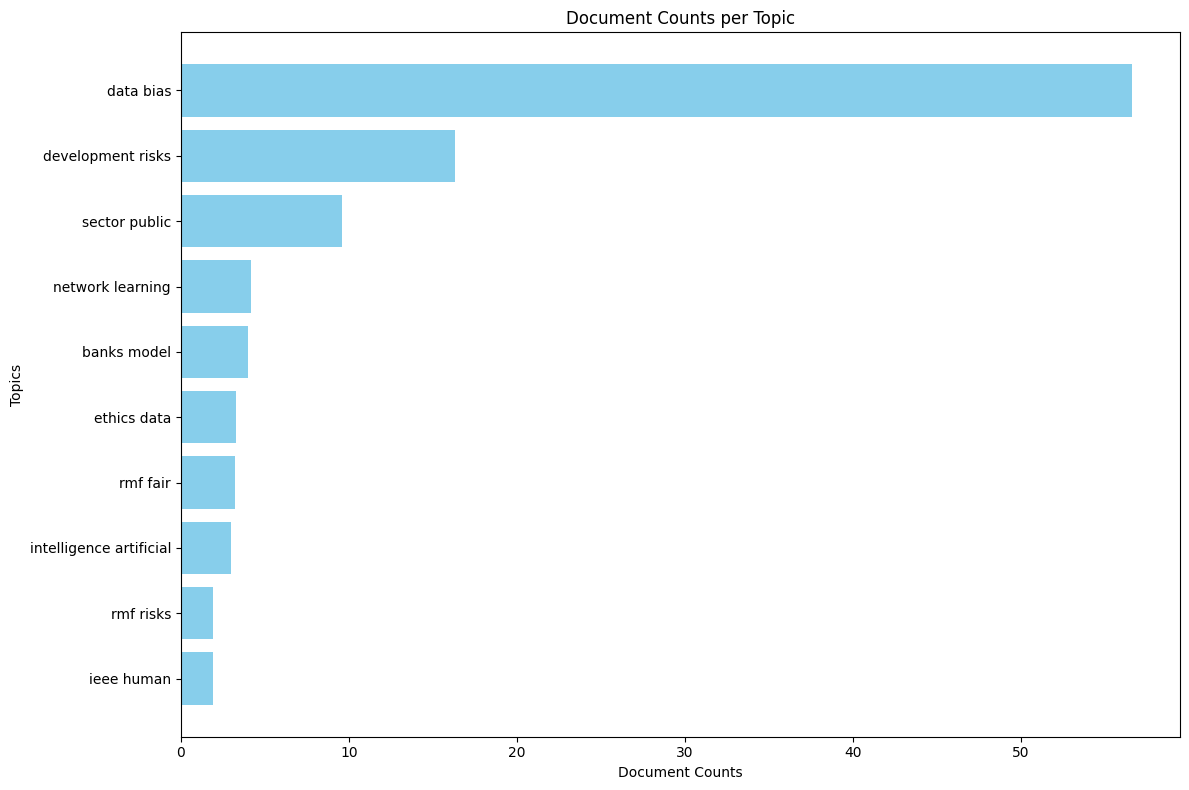

In [175]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 'black', 'cleveland',
    'pendingpost', 'tabassi', 'any', 'has', 'comment', 'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also',
    'include', 'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 'models'
]

# Function for LDA topic modeling with topic names
def lda_topic_modeling_with_names(df, text_column, n_topics=10, max_df=0.95, min_df=2):
    # Drop NaN values in the text column
    df = df.dropna(subset=[text_column])

    # Create a CountVectorizer
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=custom_stop_words)

    # Fit and transform the text data
    tf = vectorizer.fit_transform(df[text_column])

    # Create the LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=20, learning_decay=0.7)

    # Fit the model
    lda.fit(tf)

    # Get document-topic matrix
    document_topic_matrix = lda.transform(tf)

    # Calculate the number of documents per topic
    topic_document_counts = document_topic_matrix.sum(axis=0)

    # Create a list of topics sorted by document counts
    sorted_topics = sorted(range(len(topic_document_counts)), key=lambda i: -topic_document_counts[i])

    # Generate topic names based on top words
    print("\nTopics Sorted by Document Counts:")
    topic_names = []
    for i, topic_index in enumerate(sorted_topics):
        words = [vectorizer.get_feature_names_out()[index] for index in lda.components_[topic_index].argsort()[-10:]]
        print(f"Topic {i}:")
        print(words)
        print(f"Number of Documents: {topic_document_counts[topic_index]:.2f}\n")
        topic_label = " ".join(words[-2:])  # Last 2 significant words
        topic_names.append(topic_label)

    # Visualize the results with topic names
    plt.figure(figsize=(12, 8))
    plt.barh([topic_names[i] for i in sorted_topics],
             [topic_document_counts[i] for i in sorted_topics],
             color='skyblue')
    plt.xlabel("Document Counts")
    plt.ylabel("Topics")
    plt.title("Document Counts per Topic")
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

# Usage
lda_topic_modeling_with_names(df1, 'Text', n_topics=10)

### NIST Data Set 1: LDA Topic Modeling (Industry 1: Industry Associations) 

Performing LDA for category: industry_associations

Topics Sorted by Document Counts:
Topic 0:
['requirements', 'professional', 'policy', 'financial', 'trustworthiness', 'public', 'entity', 'algorithms', 'legal', 'data']
Number of Documents: 4.60

Topic 1:
['used', 'explainability', 'agencies', 'guidance', 'fair', 'credit', 'financial', 'banks', 'data', 'model']
Number of Documents: 4.38

Topic 2:
['principles', 'ethical', 'technology', 'trustworthiness', 'system', 'design', 'standards', 'development', 'ieee', 'human']
Number of Documents: 3.87

Topic 3:
['training', 'document', 'trust', 'potential', 'impact', 'development', 'model', 'data', 'system', 'bias']
Number of Documents: 2.02

Topic 4:
['technology', 'approach', 'nists', 'organizations', 'work', 'network', 'frameworks', 'rfi', 'privacy', 'cybersecurity']
Number of Documents: 1.13



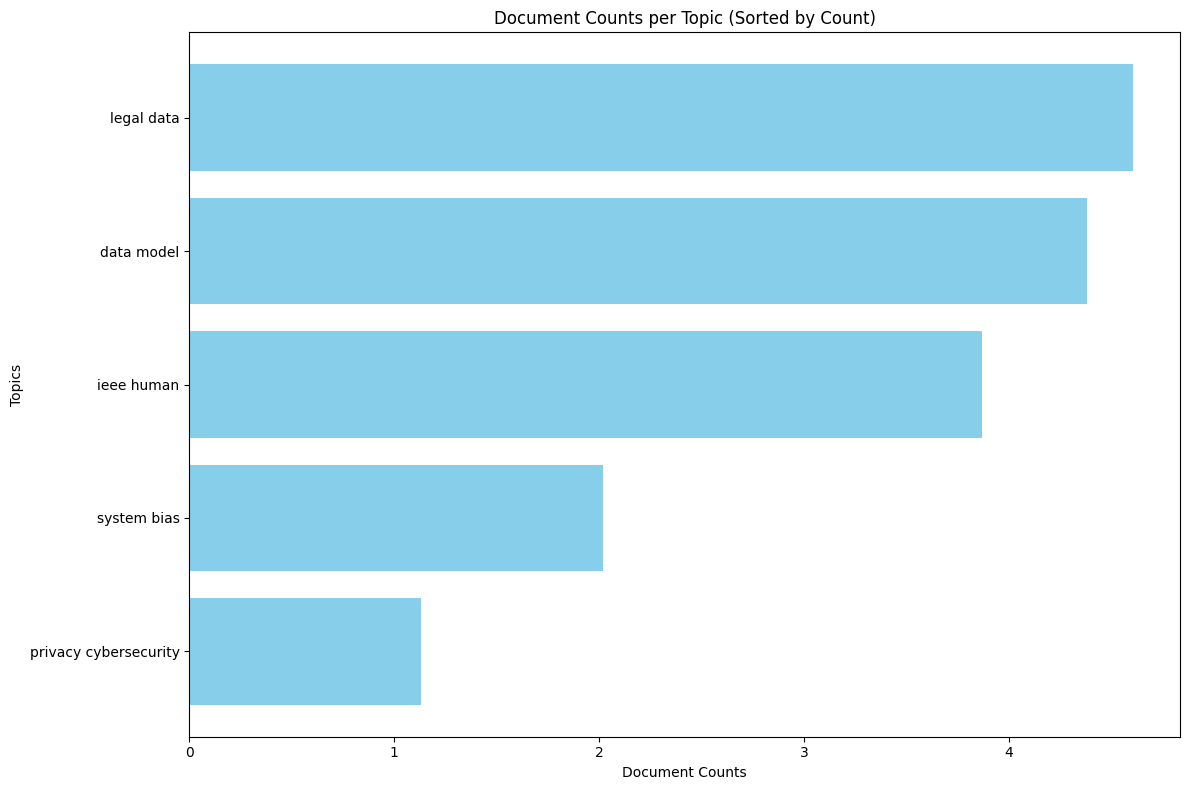

In [196]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november'
]

# Function for LDA topic modeling with auto-generated topic labels
def lda_topic_modeling_with_names(df, text_column, n_topics=5, max_df=0.95, min_df=2):
    # Drop NaN values in the text column
    df = df.dropna(subset=[text_column])

    # Create a CountVectorizer
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=custom_stop_words)

    # Fit and transform the text data
    tf = vectorizer.fit_transform(df[text_column])

    # Create the LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=20, learning_decay=0.7)

    # Fit the model
    lda.fit(tf)

    # Get document-topic matrix
    document_topic_matrix = lda.transform(tf)

    # Calculate the number of documents per topic
    topic_document_counts = document_topic_matrix.sum(axis=0)

    # Create a list of topics sorted by document counts (descending order)
    sorted_topics = sorted(range(len(topic_document_counts)), key=lambda i: -topic_document_counts[i])

    # Generate topic names based on top words
    print("\nTopics Sorted by Document Counts:")
    topic_names = []
    sorted_counts = []
    for i, topic_index in enumerate(sorted_topics):
        words = [vectorizer.get_feature_names_out()[index] for index in lda.components_[topic_index].argsort()[-10:]]
        print(f"Topic {i}:")
        print(words)
        print(f"Number of Documents: {topic_document_counts[topic_index]:.2f}\n")
        topic_label = " ".join(words[-2:])  # Last 2 significant words
        topic_names.append(topic_label)
        sorted_counts.append(topic_document_counts[topic_index])

    # Visualize the results with topic names sorted by document count
    plt.figure(figsize=(12, 8))
    plt.barh(topic_names, sorted_counts, color='skyblue')
    plt.xlabel("Document Counts")
    plt.ylabel("Topics")
    plt.title("Document Counts per Topic (Sorted by Count)")
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

# Function for filtering and LDA topic modeling
def lda_topic_modeling_by_category(df, category_column, text_column, target_category, n_topics=5, max_df=0.95, min_df=2):
    # Filter the dataframe for the specific category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    print(f"Performing LDA for category: {target_category}")
    # Call the existing LDA function with the filtered data
    lda_topic_modeling_with_names(filtered_df, text_column, n_topics, max_df, min_df)

# Example Usage
# Perform LDA for the 'industry_associations' category
lda_topic_modeling_by_category(df1, 'Category', 'Text', 'industry_associations', n_topics=5)

### NIST Data Set 1: LDA Topic Modeling (Industry 2: Tech and Private Sector) 

In [114]:
unique_categories = df1['Category'].unique()
print(unique_categories)

['industry_associations' 'independent' 'academia' 'tech_private_sector'
 'advocacy' 'Uncategorized' 'gov_public_sector']


Performing LDA for category: tech_private_sector

Topics Sorted by Document Counts:
Topic 0:
['intelligence', 'system', 'model', 'principles', 'standards', 'governance', 'development', 'rmf', 'data', 'organizations']
Number of Documents: 13.25

Topic 1:
['trustworthiness', 'standards', 'technology', 'example', 'data', 'system', 'safety', 'research', 'intelligence', 'artificial']
Number of Documents: 10.37

Topic 2:
['principles', 'fairness', 'bias', 'into', 'technology', 'rmf', 'organizations', 'model', 'development', 'data']
Number of Documents: 9.58

Topic 3:
['system', 'rfi', 'into', 'rmf', 'adversarial', 'learning', 'did', 'training', 'data', 'model']
Number of Documents: 2.47

Topic 4:
['solutions', 'organizations', 'learning', 'rmf', 'research', 'attacks', 'development', 'data', 'model', 'aiml']
Number of Documents: 2.33



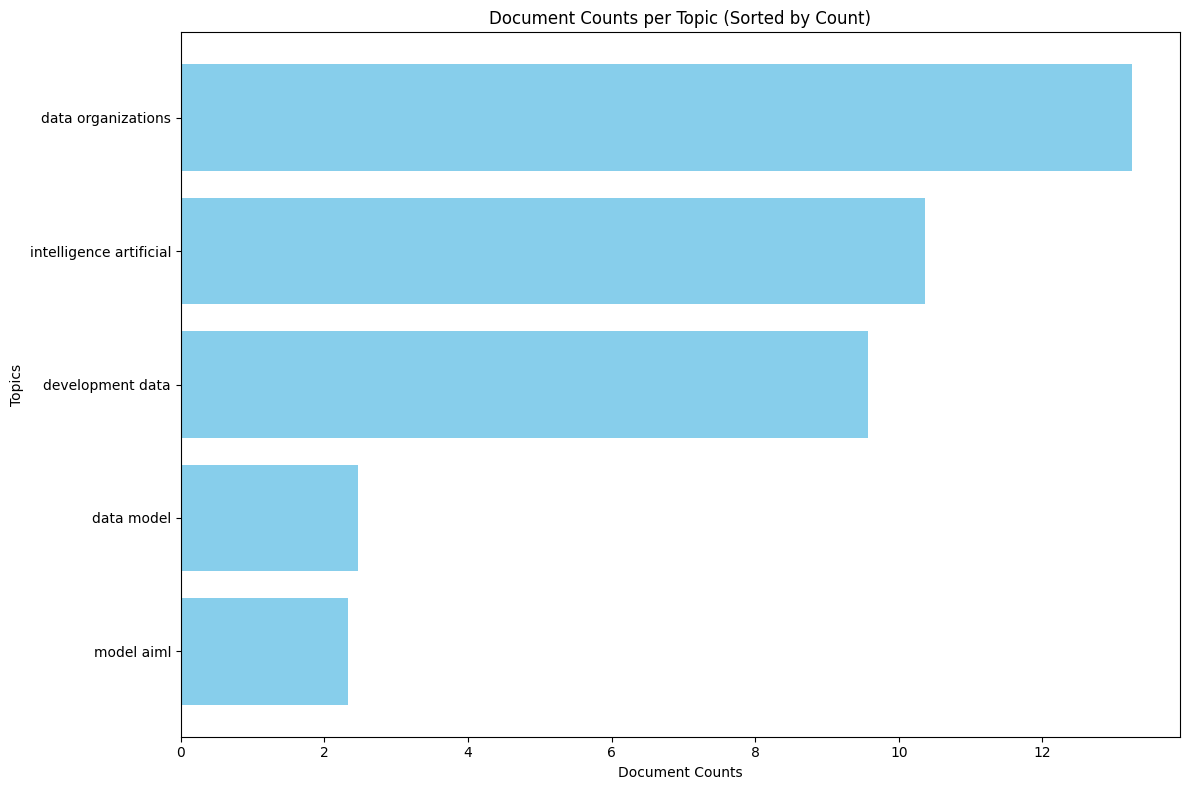

In [197]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november'
]

# Function for LDA topic modeling with auto-generated topic labels
def lda_topic_modeling_with_names(df, text_column, n_topics=7, max_df=0.95, min_df=2):
    # Drop NaN values in the text column
    df = df.dropna(subset=[text_column])

    # Create a CountVectorizer
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=custom_stop_words)

    # Fit and transform the text data
    tf = vectorizer.fit_transform(df[text_column])

    # Create the LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=20, learning_decay=0.7)

    # Fit the model
    lda.fit(tf)

    # Get document-topic matrix
    document_topic_matrix = lda.transform(tf)

    # Calculate the number of documents per topic
    topic_document_counts = document_topic_matrix.sum(axis=0)

    # Create a list of topics sorted by document counts (descending order)
    sorted_topics = sorted(range(len(topic_document_counts)), key=lambda i: -topic_document_counts[i])

    # Generate topic names based on top words
    print("\nTopics Sorted by Document Counts:")
    topic_names = []
    sorted_counts = []
    for i, topic_index in enumerate(sorted_topics):
        words = [vectorizer.get_feature_names_out()[index] for index in lda.components_[topic_index].argsort()[-10:]]
        print(f"Topic {i}:")
        print(words)
        print(f"Number of Documents: {topic_document_counts[topic_index]:.2f}\n")
        topic_label = " ".join(words[-2:])  # Last 2 significant words
        topic_names.append(topic_label)
        sorted_counts.append(topic_document_counts[topic_index])

    # Visualize the results with topic names sorted by document count
    plt.figure(figsize=(12, 8))
    plt.barh(topic_names, sorted_counts, color='skyblue')
    plt.xlabel("Document Counts")
    plt.ylabel("Topics")
    plt.title("Document Counts per Topic (Sorted by Count)")
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

# Function for filtering and LDA topic modeling
def lda_topic_modeling_by_category(df, category_column, text_column, target_category, n_topics=7, max_df=0.95, min_df=2):
    # Filter the dataframe for the specific category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    print(f"Performing LDA for category: {target_category}")
    # Call the existing LDA function with the filtered data
    lda_topic_modeling_with_names(filtered_df, text_column, n_topics, max_df, min_df)

# Example Usage
# Perform LDA for the 'industry_associations' category
lda_topic_modeling_by_category(df1, 'Category', 'Text', 'tech_private_sector', n_topics=5)


### NIST Data Set 1: LDA Topic Modeling (Industry 3: Advocacy and Non-Profit Organizations)

Performing LDA for category: advocacy

Topics Sorted by Document Counts:
Topic 0:
['individuals', 'nists', 'standard', 'system', 'frameworks', 'comments', 'app', 'data', 'principles', 'policy']
Number of Documents: 3.19

Topic 1:
['manage', 'identify', 'stakeholders', 'research', 'actors', 'about', 'safety', 'law', 'trustworthiness', 'system']
Number of Documents: 2.36

Topic 2:
['discrimination', 'need', 'new', 'developers', 'decisions', 'algorithmic', 'accountability', 'communities', 'algorithms', 'bias']
Number of Documents: 1.53

Topic 3:
['oversight', 'accountability', 'data', 'ethics', 'compliance', 'independent', 'system', 'bias', 'criteria', 'audit']
Number of Documents: 1.52

Topic 4:
['corporation', 'practices', 'model', 'maturity', 'data', 'request', 'security', 'organizations', 'organization', 'response']
Number of Documents: 1.39



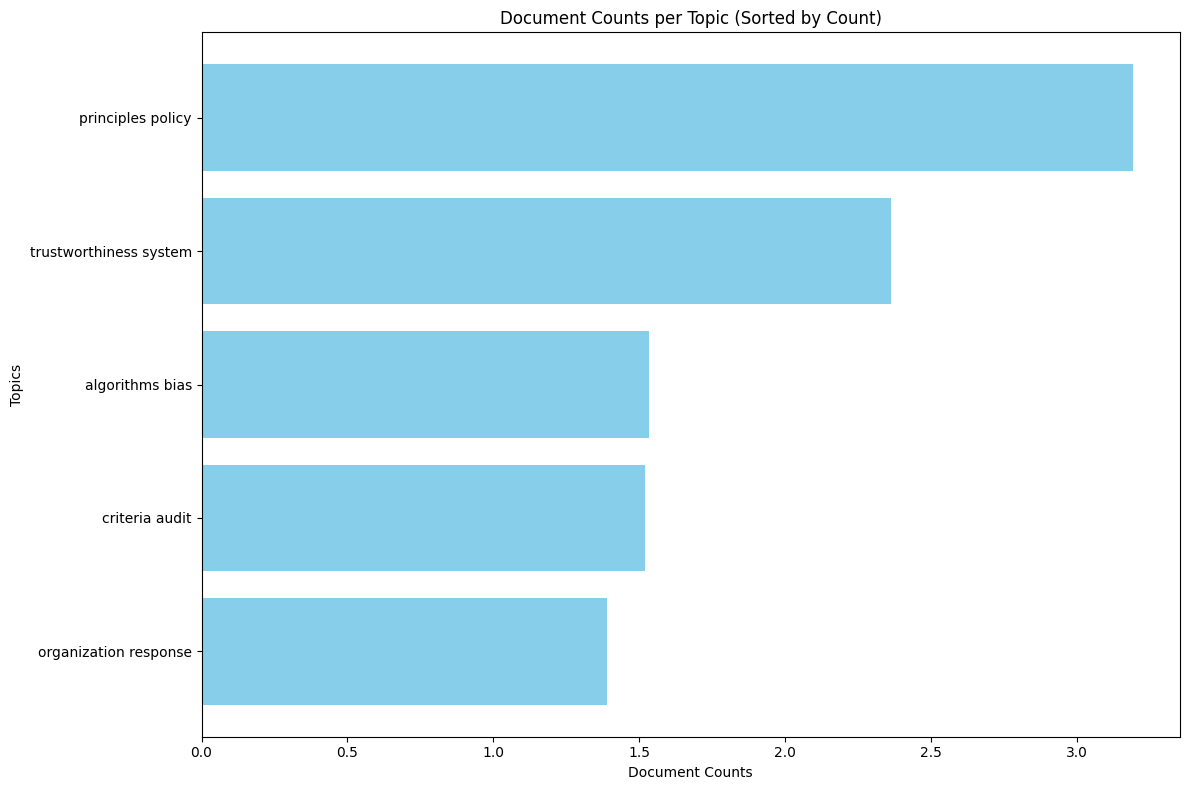

In [214]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november'
]

# Function for LDA topic modeling with auto-generated topic labels
def lda_topic_modeling_with_names(df, text_column, n_topics=7, max_df=0.95, min_df=2):
    # Drop NaN values in the text column
    df = df.dropna(subset=[text_column])

    # Create a CountVectorizer
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=custom_stop_words)

    # Fit and transform the text data
    tf = vectorizer.fit_transform(df[text_column])

    # Create the LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=20, learning_decay=0.7)

    # Fit the model
    lda.fit(tf)

    # Get document-topic matrix
    document_topic_matrix = lda.transform(tf)

    # Calculate the number of documents per topic
    topic_document_counts = document_topic_matrix.sum(axis=0)

    # Create a list of topics sorted by document counts (descending order)
    sorted_topics = sorted(range(len(topic_document_counts)), key=lambda i: -topic_document_counts[i])

    # Generate topic names based on top words
    print("\nTopics Sorted by Document Counts:")
    topic_names = []
    sorted_counts = []
    for i, topic_index in enumerate(sorted_topics):
        words = [vectorizer.get_feature_names_out()[index] for index in lda.components_[topic_index].argsort()[-10:]]
        print(f"Topic {i}:")
        print(words)
        print(f"Number of Documents: {topic_document_counts[topic_index]:.2f}\n")
        topic_label = " ".join(words[-2:])  # Last 2 significant words
        topic_names.append(topic_label)
        sorted_counts.append(topic_document_counts[topic_index])

    # Visualize the results with topic names sorted by document count
    plt.figure(figsize=(12, 8))
    plt.barh(topic_names, sorted_counts, color='skyblue')
    plt.xlabel("Document Counts")
    plt.ylabel("Topics")
    plt.title("Document Counts per Topic (Sorted by Count)")
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

# Function for filtering and LDA topic modeling
def lda_topic_modeling_by_category(df, category_column, text_column, target_category, n_topics=7, max_df=0.95, min_df=2):
    # Filter the dataframe for the specific category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    print(f"Performing LDA for category: {target_category}")
    # Call the existing LDA function with the filtered data
    lda_topic_modeling_with_names(filtered_df, text_column, n_topics, max_df, min_df)

# Example Usage
# Perform LDA for the 'industry_associations' category
lda_topic_modeling_by_category(df1, 'Category', 'Text', 'advocacy', n_topics=5)

### NIST Data Set 1: LDA Topic Modeling (Industry 4: Goverment and Public Sector) 

Performing LDA for category: gov_public_sector

Topics Sorted by Document Counts:
Topic 0:
['developing', 'artificial', 'principles', 'development', 'standards', 'organizations', 'rmf', 'processes', 'management', 'risk']
Number of Documents: 3.95

Topic 1:
['free', 'office', 'program', 'subject', 'artificial', 'information', 'government', 'federal', 'product', 'accountability']
Number of Documents: 1.01

Topic 2:
['human', 'rfi', 'learn', 'taking', 'require', 'organization', 'general', 'document', 'government', 'response']
Number of Documents: 0.04



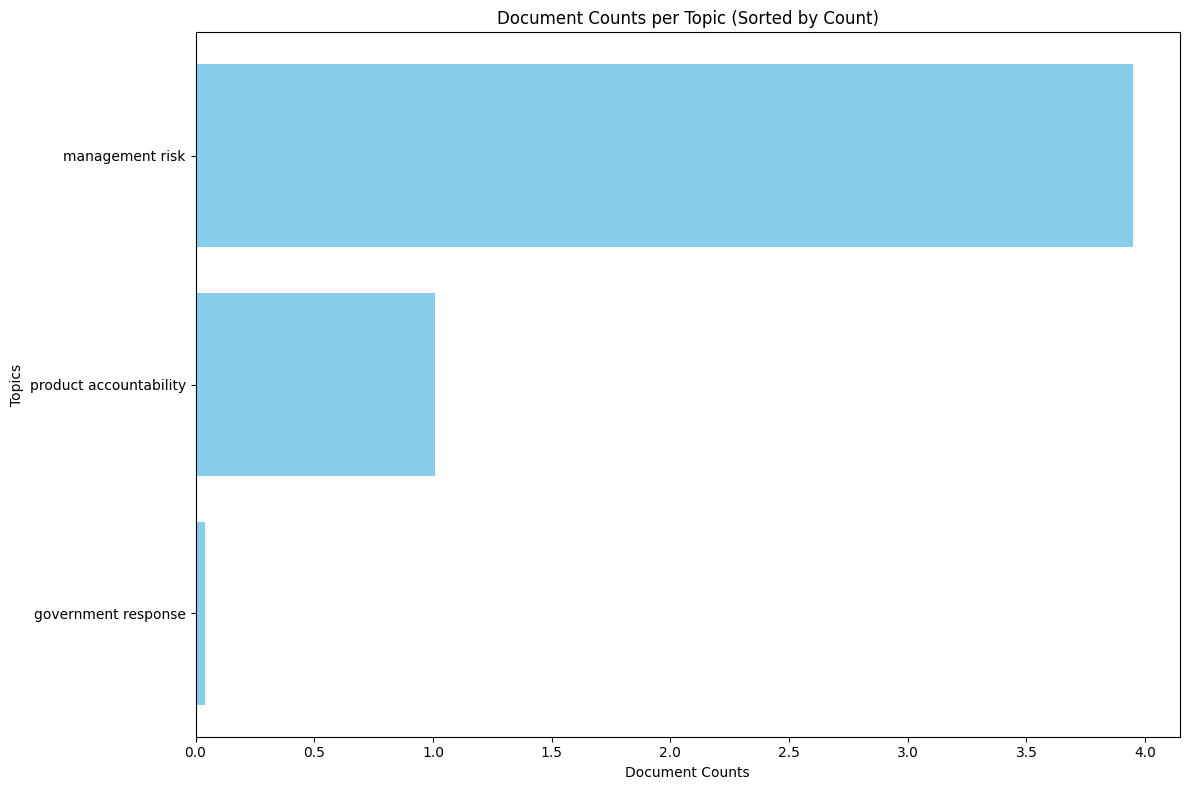

In [212]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november',
    'and', 'the', 'for', 'sure', 'frameworks', 'please', 'due', 'comments', 'along', 'after', 'framework',
    'type'
]

# Function for LDA topic modeling with auto-generated topic labels
def lda_topic_modeling_with_names(df, text_column, n_topics=3, max_df=0.95, min_df=2):
    # Drop NaN values in the text column
    df = df.dropna(subset=[text_column])

    # Create a CountVectorizer
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=custom_stop_words)

    # Fit and transform the text data
    tf = vectorizer.fit_transform(df[text_column])

    # Create the LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=20, learning_decay=0.7)

    # Fit the model
    lda.fit(tf)

    # Get document-topic matrix
    document_topic_matrix = lda.transform(tf)

    # Calculate the number of documents per topic
    topic_document_counts = document_topic_matrix.sum(axis=0)

    # Create a list of topics sorted by document counts (descending order)
    sorted_topics = sorted(range(len(topic_document_counts)), key=lambda i: -topic_document_counts[i])

    # Generate topic names based on top words
    print("\nTopics Sorted by Document Counts:")
    topic_names = []
    sorted_counts = []
    for i, topic_index in enumerate(sorted_topics):
        words = [vectorizer.get_feature_names_out()[index] for index in lda.components_[topic_index].argsort()[-10:]]
        print(f"Topic {i}:")
        print(words)
        print(f"Number of Documents: {topic_document_counts[topic_index]:.2f}\n")
        topic_label = " ".join(words[-2:])  # Last 2 significant words
        topic_names.append(topic_label)
        sorted_counts.append(topic_document_counts[topic_index])

    # Visualize the results with topic names sorted by document count
    plt.figure(figsize=(12, 8))
    plt.barh(topic_names, sorted_counts, color='skyblue')
    plt.xlabel("Document Counts")
    plt.ylabel("Topics")
    plt.title("Document Counts per Topic (Sorted by Count)")
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

# Function for filtering and LDA topic modeling
def lda_topic_modeling_by_category(df, category_column, text_column, target_category, n_topics=3, max_df=0.95, min_df=2):
    # Filter the dataframe for the specific category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    print(f"Performing LDA for category: {target_category}")
    # Call the existing LDA function with the filtered data
    lda_topic_modeling_with_names(filtered_df, text_column, n_topics, max_df, min_df)

# Example Usage
# Perform LDA for the 'industry_associations' category
lda_topic_modeling_by_category(df1, 'Category', 'Text', 'gov_public_sector', n_topics=3)


### NIST Data Set 1: LDA Topic Modeling (Industry 5: Research Institutions and Academia) 

Performing LDA for category: academia

Topics Sorted by Document Counts:
Topic 0:
['development', 'information', 'engineering', 'characteristics', 'organizations', 'privacy', 'university', 'model', 'system', 'data']
Number of Documents: 5.01

Topic 1:
['practices', 'community', 'frameworks', 'technologies', 'act', 'governance', 'general', 'artificial', 'principles', 'digital']
Number of Documents: 1.98

Topic 2:
['metrics', 'adversarial', 'learning', 'research', 'evaluation', 'development', 'assurance', 'data', 'testing', 'system']
Number of Documents: 1.73

Topic 3:
['guidance', 'rights', 'human', 'development', 'comments', 'including', 'recommend', 'safety', 'rfi', 'rmf']
Number of Documents: 1.28

Topic 4:
['both', 'ethical', 'health', 'many', 'policy', 'identify', 'already', 'challenges', 'institute', 'ethics']
Number of Documents: 1.00



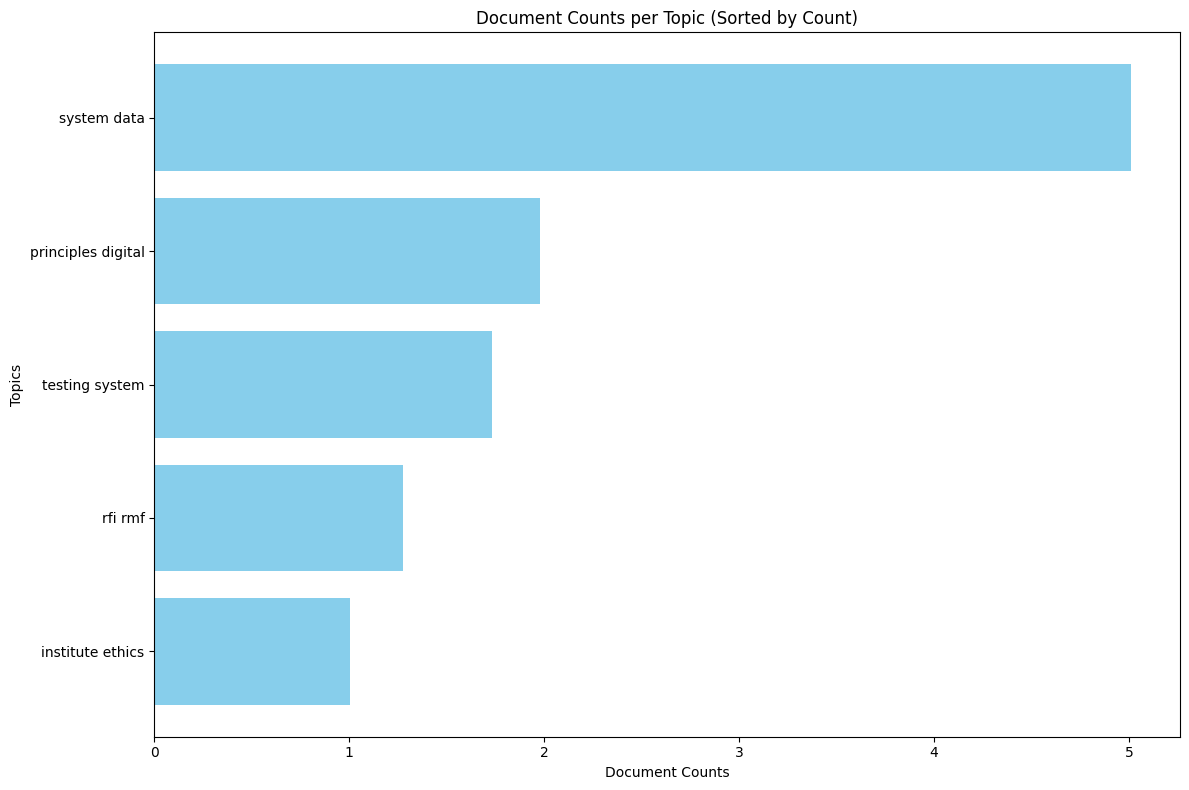

In [216]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november', 'best'
]

# Function for LDA topic modeling with auto-generated topic labels
def lda_topic_modeling_with_names(df, text_column, n_topics=7, max_df=0.95, min_df=2):
    # Drop NaN values in the text column
    df = df.dropna(subset=[text_column])

    # Create a CountVectorizer
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=custom_stop_words)

    # Fit and transform the text data
    tf = vectorizer.fit_transform(df[text_column])

    # Create the LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=20, learning_decay=0.7)

    # Fit the model
    lda.fit(tf)

    # Get document-topic matrix
    document_topic_matrix = lda.transform(tf)

    # Calculate the number of documents per topic
    topic_document_counts = document_topic_matrix.sum(axis=0)

    # Create a list of topics sorted by document counts (descending order)
    sorted_topics = sorted(range(len(topic_document_counts)), key=lambda i: -topic_document_counts[i])

    # Generate topic names based on top words
    print("\nTopics Sorted by Document Counts:")
    topic_names = []
    sorted_counts = []
    for i, topic_index in enumerate(sorted_topics):
        words = [vectorizer.get_feature_names_out()[index] for index in lda.components_[topic_index].argsort()[-10:]]
        print(f"Topic {i}:")
        print(words)
        print(f"Number of Documents: {topic_document_counts[topic_index]:.2f}\n")
        topic_label = " ".join(words[-2:])  # Last 2 significant words
        topic_names.append(topic_label)
        sorted_counts.append(topic_document_counts[topic_index])

    # Visualize the results with topic names sorted by document count
    plt.figure(figsize=(12, 8))
    plt.barh(topic_names, sorted_counts, color='skyblue')
    plt.xlabel("Document Counts")
    plt.ylabel("Topics")
    plt.title("Document Counts per Topic (Sorted by Count)")
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

# Function for filtering and LDA topic modeling
def lda_topic_modeling_by_category(df, category_column, text_column, target_category, n_topics=7, max_df=0.95, min_df=2):
    # Filter the dataframe for the specific category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    print(f"Performing LDA for category: {target_category}")
    # Call the existing LDA function with the filtered data
    lda_topic_modeling_with_names(filtered_df, text_column, n_topics, max_df, min_df)

# Example Usage
# Perform LDA for the 'industry_associations' category
lda_topic_modeling_by_category(df1, 'Category', 'Text', 'academia', n_topics=5)

### NIST Data Set 1: LDA Topic Modeling (Industry 6: Independent) 

Performing LDA for category: independent

Topics Sorted by Document Counts:
Topic 0:
['intelligence', 'technology', 'model', 'ethical', 'government', 'public', 'system', 'procurement', 'ethics', 'data']
Number of Documents: 14.43

Topic 1:
['related', 'manage', 'system', 'organizations', 'frameworks', 'development', 'rmf', 'management', 'framework', 'risk']
Number of Documents: 4.77

Topic 2:
['time', 'between', 'individual', 'jobs', 'job', 'private', 'workers', 'government', 'public', 'sector']
Number of Documents: 1.40

Topic 3:
['hidden', 'human', 'machine', 'neural', 'networks', 'neurons', 'test', 'error', 'network', 'learning']
Number of Documents: 1.38

Topic 4:
['model', 'application', 'network', 'social', 'individual', 'brain', 'function', 'human', 'intelligence', 'understanding']
Number of Documents: 1.03



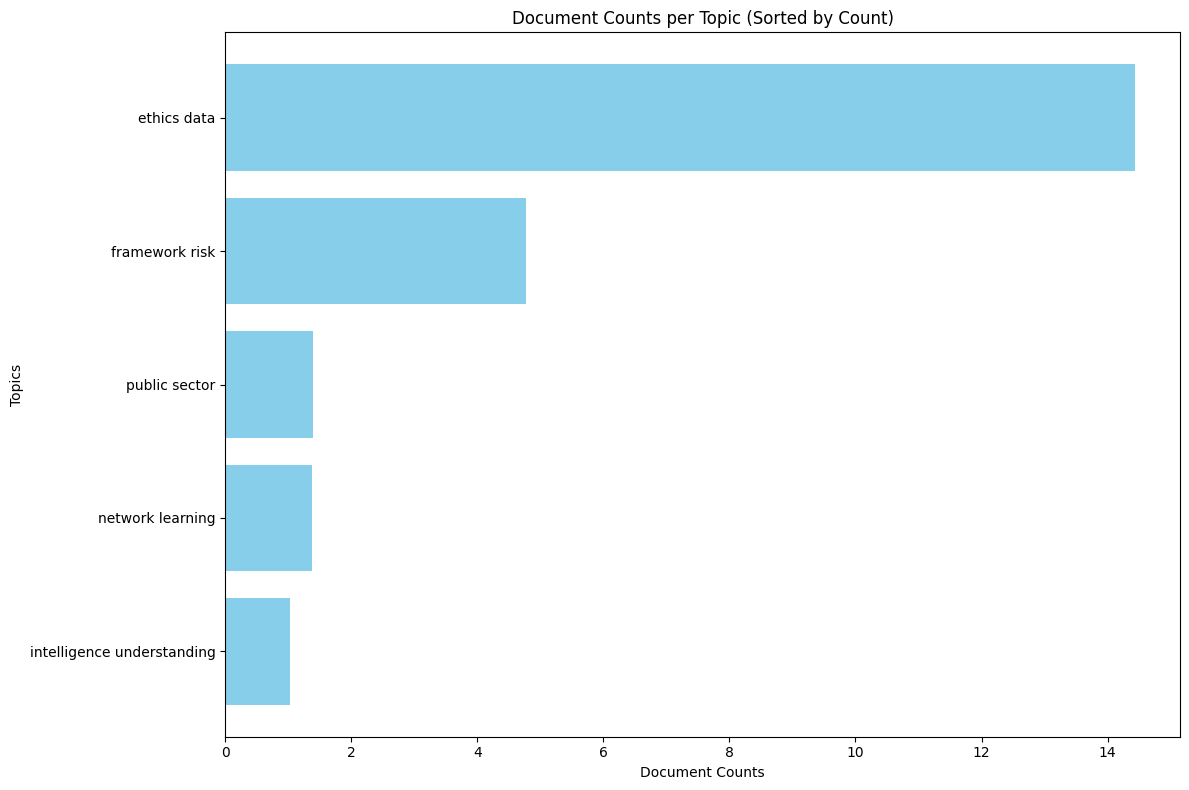

In [220]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november', 'for','and'
]

# Function for LDA topic modeling with auto-generated topic labels
def lda_topic_modeling_with_names(df, text_column, n_topics=7, max_df=0.95, min_df=2):
    # Drop NaN values in the text column
    df = df.dropna(subset=[text_column])

    # Create a CountVectorizer
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=custom_stop_words)

    # Fit and transform the text data
    tf = vectorizer.fit_transform(df[text_column])

    # Create the LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=20, learning_decay=0.7)

    # Fit the model
    lda.fit(tf)

    # Get document-topic matrix
    document_topic_matrix = lda.transform(tf)

    # Calculate the number of documents per topic
    topic_document_counts = document_topic_matrix.sum(axis=0)

    # Create a list of topics sorted by document counts (descending order)
    sorted_topics = sorted(range(len(topic_document_counts)), key=lambda i: -topic_document_counts[i])

    # Generate topic names based on top words
    print("\nTopics Sorted by Document Counts:")
    topic_names = []
    sorted_counts = []
    for i, topic_index in enumerate(sorted_topics):
        words = [vectorizer.get_feature_names_out()[index] for index in lda.components_[topic_index].argsort()[-10:]]
        print(f"Topic {i}:")
        print(words)
        print(f"Number of Documents: {topic_document_counts[topic_index]:.2f}\n")
        topic_label = " ".join(words[-2:])  # Last 2 significant words
        topic_names.append(topic_label)
        sorted_counts.append(topic_document_counts[topic_index])

    # Visualize the results with topic names sorted by document count
    plt.figure(figsize=(12, 8))
    plt.barh(topic_names, sorted_counts, color='skyblue')
    plt.xlabel("Document Counts")
    plt.ylabel("Topics")
    plt.title("Document Counts per Topic (Sorted by Count)")
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

# Function for filtering and LDA topic modeling
def lda_topic_modeling_by_category(df, category_column, text_column, target_category, n_topics=7, max_df=0.95, min_df=2):
    # Filter the dataframe for the specific category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    print(f"Performing LDA for category: {target_category}")
    # Call the existing LDA function with the filtered data
    lda_topic_modeling_with_names(filtered_df, text_column, n_topics, max_df, min_df)

# Example Usage
# Perform LDA for the 'advocacy' category
lda_topic_modeling_by_category(df1, 'Category', 'Text', 'independent', n_topics=5)

### NIST Data Set 2: LDA Topic Modeling (Entire) 


Topics Sorted by Document Counts:
Topic 0:
['generative', 'teaming', 'information', 'development', 'system', 'red', 'standards', 'data', 'model', 'risk']
Number of Documents: 93.21

Topic 1:
['privacy', 'about', 'public', 'deepfakes', 'notice', 'document', 'data', 'generative', 'regulations', '2023']
Number of Documents: 58.38

Topic 2:
['related', 'security', 'technical', 'health', 'including', 'technology', 'order', 'development', 'federal', 'standards']
Number of Documents: 19.64

Topic 3:
['guidance', 'media', 'practices', 'risk', 'development', 'human', 'synthetic', 'model', 'content', 'data']
Number of Documents: 17.06

Topic 4:
['watermarks', 'information', 'watermark', 'image', 'provenance', 'media', 'generated', 'digital', 'watermarking', 'content']
Number of Documents: 16.13

Topic 5:
['risk', 'third', 'party', '2024', 'developers', 'available', 'safety', 'openai', '2023', 'generative']
Number of Documents: 9.75

Topic 6:
['evaluations', 'doi', 'research', 'risk', 'language'

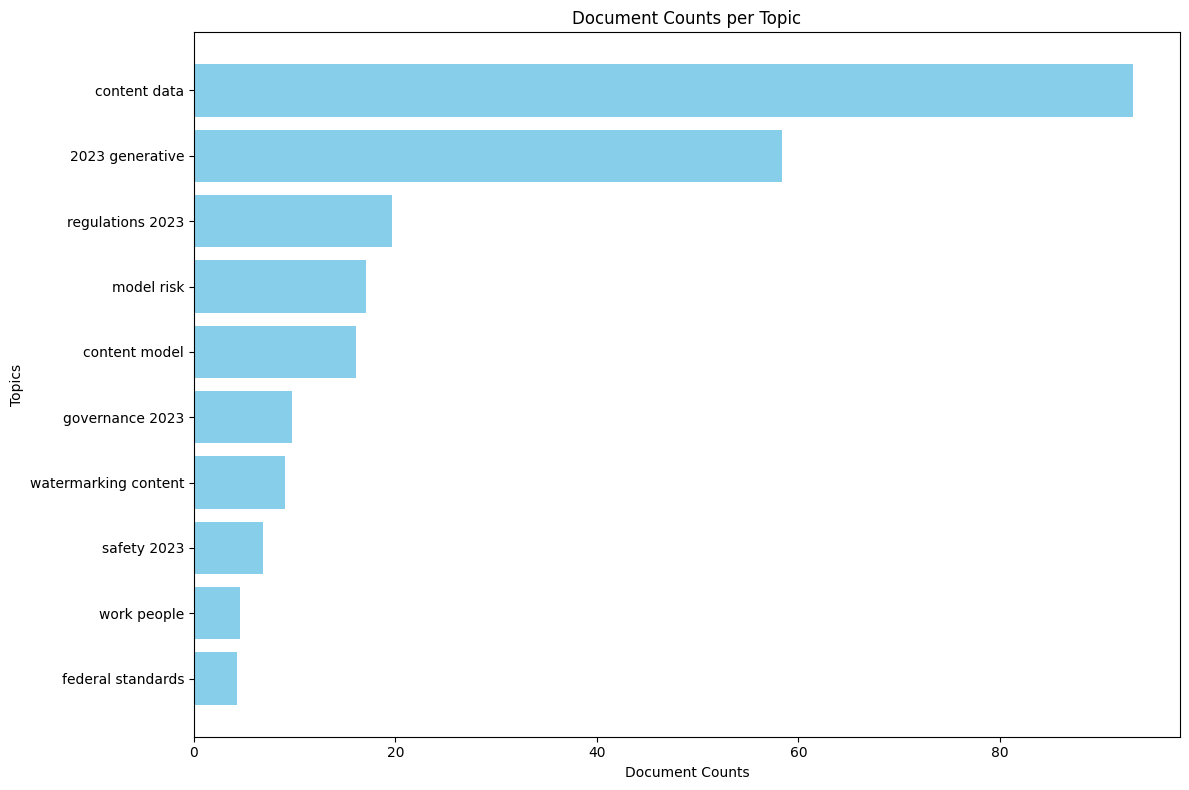

In [187]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
   'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 'black', 'cleveland',
    'pendingpost', 'tabassi', 'any', 'has', 'comment', 'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also',
    'include', 'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 'models', 'an', 'or',
    'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would',
    'if', 'org', '226', '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks'
]

# Function for LDA topic modeling with topic names
def lda_topic_modeling_with_names(df, text_column, n_topics=10, max_df=0.95, min_df=2):
    # Drop NaN values in the text column
    df = df.dropna(subset=[text_column])

    # Create a CountVectorizer
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=custom_stop_words)

    # Fit and transform the text data
    tf = vectorizer.fit_transform(df[text_column])

    # Create the LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=20, learning_decay=0.7)

    # Fit the model
    lda.fit(tf)

    # Get document-topic matrix
    document_topic_matrix = lda.transform(tf)

    # Calculate the number of documents per topic
    topic_document_counts = document_topic_matrix.sum(axis=0)

    # Create a list of topics sorted by document counts
    sorted_topics = sorted(range(len(topic_document_counts)), key=lambda i: -topic_document_counts[i])

    # Generate topic names based on top words
    print("\nTopics Sorted by Document Counts:")
    topic_names = []
    for i, topic_index in enumerate(sorted_topics):
        words = [vectorizer.get_feature_names_out()[index] for index in lda.components_[topic_index].argsort()[-10:]]
        print(f"Topic {i}:")
        print(words)
        print(f"Number of Documents: {topic_document_counts[topic_index]:.2f}\n")
        topic_label = " ".join(words[-2:])  # Last 2 significant words
        topic_names.append(topic_label)

    # Visualize the results with topic names
    plt.figure(figsize=(12, 8))
    plt.barh([topic_names[i] for i in sorted_topics],
             [topic_document_counts[i] for i in sorted_topics],
             color='skyblue')
    plt.xlabel("Document Counts")
    plt.ylabel("Topics")
    plt.title("Document Counts per Topic")
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

# Usage
lda_topic_modeling_with_names(df2, 'Text', n_topics=10)

### NIST Data Set 2: LDA Topic Modeling (Industry 1: Industry Associations)

Performing LDA for category: industry_associations
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.

Topics Sorted by Document Counts:
Topic 0:
['generative', 'intelligence', 'rmf', 'system', 'practices', 'teaming', 'red', 'management', 'development', 'risk']
Number of Documents: 17.86

Topic 1:
['research', 'security', '2023', 'safety', 'red', 'synthetic', 'testing', 'data', 'model', 'content']
Number of Documents: 8.23

Topic 2:
['artificial', 'data', 'bsa', 'intelligence', 'industry', 'benchmarks', 'standard', 'ieee', 'development', 'safety']
Number of Documents: 4.12

Topic 3:
['draft', 'required', 'comments', 'january', 'guidelines', '2024', 'public', 'privacy', 'care', 'health']
Number of Documents: 3.78

Topic 4:
['copyright', 'human', 'system', 'developers', 'generative', 'development', 'rights', 'music', 'risk', '2023']
Number of Documents: 2.01



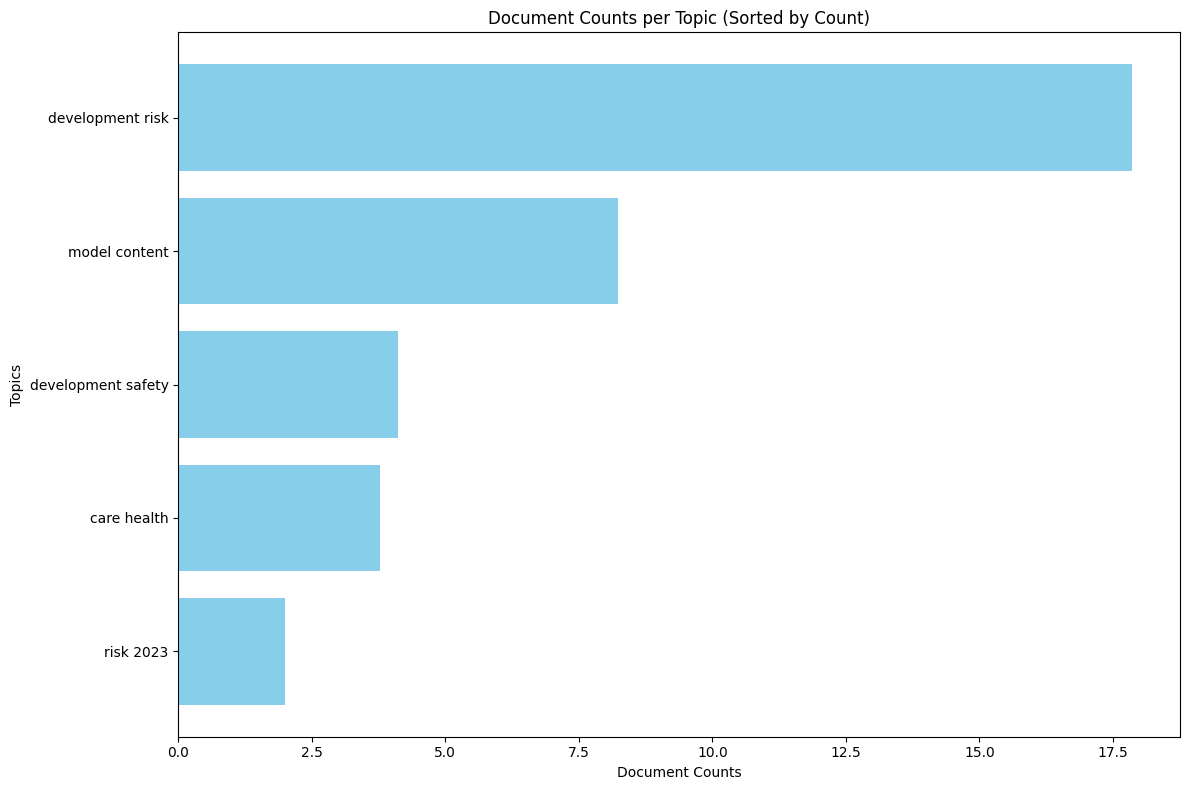

In [221]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november'
]

# Function for LDA topic modeling with auto-generated topic labels
def lda_topic_modeling_with_names(df, text_column, n_topics=7, max_df=0.95, min_df=2):
    # Drop NaN values in the text column
    df = df.dropna(subset=[text_column])

    # Create a CountVectorizer
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=custom_stop_words)

    # Fit and transform the text data
    tf = vectorizer.fit_transform(df[text_column])

    # Create the LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=20, learning_decay=0.7)

    # Fit the model
    lda.fit(tf)

    # Get document-topic matrix
    document_topic_matrix = lda.transform(tf)

    # Calculate the number of documents per topic
    topic_document_counts = document_topic_matrix.sum(axis=0)

    # Create a list of topics sorted by document counts (descending order)
    sorted_topics = sorted(range(len(topic_document_counts)), key=lambda i: -topic_document_counts[i])

    # Generate topic names based on top words
    print("\nTopics Sorted by Document Counts:")
    topic_names = []
    sorted_counts = []
    for i, topic_index in enumerate(sorted_topics):
        words = [vectorizer.get_feature_names_out()[index] for index in lda.components_[topic_index].argsort()[-10:]]
        print(f"Topic {i}:")
        print(words)
        print(f"Number of Documents: {topic_document_counts[topic_index]:.2f}\n")
        topic_label = " ".join(words[-2:])  # Last 2 significant words
        topic_names.append(topic_label)
        sorted_counts.append(topic_document_counts[topic_index])

    # Visualize the results with topic names sorted by document count
    plt.figure(figsize=(12, 8))
    plt.barh(topic_names, sorted_counts, color='skyblue')
    plt.xlabel("Document Counts")
    plt.ylabel("Topics")
    plt.title("Document Counts per Topic (Sorted by Count)")
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

# Function for filtering and LDA topic modeling
def lda_topic_modeling_by_category(df, category_column, text_column, target_category, n_topics=7, max_df=0.95, min_df=2):
    # Filter the dataframe for the specific category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    print(f"Performing LDA for category: {target_category}")
    # Call the existing LDA function with the filtered data
    lda_topic_modeling_with_names(filtered_df, text_column, n_topics, max_df, min_df)

# Example Usage
# Perform LDA for the 'advocacy' category
lda_topic_modeling_by_category(df2, 'Category', 'Text', 'industry_associations', n_topics=5)

### NIST Data Set 2: LDA Topic Modeling (Industry 2: Tech and Private Sector) 

Performing LDA for category: tech_private_sector

Topics Sorted by Document Counts:
Topic 0:
['security', 'generative', 'red', 'system', 'development', 'safety', 'standards', 'risk', 'model', 'data']
Number of Documents: 46.94

Topic 1:
['generated', 'technology', 'image', 'media', 'provenance', 'information', 'watermark', 'watermarking', 'digital', 'content']
Number of Documents: 9.83

Topic 2:
['users', 'watermarking', 'hugging', 'dataset', 'face', 'content', 'deepfake', '2023', 'model', 'deepfakes']
Number of Documents: 4.97

Topic 3:
['days', 'director', 'data', 'within', 'appropriate', 'order', 'agencies', 'including', 'security', 'federal']
Number of Documents: 4.83

Topic 4:
['system', 'standards', 'disclosure', 'risk', 'model', 'microsoft', 'measurement', 'content', 'teaming', 'red']
Number of Documents: 4.42



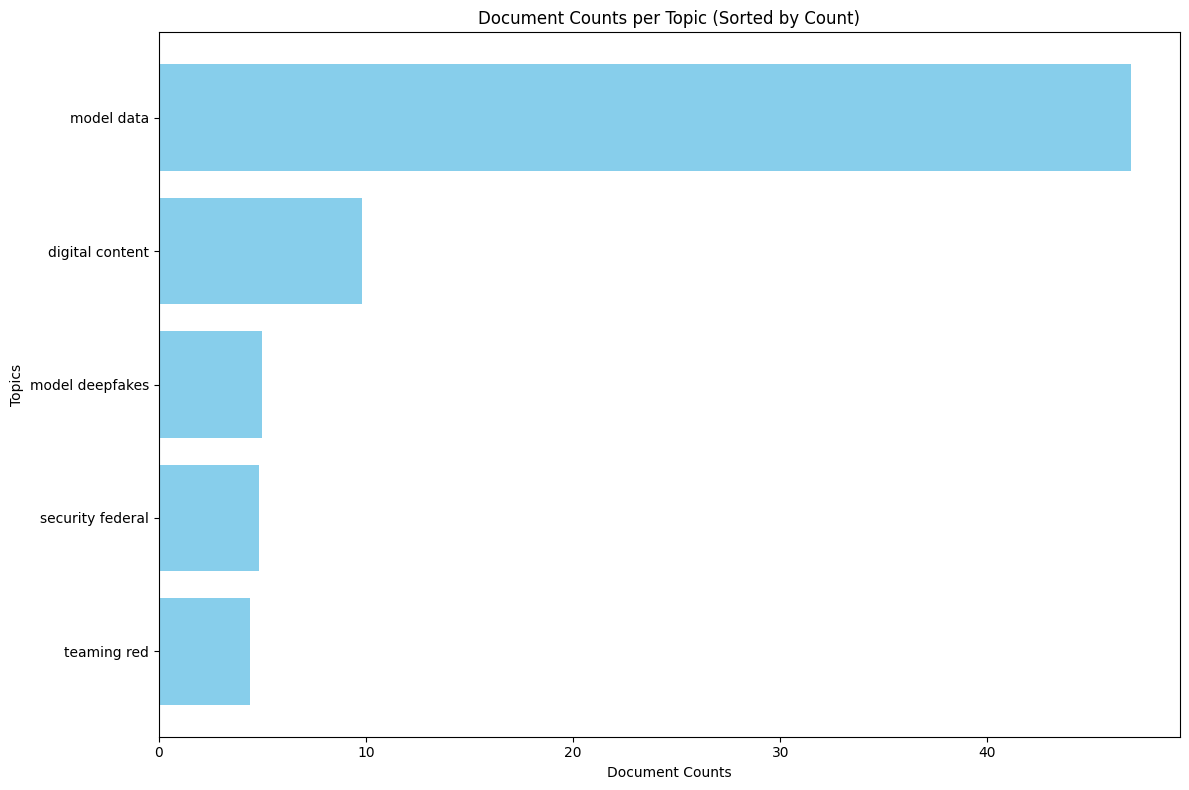

In [223]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november',
    'secretary', 'shall'
]

# Function for LDA topic modeling with auto-generated topic labels
def lda_topic_modeling_with_names(df, text_column, n_topics=7, max_df=0.95, min_df=2):
    # Drop NaN values in the text column
    df = df.dropna(subset=[text_column])

    # Create a CountVectorizer
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=custom_stop_words)

    # Fit and transform the text data
    tf = vectorizer.fit_transform(df[text_column])

    # Create the LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=20, learning_decay=0.7)

    # Fit the model
    lda.fit(tf)

    # Get document-topic matrix
    document_topic_matrix = lda.transform(tf)

    # Calculate the number of documents per topic
    topic_document_counts = document_topic_matrix.sum(axis=0)

    # Create a list of topics sorted by document counts (descending order)
    sorted_topics = sorted(range(len(topic_document_counts)), key=lambda i: -topic_document_counts[i])

    # Generate topic names based on top words
    print("\nTopics Sorted by Document Counts:")
    topic_names = []
    sorted_counts = []
    for i, topic_index in enumerate(sorted_topics):
        words = [vectorizer.get_feature_names_out()[index] for index in lda.components_[topic_index].argsort()[-10:]]
        print(f"Topic {i}:")
        print(words)
        print(f"Number of Documents: {topic_document_counts[topic_index]:.2f}\n")
        topic_label = " ".join(words[-2:])  # Last 2 significant words
        topic_names.append(topic_label)
        sorted_counts.append(topic_document_counts[topic_index])

    # Visualize the results with topic names sorted by document count
    plt.figure(figsize=(12, 8))
    plt.barh(topic_names, sorted_counts, color='skyblue')
    plt.xlabel("Document Counts")
    plt.ylabel("Topics")
    plt.title("Document Counts per Topic (Sorted by Count)")
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

# Function for filtering and LDA topic modeling
def lda_topic_modeling_by_category(df, category_column, text_column, target_category, n_topics=7, max_df=0.95, min_df=2):
    # Filter the dataframe for the specific category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    print(f"Performing LDA for category: {target_category}")
    # Call the existing LDA function with the filtered data
    lda_topic_modeling_with_names(filtered_df, text_column, n_topics, max_df, min_df)

# Example Usage
# Perform LDA for the 'advocacy' category
lda_topic_modeling_by_category(df2, 'Category', 'Text', 'tech_private_sector', n_topics=5)

### NIST Data Set 2: LDA Topic Modeling (Industry 3: Advocacy and Non-Profit Organizations) 

Performing LDA for category: advocacy

Topics Sorted by Document Counts:
Topic 0:
['testing', 'capabilities', 'developers', 'safety', 'teaming', 'security', 'red', 'risk', 'system', 'model']
Number of Documents: 11.35

Topic 1:
['watermarking', 'based', 'government', 'generated', 'digital', 'privacy', 'governance', 'tools', 'data', 'content']
Number of Documents: 10.56

Topic 2:
['risk', 'training', 'chatgpt', 'companies', 'content', 'harm', 'harms', 'impact', 'data', 'generative']
Number of Documents: 5.56

Topic 3:
['deployers', 'policies', 'third', 'usage', '2024', 'safety', 'party', 'developers', 'openai', 'generative']
Number of Documents: 2.49

Topic 4:
['transparency', 'documentation', 'risk', 'pai', 'foundation', 'guidance', 'media', 'model', 'content', 'synthetic']
Number of Documents: 2.03



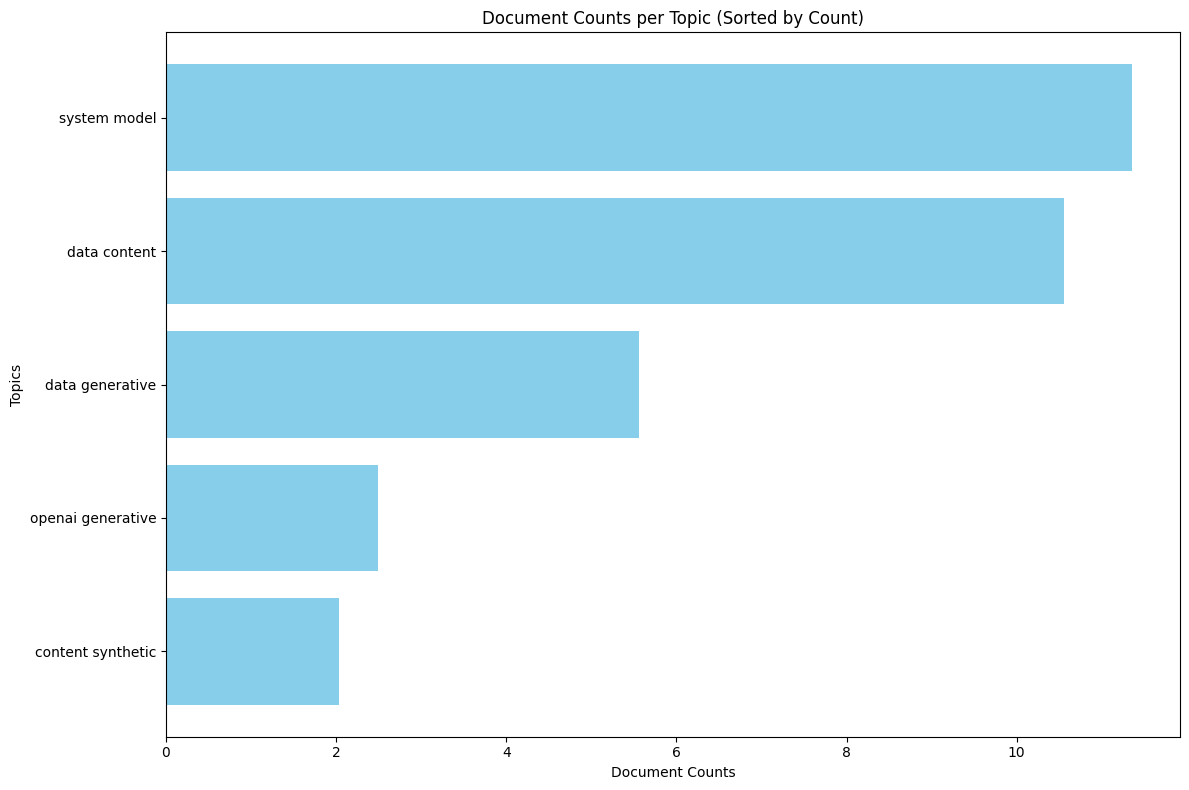

In [225]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november', 'available'
]

# Function for LDA topic modeling with auto-generated topic labels
def lda_topic_modeling_with_names(df, text_column, n_topics=7, max_df=0.95, min_df=2):
    # Drop NaN values in the text column
    df = df.dropna(subset=[text_column])

    # Create a CountVectorizer
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=custom_stop_words)

    # Fit and transform the text data
    tf = vectorizer.fit_transform(df[text_column])

    # Create the LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=20, learning_decay=0.7)

    # Fit the model
    lda.fit(tf)

    # Get document-topic matrix
    document_topic_matrix = lda.transform(tf)

    # Calculate the number of documents per topic
    topic_document_counts = document_topic_matrix.sum(axis=0)

    # Create a list of topics sorted by document counts (descending order)
    sorted_topics = sorted(range(len(topic_document_counts)), key=lambda i: -topic_document_counts[i])

    # Generate topic names based on top words
    print("\nTopics Sorted by Document Counts:")
    topic_names = []
    sorted_counts = []
    for i, topic_index in enumerate(sorted_topics):
        words = [vectorizer.get_feature_names_out()[index] for index in lda.components_[topic_index].argsort()[-10:]]
        print(f"Topic {i}:")
        print(words)
        print(f"Number of Documents: {topic_document_counts[topic_index]:.2f}\n")
        topic_label = " ".join(words[-2:])  # Last 2 significant words
        topic_names.append(topic_label)
        sorted_counts.append(topic_document_counts[topic_index])

    # Visualize the results with topic names sorted by document count
    plt.figure(figsize=(12, 8))
    plt.barh(topic_names, sorted_counts, color='skyblue')
    plt.xlabel("Document Counts")
    plt.ylabel("Topics")
    plt.title("Document Counts per Topic (Sorted by Count)")
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

# Function for filtering and LDA topic modeling
def lda_topic_modeling_by_category(df, category_column, text_column, target_category, n_topics=7, max_df=0.95, min_df=2):
    # Filter the dataframe for the specific category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    print(f"Performing LDA for category: {target_category}")
    # Call the existing LDA function with the filtered data
    lda_topic_modeling_with_names(filtered_df, text_column, n_topics, max_df, min_df)

# Example Usage
# Perform LDA for the 'advocacy' category
lda_topic_modeling_by_category(df2, 'Category', 'Text', 'advocacy', n_topics=5)

### NIST Data Set 2: LDA Topic Modeling (Industry 4: Government and Public Sector)

In [240]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november',
    'and', 'the', 'for', 'sure', 'frameworks', 'please', 'due', 'comments', 'along', 'after', 'framework',
    'type'
]

# Function for LDA topic modeling with auto-generated topic labels
def lda_topic_modeling_with_names(df, text_column, n_topics=3, max_df=0.85, min_df=1):
    # Drop NaN values in the text column
    df = df.dropna(subset=[text_column])

    # Check if there are enough documents
    if df.shape[0] < n_topics:
        print(f"Not enough documents for {n_topics} topics. Found {df.shape[0]} documents.")
        return

    # Create a CountVectorizer
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=custom_stop_words)

    # Fit and transform the text data
    tf = vectorizer.fit_transform(df[text_column])

    # Create the LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=20, learning_decay=0.7)

    # Fit the model
    lda.fit(tf)

    # Get document-topic matrix
    document_topic_matrix = lda.transform(tf)

    # Calculate the number of documents per topic
    topic_document_counts = document_topic_matrix.sum(axis=0)

    # Create a list of topics sorted by document counts (descending order)
    sorted_topics = sorted(range(len(topic_document_counts)), key=lambda i: -topic_document_counts[i])

    # Generate topic names based on top words
    print("\nTopics Sorted by Document Counts:")
    topic_names = []
    sorted_counts = []
    for i, topic_index in enumerate(sorted_topics):
        words = [vectorizer.get_feature_names_out()[index] for index in lda.components_[topic_index].argsort()[-10:]]
        print(f"Topic {i}:")
        print(words)
        print(f"Number of Documents: {topic_document_counts[topic_index]:.2f}\n")
        topic_label = " ".join(words[-2:])  # Last 2 significant words
        topic_names.append(topic_label)
        sorted_counts.append(topic_document_counts[topic_index])

    # Visualize the results with topic names sorted by document count
    plt.figure(figsize=(12, 8))
    plt.barh(topic_names, sorted_counts, color='skyblue')
    plt.xlabel("Document Counts")
    plt.ylabel("Topics")
    plt.title("Document Counts per Topic (Sorted by Count)")
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

# Function for filtering and LDA topic modeling
def lda_topic_modeling_by_category(df, category_column, text_column, target_category, n_topics=3, max_df=0.85, min_df=1):
    # Filter the dataframe for the specific category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    print(f"Performing LDA for category: {target_category}")
    # Call the existing LDA function with the filtered data
    lda_topic_modeling_with_names(filtered_df, text_column, n_topics, max_df, min_df)

# Example Usage
# Perform LDA for the 'gov_public_sector' category
lda_topic_modeling_by_category(df2, 'Category', 'Text', 'gov_public_sector', n_topics=3)

Performing LDA for category: gov_public_sector
Not enough documents for 3 topics. Found 2 documents.


Performing LDA for category: gov_public_sector

Topics Sorted by Document Counts:
Topic 0:
['privacy', 'needs', 'governance', 'range', 'equity', 'plan', 'challenges', 'level', 'security', 'local']
Number of Documents: 1.00

Topic 1:
['briefing', 'room', 'whitehouse', '1950', 'president', 'authority', 'commerce', 'supervisory', 'memorandum', 'defense']
Number of Documents: 1.00



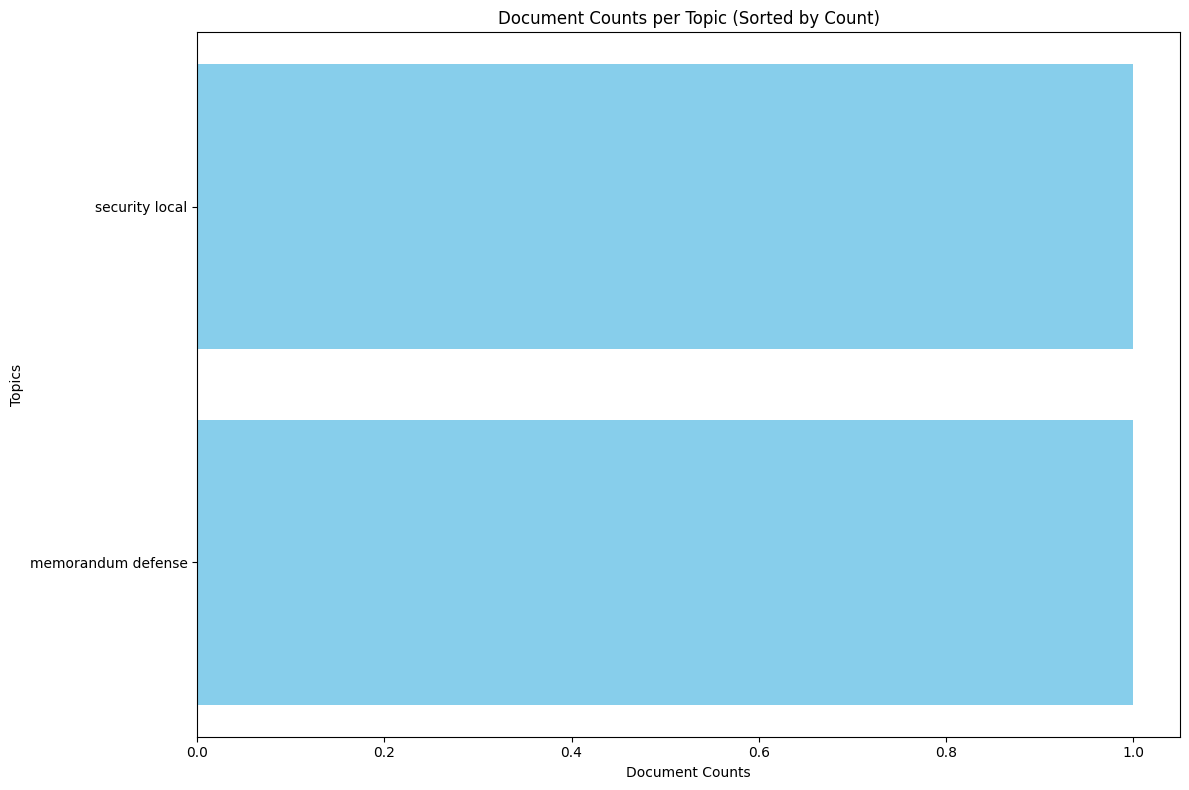

In [248]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november',
    'and', 'the', 'for', 'sure', 'frameworks', 'please', 'due', 'comments', 'along', 'after', 'framework',
    'type', 'within', 'city', 'general', 'efforts', 'attorney', 'rfi', 'tools', 'presidential', 'biden', 'dpa'
]

# Function for LDA topic modeling with auto-generated topic labels
def lda_topic_modeling_with_names(df, text_column, n_topics=2, max_df=0.85, min_df=1):
    # Drop NaN values in the text column
    df = df.dropna(subset=[text_column])

    # Check if there are enough documents
    if df.shape[0] < n_topics:
        print(f"Not enough documents for {n_topics} topics. Found {df.shape[0]} documents.")
        return

    # Create a CountVectorizer
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=custom_stop_words)

    # Fit and transform the text data
    tf = vectorizer.fit_transform(df[text_column])

    # Create the LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=20, learning_decay=0.7)

    # Fit the model
    lda.fit(tf)

    # Get document-topic matrix
    document_topic_matrix = lda.transform(tf)

    # Calculate the number of documents per topic
    topic_document_counts = document_topic_matrix.sum(axis=0)

    # Create a list of topics sorted by document counts (descending order)
    sorted_topics = sorted(range(len(topic_document_counts)), key=lambda i: -topic_document_counts[i])

    # Generate topic names based on top words
    print("\nTopics Sorted by Document Counts:")
    topic_names = []
    sorted_counts = []
    for i, topic_index in enumerate(sorted_topics):
        words = [vectorizer.get_feature_names_out()[index] for index in lda.components_[topic_index].argsort()[-10:]]
        print(f"Topic {i}:")
        print(words)
        print(f"Number of Documents: {topic_document_counts[topic_index]:.2f}\n")
        topic_label = " ".join(words[-2:])  # Last 2 significant words
        topic_names.append(topic_label)
        sorted_counts.append(topic_document_counts[topic_index])

    # Visualize the results with topic names sorted by document count
    plt.figure(figsize=(12, 8))
    plt.barh(topic_names, sorted_counts, color='skyblue')
    plt.xlabel("Document Counts")
    plt.ylabel("Topics")
    plt.title("Document Counts per Topic (Sorted by Count)")
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

# Function for filtering and LDA topic modeling
def lda_topic_modeling_by_category(df, category_column, text_column, target_category, n_topics=2, max_df=0.85, min_df=1):
    # Filter the dataframe for the specific category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    print(f"Performing LDA for category: {target_category}")
    # Call the existing LDA function with the filtered data
    lda_topic_modeling_with_names(filtered_df, text_column, n_topics, max_df, min_df)

# Example Usage
# Perform LDA for the 'gov_public_sector' category
lda_topic_modeling_by_category(df2, 'Category', 'Text', 'gov_public_sector', n_topics=2)

### NIST Data Set 2: LDA Topic Modeling (Industry 5: Research Institutions and Academia) 

Performing LDA for category: academia

Topics Sorted by Document Counts:
Topic 0:
['data', 'management', 'cyber', 'agency', 'foundation', 'governance', 'berkeley', 'model', 'cybersecurity', 'risk']
Number of Documents: 2.98

Topic 1:
['language', 'practices', 'data', '2021', 'model', 'human', 'red', 'teaming', 'generative', '2023']
Number of Documents: 2.61

Topic 2:
['practices', 'potential', 'capabilities', 'system', 'protection', 'pandemic', 'access', 'privacy', 'security', 'data']
Number of Documents: 2.57

Topic 3:
['ve', '2021', 'engineering', '2023', 'development', 'doi', 'social', 'approach', 'socio', 'technical']
Number of Documents: 1.49

Topic 4:
['harms', 'identity', 'social', 'people', 'profiles', 'content', 'online', 'work', 'safety', 'profile']
Number of Documents: 1.35



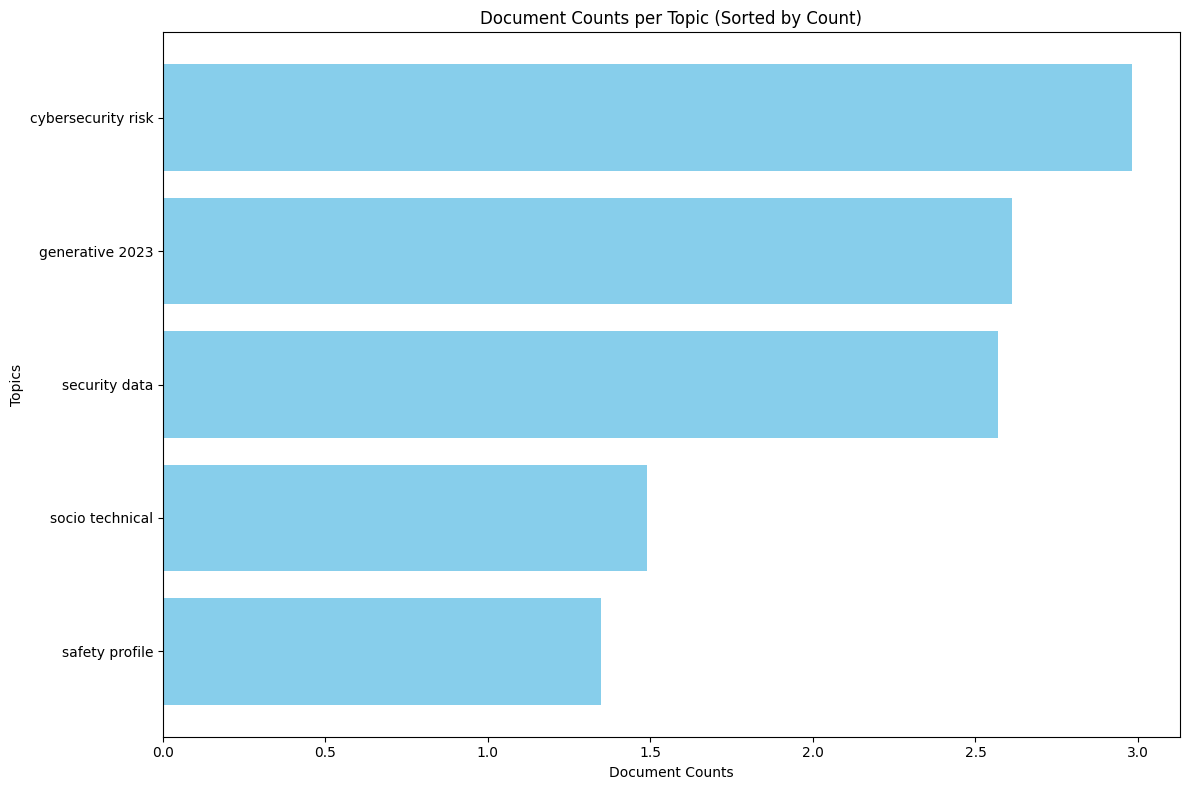

In [232]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november', 'on', 'striking',
    'bringing', 'davis', 'area', '330', 'stands', 'label', 'florida'
]

# Function for LDA topic modeling with auto-generated topic labels
def lda_topic_modeling_with_names(df, text_column, n_topics=7, max_df=0.95, min_df=2):
    # Drop NaN values in the text column
    df = df.dropna(subset=[text_column])

    # Create a CountVectorizer
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=custom_stop_words)

    # Fit and transform the text data
    tf = vectorizer.fit_transform(df[text_column])

    # Create the LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=20, learning_decay=0.7)

    # Fit the model
    lda.fit(tf)

    # Get document-topic matrix
    document_topic_matrix = lda.transform(tf)

    # Calculate the number of documents per topic
    topic_document_counts = document_topic_matrix.sum(axis=0)

    # Create a list of topics sorted by document counts (descending order)
    sorted_topics = sorted(range(len(topic_document_counts)), key=lambda i: -topic_document_counts[i])

    # Generate topic names based on top words
    print("\nTopics Sorted by Document Counts:")
    topic_names = []
    sorted_counts = []
    for i, topic_index in enumerate(sorted_topics):
        words = [vectorizer.get_feature_names_out()[index] for index in lda.components_[topic_index].argsort()[-10:]]
        print(f"Topic {i}:")
        print(words)
        print(f"Number of Documents: {topic_document_counts[topic_index]:.2f}\n")
        topic_label = " ".join(words[-2:])  # Last 2 significant words
        topic_names.append(topic_label)
        sorted_counts.append(topic_document_counts[topic_index])

    # Visualize the results with topic names sorted by document count
    plt.figure(figsize=(12, 8))
    plt.barh(topic_names, sorted_counts, color='skyblue')
    plt.xlabel("Document Counts")
    plt.ylabel("Topics")
    plt.title("Document Counts per Topic (Sorted by Count)")
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

# Function for filtering and LDA topic modeling
def lda_topic_modeling_by_category(df, category_column, text_column, target_category, n_topics=7, max_df=0.95, min_df=2):
    # Filter the dataframe for the specific category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    print(f"Performing LDA for category: {target_category}")
    # Call the existing LDA function with the filtered data
    lda_topic_modeling_with_names(filtered_df, text_column, n_topics, max_df, min_df)

# Example Usage
# Perform LDA for the 'advocacy' category
lda_topic_modeling_by_category(df2, 'Category', 'Text', 'academia', n_topics=5)

### NIST Data Set 2: LDA Topic Modeling (Industry 6: Independent) 

Performing LDA for category: independent

Topics Sorted by Document Counts:
Topic 0:
['technology', 'intelligence', 'model', 'ethical', 'government', 'public', 'system', 'procurement', 'ethics', 'data']
Number of Documents: 10.73

Topic 1:
['data', 'principles', 'frameworks', 'system', 'organizations', 'development', 'rmf', 'management', 'framework', 'risk']
Number of Documents: 7.91

Topic 2:
['machine', 'time', 'human', 'neurons', 'networks', 'neural', 'test', 'error', 'network', 'learning']
Number of Documents: 1.90

Topic 3:
['reason', 'public', 'risk', 'need', 'management', 'general', 'status', 'intelligence', 'artificial', 'framework']
Number of Documents: 1.43

Topic 4:
['time', 'work', 'between', 'individual', 'job', 'private', 'workers', 'government', 'public', 'sector']
Number of Documents: 1.03



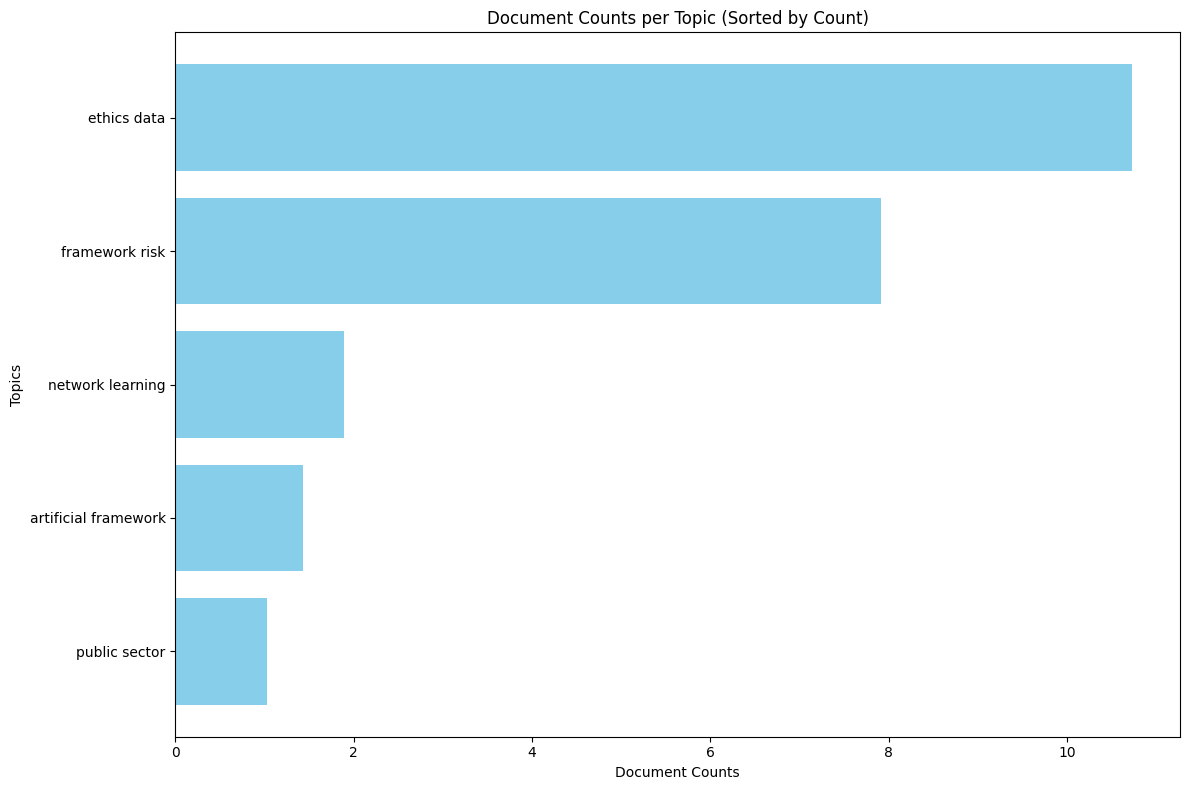

In [235]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november',
    'for', 'and', 'tuesday', 'hello', 'jobs', 'friday', 'eastern', 'greetings', 'fortunately', 'attachments',
    'who', 'change'
]

# Function for LDA topic modeling with auto-generated topic labels
def lda_topic_modeling_with_names(df, text_column, n_topics=7, max_df=0.95, min_df=2):
    # Drop NaN values in the text column
    df = df.dropna(subset=[text_column])

    # Create a CountVectorizer
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=custom_stop_words)

    # Fit and transform the text data
    tf = vectorizer.fit_transform(df[text_column])

    # Create the LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=20, learning_decay=0.7)

    # Fit the model
    lda.fit(tf)

    # Get document-topic matrix
    document_topic_matrix = lda.transform(tf)

    # Calculate the number of documents per topic
    topic_document_counts = document_topic_matrix.sum(axis=0)

    # Create a list of topics sorted by document counts (descending order)
    sorted_topics = sorted(range(len(topic_document_counts)), key=lambda i: -topic_document_counts[i])

    # Generate topic names based on top words
    print("\nTopics Sorted by Document Counts:")
    topic_names = []
    sorted_counts = []
    for i, topic_index in enumerate(sorted_topics):
        words = [vectorizer.get_feature_names_out()[index] for index in lda.components_[topic_index].argsort()[-10:]]
        print(f"Topic {i}:")
        print(words)
        print(f"Number of Documents: {topic_document_counts[topic_index]:.2f}\n")
        topic_label = " ".join(words[-2:])  # Last 2 significant words
        topic_names.append(topic_label)
        sorted_counts.append(topic_document_counts[topic_index])

    # Visualize the results with topic names sorted by document count
    plt.figure(figsize=(12, 8))
    plt.barh(topic_names, sorted_counts, color='skyblue')
    plt.xlabel("Document Counts")
    plt.ylabel("Topics")
    plt.title("Document Counts per Topic (Sorted by Count)")
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

# Function for filtering and LDA topic modeling
def lda_topic_modeling_by_category(df, category_column, text_column, target_category, n_topics=7, max_df=0.95, min_df=2):
    # Filter the dataframe for the specific category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    print(f"Performing LDA for category: {target_category}")
    # Call the existing LDA function with the filtered data
    lda_topic_modeling_with_names(filtered_df, text_column, n_topics, max_df, min_df)

# Example Usage
# Perform LDA for the 'advocacy' category
lda_topic_modeling_by_category(df1, 'Category', 'Text', 'independent', n_topics=5)

### Combined NIST Data: LDA Topic Modeling


Topics Sorted by Document Counts:
Topic 0:
['development', 'security', 'teaming', 'safety', '2023', 'red', 'risk', 'data', 'standards', 'model']
Number of Documents: 134.19

Topic 1:
['standards', 'model', 'organizations', 'system', 'development', 'data', 'rmf', 'management', 'framework', 'risk']
Number of Documents: 83.26

Topic 2:
['model', 'technology', 'openai', 'data', 'developers', '2024', 'available', 'content', '2023', 'generative']
Number of Documents: 32.62

Topic 3:
['ethical', 'model', 'intelligence', 'technology', 'procurement', 'system', 'public', 'government', 'ethics', 'data']
Number of Documents: 23.44

Topic 4:
['watermark', 'rfi', 'generated', 'made', 'detection', '2021', 'watermarking', 'digital', 'human', 'content']
Number of Documents: 19.91

Topic 5:
['appropriate', 'technology', 'information', 'agencies', 'including', 'order', 'federal', 'security', 'content', 'data']
Number of Documents: 18.61

Topic 6:
['efforts', 'sector', 'based', 'technology', 'health', 'a

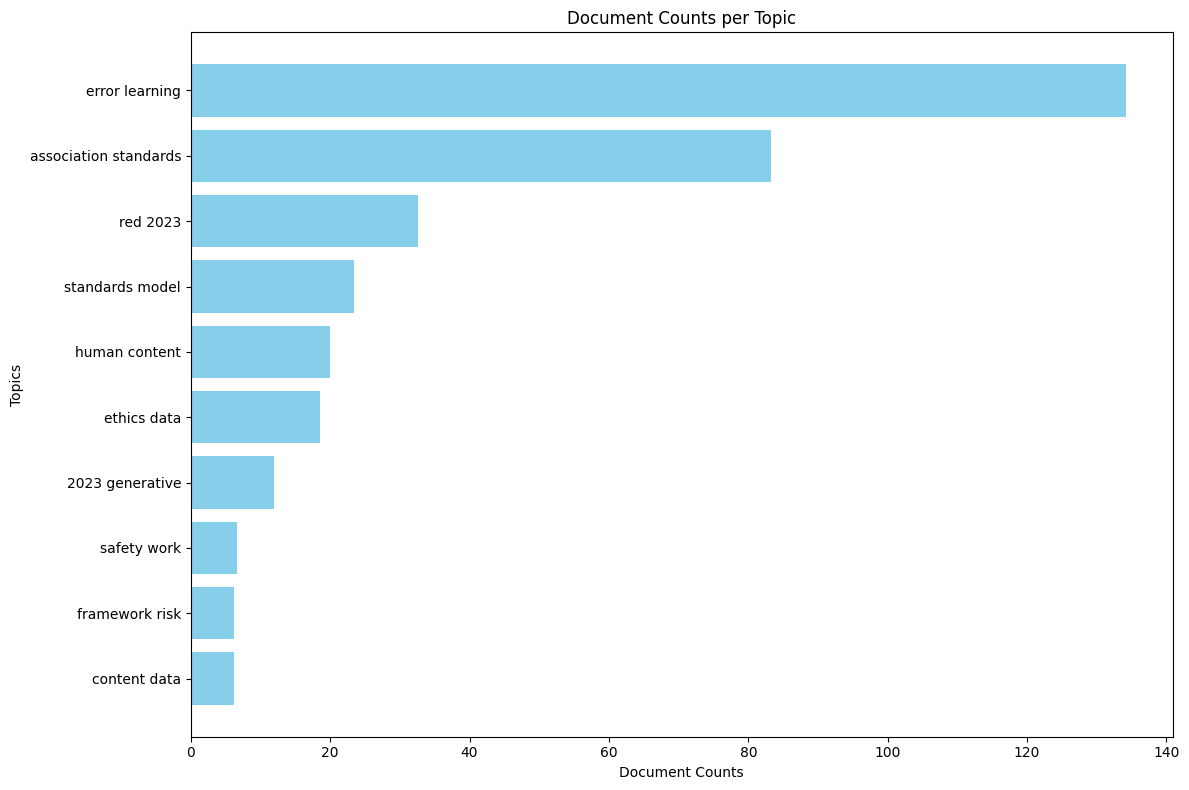

In [186]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 'black', 'cleveland',
    'pendingpost', 'tabassi', 'any', 'has', 'comment', 'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also',
    'include', 'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 'models', 'an', 'or',
    'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would',
    'if', 'org', '226', '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks'
]

# Function for LDA topic modeling with topic names
def lda_topic_modeling_with_names(df, text_column, n_topics=10, max_df=0.95, min_df=2):
    # Drop NaN values in the text column
    df = df.dropna(subset=[text_column])

    # Create a CountVectorizer
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=custom_stop_words)

    # Fit and transform the text data
    tf = vectorizer.fit_transform(df[text_column])

    # Create the LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=20, learning_decay=0.7)

    # Fit the model
    lda.fit(tf)

    # Get document-topic matrix
    document_topic_matrix = lda.transform(tf)

    # Calculate the number of documents per topic
    topic_document_counts = document_topic_matrix.sum(axis=0)

    # Create a list of topics sorted by document counts
    sorted_topics = sorted(range(len(topic_document_counts)), key=lambda i: -topic_document_counts[i])

    # Generate topic names based on top words
    print("\nTopics Sorted by Document Counts:")
    topic_names = []
    for i, topic_index in enumerate(sorted_topics):
        words = [vectorizer.get_feature_names_out()[index] for index in lda.components_[topic_index].argsort()[-10:]]
        print(f"Topic {i}:")
        print(words)
        print(f"Number of Documents: {topic_document_counts[topic_index]:.2f}\n")
        topic_label = " ".join(words[-2:])  # Last 2 significant words
        topic_names.append(topic_label)

    # Visualize the results with topic names
    plt.figure(figsize=(12, 8))
    plt.barh([topic_names[i] for i in sorted_topics],
             [topic_document_counts[i] for i in sorted_topics],
             color='skyblue')
    plt.xlabel("Document Counts")
    plt.ylabel("Topics")
    plt.title("Document Counts per Topic")
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

# Usage
lda_topic_modeling_with_names(df3, 'Text', n_topics=10)

### NIST Data Set 1: K-Means Clustering 

Top terms per cluster:
Cluster 0 (data rmf): data, rmf, model, development, organizations
Cluster 1 (organizations trustworthiness): organizations, trustworthiness, development, principles, data
Cluster 2 (learning network): learning, network, brain, neural, rate
Cluster 3 (artificial intelligence): artificial, intelligence, rfi, trusted, document
Cluster 4 (robot market): robot, market, laws, july, human


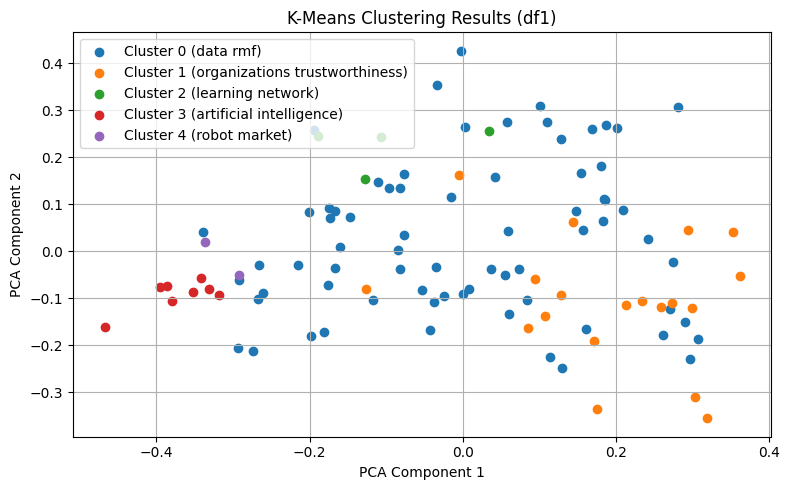

In [259]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november', 
    'the', 'and', 'for', 'did', 'type', 'attachment', 'date', 'risk', 'framework', 'attached',
    'management', 'comments', 'pdf', 'new', 'status', 'please', 'response', 'web'
]

# K-Means Clustering Function
def kmeans_clustering_with_visualization(df, text_column, n_clusters=5, max_features=2000):
    # Drop NaN values
    df = df.dropna(subset=[text_column])

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=max_features, stop_words=custom_stop_words)
    tfidf_matrix = vectorizer.fit_transform(df[text_column])

    # K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)

    # Assign clusters to documents
    df['Cluster'] = kmeans.labels_

    # Extract top terms per cluster and generate cluster names
    print("Top terms per cluster:")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    cluster_names = []
    for i in range(n_clusters):
        top_terms = [terms[ind] for ind in order_centroids[i, :5]]  # Top 5 terms
        cluster_label = " ".join(top_terms[:2])  # Use the top 2 terms for naming
        cluster_names.append(cluster_label)
        print(f"Cluster {i} ({cluster_label}): ", end="")
        print(", ".join(top_terms))

    # Dimensionality Reduction for Visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(tfidf_matrix.toarray())

    # Plot the clusters
    plt.figure(figsize=(8, 5))  # Reduced size for easier screenshotting
    for i in range(n_clusters):
        cluster_data = reduced_data[df['Cluster'] == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i} ({cluster_names[i]})')

    plt.title('K-Means Clustering Results (df1)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return df

# Example Usage
# Assuming df1 is a pandas DataFrame with a column 'Text'
clustered_df1 = kmeans_clustering_with_visualization(df1, 'Text', n_clusters=5)

### NIST Data Set 1: K-Means Clustering (Industry 1: Industry Associations) 

Top terms per cluster for category 'industry_associations':
Cluster 0 (framework risk): framework, risk, trustworthiness, management, cta, data, ecc, rfi, nema, development
Cluster 1 (music copying): music, copying, copyrighted, recording, licenses, clearances, training, rmf, constitute, artists
Cluster 2 (ieee human): ieee, human, design, system, limitations, risk, dignity, wellbeing, agents, loss
Cluster 3 (data risk): data, risk, framework, bias, model, gleif, banks, financial, management, system
Cluster 4 (education public): education, public, artificial, intelligence, national, safety, risk, society, qualified, role


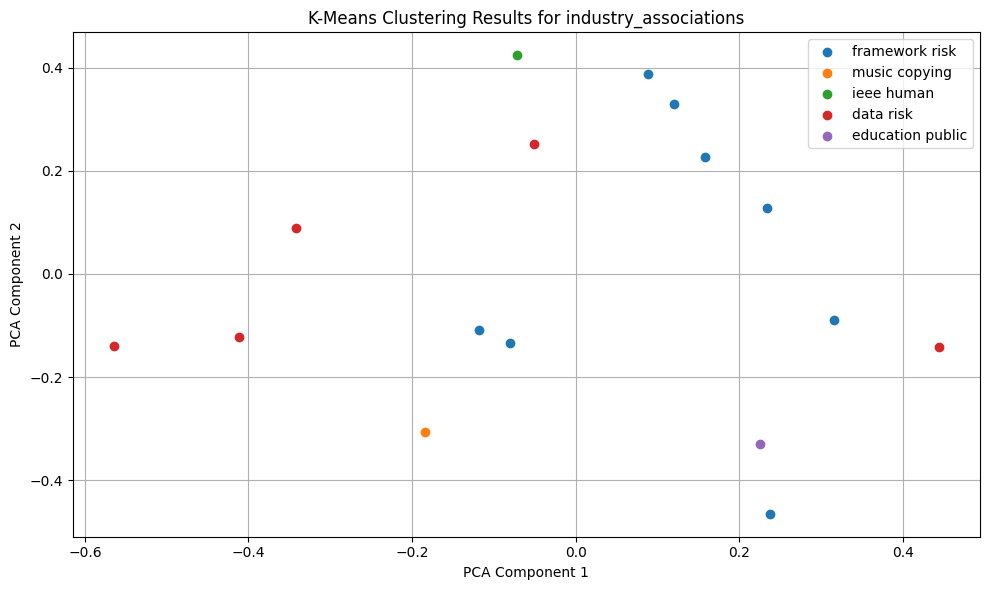

In [269]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november', 
    'the', 'and', 'for', 'did', 'type', 'fair', 'professional', 'credentialed', 'nspe', 
    'individuals', 'materials', 'individual', 'cir', 'lei', 'sound', 'engineers'
]

# K-Means Clustering Function for a Subset with Auto-Generated Cluster Names
def kmeans_clustering_for_category(df, category_column, target_category, text_column, n_clusters=5, max_features=2000):
    # Filter the dataframe for the specified category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    # Drop NaN values in the text column
    filtered_df = filtered_df.dropna(subset=[text_column])

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=max_features, stop_words=custom_stop_words)
    tfidf_matrix = vectorizer.fit_transform(filtered_df[text_column])

    # K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)

    # Assign clusters to documents
    filtered_df['Cluster'] = kmeans.labels_

    # Extract top terms per cluster and generate cluster names
    print(f"Top terms per cluster for category '{target_category}':")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    cluster_names = []
    for i in range(n_clusters):
        top_terms = [terms[ind] for ind in order_centroids[i, :10]]
        cluster_label = f"{top_terms[0]} {top_terms[1]}"  # Combine the top two terms for the cluster name
        cluster_names.append(cluster_label)
        print(f"Cluster {i} ({cluster_label}): {', '.join(top_terms)}")

    # Map cluster names to the DataFrame
    filtered_df['Cluster_Name'] = filtered_df['Cluster'].map(lambda x: cluster_names[x])

    # Dimensionality Reduction for Visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(tfidf_matrix.toarray())

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        cluster_data = reduced_data[filtered_df['Cluster'] == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=cluster_names[i])

    plt.title(f'K-Means Clustering Results for {target_category}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return filtered_df

# Example Usage
# Perform K-Means clustering for the 'industry_associations' category
clustered_subset_df = kmeans_clustering_for_category(df1, 'Category', 'industry_associations', 'Text', n_clusters=5)

### NIST Data Set 1: K-Means Clustering (Industry 2: Tech and Private Sector) 

Top terms per cluster for category 'tech_private_sector':
Cluster 0 (risk response): risk, response, model, data, attached, organizations, attachments, business, specific, artificial
Cluster 1 (artificial intelligence): artificial, intelligence, data, risk, nec, quality, technology, rmf, security, aiml
Cluster 2 (risk development): risk, development, organizations, model, data, rmf, principles, design, system, governance
Cluster 3 (company human): company, human, performance, ais, benchmark, reasoning, allow, benchmarks, feedback, demand
Cluster 4 (market ecosystem): market, ecosystem, innovation, value, consumer, chain, independent, verification, laws, encourage


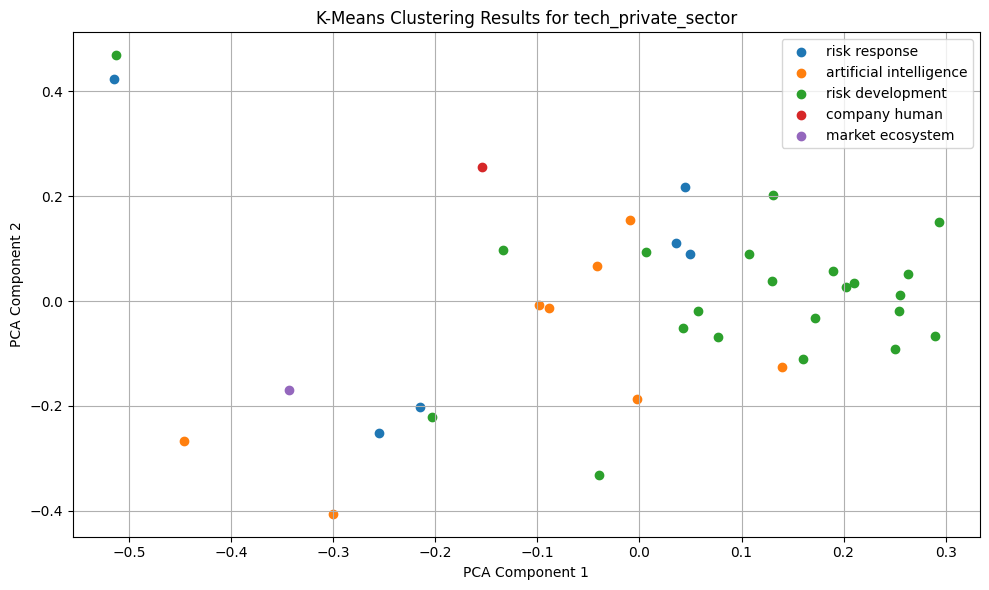

In [274]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november', 
    'the', 'and', 'for', 'did', 'type', 'management', 'cards', 'card', 'quantuniversity', 'google',
    'bluvector', 'september', 'comments', 'report', 'dla', 'isoiec', 'piper', 'scorebox',
    'continual', 'correct', 'framework', 'grading', 'please', 'able', 'along'
]

# K-Means Clustering Function for a Subset with Auto-Generated Cluster Names
def kmeans_clustering_for_category(df, category_column, target_category, text_column, n_clusters=5, max_features=2000):
    # Filter the dataframe for the specified category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    # Drop NaN values in the text column
    filtered_df = filtered_df.dropna(subset=[text_column])

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=max_features, stop_words=custom_stop_words)
    tfidf_matrix = vectorizer.fit_transform(filtered_df[text_column])

    # K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)

    # Assign clusters to documents
    filtered_df['Cluster'] = kmeans.labels_

    # Extract top terms per cluster and generate cluster names
    print(f"Top terms per cluster for category '{target_category}':")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    cluster_names = []
    for i in range(n_clusters):
        top_terms = [terms[ind] for ind in order_centroids[i, :10]]
        cluster_label = f"{top_terms[0]} {top_terms[1]}"  # Combine the top two terms for the cluster name
        cluster_names.append(cluster_label)
        print(f"Cluster {i} ({cluster_label}): {', '.join(top_terms)}")

    # Map cluster names to the DataFrame
    filtered_df['Cluster_Name'] = filtered_df['Cluster'].map(lambda x: cluster_names[x])

    # Dimensionality Reduction for Visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(tfidf_matrix.toarray())

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        cluster_data = reduced_data[filtered_df['Cluster'] == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=cluster_names[i])

    plt.title(f'K-Means Clustering Results for {target_category}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return filtered_df

# Example Usage
# Perform K-Means clustering for the 'industry_associations' category
clustered_subset_df = kmeans_clustering_for_category(df1, 'Category', 'tech_private_sector', 'Text', n_clusters=5)

### NIST Data Set 1: K-Means Clustering (Industry 3: Advocacy and Non-Profit Organizations) 

Top terms per cluster for category 'advocacy':
Cluster 0 (algorithms bias): algorithms, bias, policing, communities, biased, algorithmic, lowincome, docket, surveillance, accountability
Cluster 1 (rmf management): rmf, management, system, criteria, principles, audit, intelligence, artificial, catastrophic, accountability
Cluster 2 (mitre maturity): mitre, maturity, response, organization, security, organizations, management, model, malicious, information
Cluster 3 (aerospace corporation): aerospace, corporation, offices, artificial, intelligence, mission, trusted, assurance, rmf, management
Cluster 4 (app ethical): app, ethical, association, development, solutions, principles, policy, consumers, organizations, standard


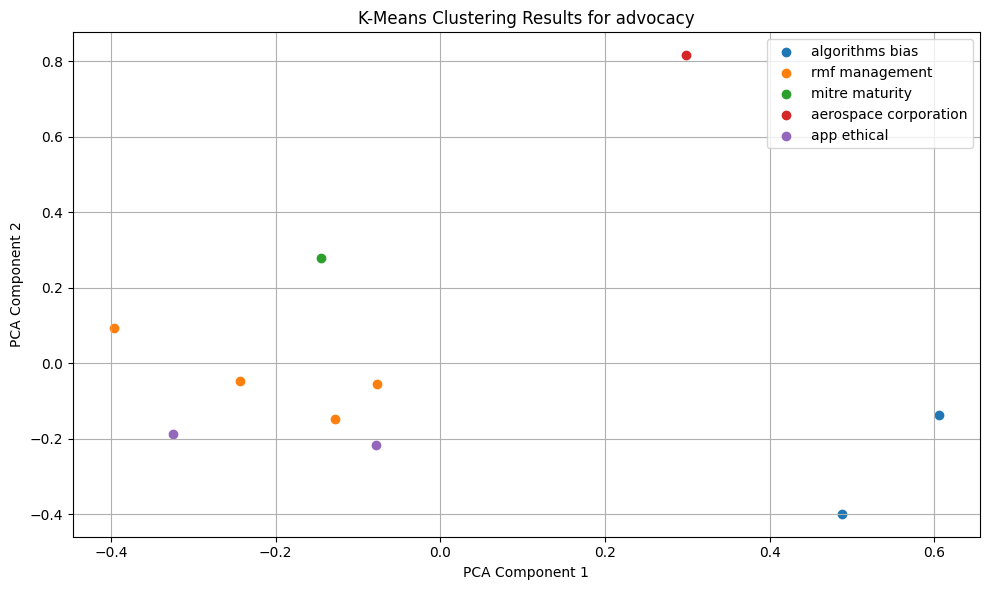

In [278]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november', 
    'the', 'and', 'for', 'did', 'type', 'shotspotter', 'epic', 'oecd', 'forhumanity', 'atlas',
    'new', 'ssos', 'comments', 'ugai', 'space', 'sep', 'ssos', 'frand', 'framework', 'police', 'risk'
]

# K-Means Clustering Function for a Subset with Auto-Generated Cluster Names
def kmeans_clustering_for_category(df, category_column, target_category, text_column, n_clusters=5, max_features=2000):
    # Filter the dataframe for the specified category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    # Drop NaN values in the text column
    filtered_df = filtered_df.dropna(subset=[text_column])

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=max_features, stop_words=custom_stop_words)
    tfidf_matrix = vectorizer.fit_transform(filtered_df[text_column])

    # K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)

    # Assign clusters to documents
    filtered_df['Cluster'] = kmeans.labels_

    # Extract top terms per cluster and generate cluster names
    print(f"Top terms per cluster for category '{target_category}':")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    cluster_names = []
    for i in range(n_clusters):
        top_terms = [terms[ind] for ind in order_centroids[i, :10]]
        cluster_label = f"{top_terms[0]} {top_terms[1]}"  # Combine the top two terms for the cluster name
        cluster_names.append(cluster_label)
        print(f"Cluster {i} ({cluster_label}): {', '.join(top_terms)}")

    # Map cluster names to the DataFrame
    filtered_df['Cluster_Name'] = filtered_df['Cluster'].map(lambda x: cluster_names[x])

    # Dimensionality Reduction for Visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(tfidf_matrix.toarray())

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        cluster_data = reduced_data[filtered_df['Cluster'] == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=cluster_names[i])

    plt.title(f'K-Means Clustering Results for {target_category}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return filtered_df

# Example Usage
# Perform K-Means clustering for the 'industry_associations' category
clustered_subset_df = kmeans_clustering_for_category(df1, 'Category', 'advocacy', 'Text', n_clusters=5)

### NIST Data Set 1: K-Means Clustering (Industry 4: Government and Public Sector) 

Top terms per cluster for category 'gov_public_sector':
Cluster 0 (risk management): risk, management, processes, framework, stakeholders, organizations, standards, rmf, frameworks, help
Cluster 1 (aiml data): aiml, data, services, provider, default, cloud, wage, inadvertent, violation, optout
Cluster 2 (agency management): agency, management, government, document, artificial, risk, framework, foreign, status, media
Cluster 3 (accountability gao): accountability, gao, framework, product, federal, colleague, entities, oversee, aware, date
Cluster 4 (framework management): framework, management, risk, principles, trustworthiness, cybersecurity, organizations, attributes, guidelines, development


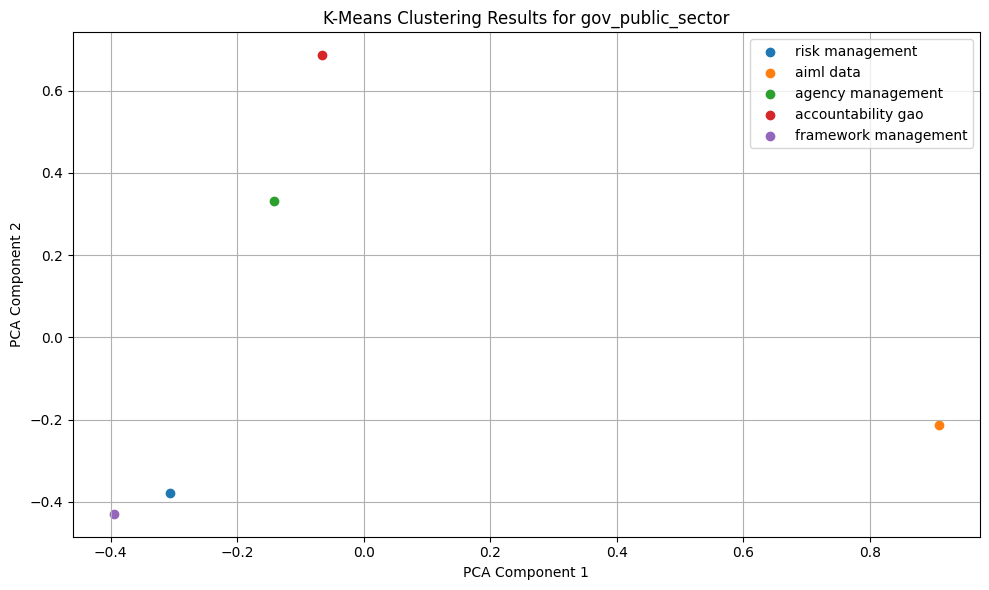

In [287]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november', 
    'the', 'and', 'for', 'did', 'type', 'mayo', 'dennis', 'farahnaaz', 'who', 'staa', 'least',
    'ctec', 'docket', 'web', 'ksizprx', 'phd', 'end', 'optin', 'physical', 'wanted', 'khakoo', 
    'setting', 'reach', 'comes', 'june', 'feel', 'irritating', 'senior', 'seeing', 'equivalent', 
    'hello', 'passed'
]

# K-Means Clustering Function for a Subset with Auto-Generated Cluster Names
def kmeans_clustering_for_category(df, category_column, target_category, text_column, n_clusters=5, max_features=2000):
    # Filter the dataframe for the specified category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    # Drop NaN values in the text column
    filtered_df = filtered_df.dropna(subset=[text_column])

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=max_features, stop_words=custom_stop_words)
    tfidf_matrix = vectorizer.fit_transform(filtered_df[text_column])

    # K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)

    # Assign clusters to documents
    filtered_df['Cluster'] = kmeans.labels_

    # Extract top terms per cluster and generate cluster names
    print(f"Top terms per cluster for category '{target_category}':")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    cluster_names = []
    for i in range(n_clusters):
        top_terms = [terms[ind] for ind in order_centroids[i, :10]]
        cluster_label = f"{top_terms[0]} {top_terms[1]}"  # Combine the top two terms for the cluster name
        cluster_names.append(cluster_label)
        print(f"Cluster {i} ({cluster_label}): {', '.join(top_terms)}")

    # Map cluster names to the DataFrame
    filtered_df['Cluster_Name'] = filtered_df['Cluster'].map(lambda x: cluster_names[x])

    # Dimensionality Reduction for Visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(tfidf_matrix.toarray())

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        cluster_data = reduced_data[filtered_df['Cluster'] == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=cluster_names[i])

    plt.title(f'K-Means Clustering Results for {target_category}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return filtered_df

# Example Usage
# Perform K-Means clustering for the 'industry_associations' category
clustered_subset_df = kmeans_clustering_for_category(df1, 'Category', 'gov_public_sector', 'Text', n_clusters=5)

### NIST Data Set 1: K-Means Clustering (Industry 5: Research Institutions and Academia) 

Top terms per cluster for category 'academia':
Cluster 0 (data model): data, model, testing, operational, medicine, privacy, research, mission, leadership, development
Cluster 1 (foundation learning): foundation, learning, machine, document, artificial, intelligence, experimentation, exploration, exploits, explainable
Cluster 2 (attacks model): attacks, model, sensitive, data, private, privacy, security, threat, learning, modelingbased
Cluster 3 (emerging data): emerging, data, information, organizations, trustworthiness, principles, development, engineering, security, design
Cluster 4 (digital principles): digital, principles, rmf, rights, act, safety, guidance, technologies, artificial, governance


/Users/haimanwong/miniconda/envs/hicss58/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['elsi'] not in stop_words.
  warnings.warn(


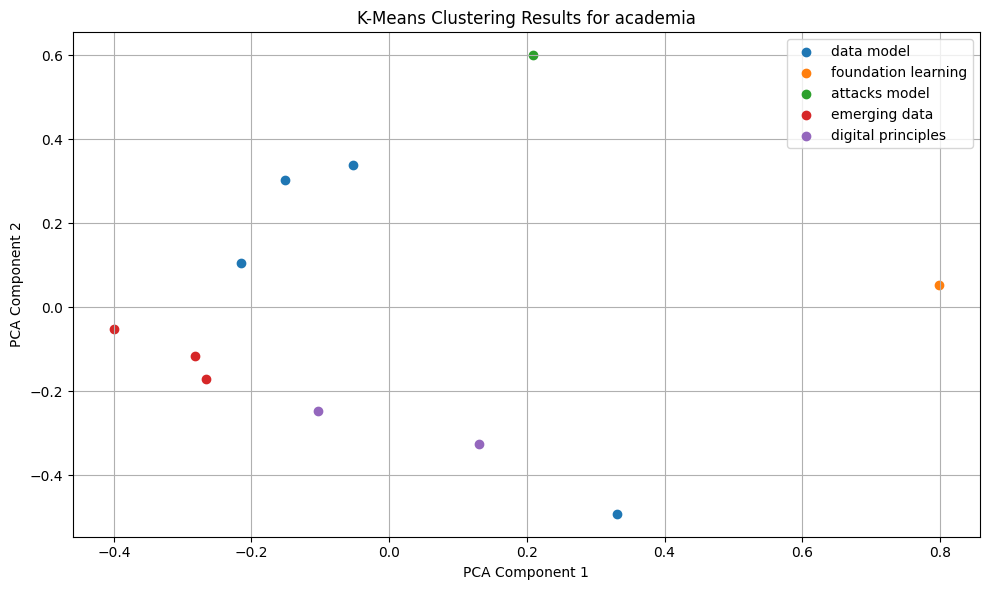

In [323]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
     'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november', 
    'the', 'and', 'for', 'did', 'type', 'mayo', 'dennis', 'farahnaaz', 'who', 'staa', 'least',
    'ctec', 'docket', 'web', 'ksizprx', 'phd', 'end', 'optin', 'physical', 'wanted', 'khakoo', 
    'setting', 'reach', 'comes', 'june', 'feel', 'irritating', 'senior', 'seeing', 'equivalent', 
    'hello', 'passed', 'pdf', 'comments', 'lpqd', 'vertical', 'center', 'rfi', 'comments',
    'best', 'attached', 'topic', 'already', 'dear', 'erik', 'deumens', 'deumensufl', 'franse', 'assurance',
    'dierent', 'cset', 'georgetown', 'recommend', 'dierentially', 'carnegie', 'director', 'postprocessing', 'inversion',
    'mellon', 'including', 'both', 'edu', 'elsi,' 'example', 'realistic', 'risk', 'framework', 'florida', 'system', 'different',
    'management', 'university', 'idsa', 'editorial', 'against', 'supporting', 'call', 'practices', 'regarding', 'reference', 'date',
    'material', 'documents', 'response', 'email', 'subject', 'submit', 'evaluating', 'evaulated', 'event', 'characteristics', 'zick', 'nonai',
    'general', 'essential', 'establishing', 'establishes', 'european', 'evaluates', 'example', 'evaluate', 'evaluated', 'evans', 'evaluation',
    'evaluator', 'random', 'exists', 'expected', 'expect', 'expectation', 'usenix', 'evaluationand', 'events', 'even', 'evaluators', 'class',
    'establish', 'etc', 'etchemendy', 'evaluations', 'lock', 'zicari', 'enumeration', 'entities', 'entire', 'examples', 'exact', 'door', 
    'exactly', 'evolving', 'evolves', 'everyone', 'expanded', 'existing', 'every', 'experiences', 'experience', 'ethayarajh', 'factor', 'experts',
    'factors', 'esposito', 'explain', 'erode', 'especially', 'error', 'expert', 'explanations', 'explicit', 'exploit', 'expressed', 
    'enough', 'ensure', 'ensuring', 'erm'
]

# K-Means Clustering Function for a Subset with Auto-Generated Cluster Names
def kmeans_clustering_for_category(df, category_column, target_category, text_column, n_clusters=5, max_features=2000):
    # Filter the dataframe for the specified category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    # Drop NaN values in the text column
    filtered_df = filtered_df.dropna(subset=[text_column])

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=max_features, stop_words=custom_stop_words)
    tfidf_matrix = vectorizer.fit_transform(filtered_df[text_column])

    # K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)

    # Assign clusters to documents
    filtered_df['Cluster'] = kmeans.labels_

    # Extract top terms per cluster and generate cluster names
    print(f"Top terms per cluster for category '{target_category}':")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    cluster_names = []
    for i in range(n_clusters):
        top_terms = [terms[ind] for ind in order_centroids[i, :10]]
        cluster_label = f"{top_terms[0]} {top_terms[1]}"  # Combine the top two terms for the cluster name
        cluster_names.append(cluster_label)
        print(f"Cluster {i} ({cluster_label}): {', '.join(top_terms)}")

    # Map cluster names to the DataFrame
    filtered_df['Cluster_Name'] = filtered_df['Cluster'].map(lambda x: cluster_names[x])

    # Dimensionality Reduction for Visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(tfidf_matrix.toarray())

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        cluster_data = reduced_data[filtered_df['Cluster'] == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=cluster_names[i])

    plt.title(f'K-Means Clustering Results for {target_category}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return filtered_df

# Example Usage
# Perform K-Means clustering for the 'industry_associations' category
clustered_subset_df = kmeans_clustering_for_category(df1, 'Category', 'academia', 'Text', n_clusters=5)

### NIST Data Set 1: K-Means Clustering (Industry 6: Independent) 

Top terms per cluster for category 'independent':
Cluster 0 (team ethically): team, ethically, artificial, professionals, intelligence, chief, improve, scientists, creating, support
Cluster 1 (organizations trustworthiness): organizations, trustworthiness, development, bias, safety, principles, data, privacy, design, harmful
Cluster 2 (minority assessment): minority, assessment, power, usa, rules, data, theory, racial, health, service
Cluster 3 (rmf engineering): rmf, engineering, initiative, research, explanatory, contractor, quality, updated, supported, industry
Cluster 4 (data intelligence): data, intelligence, ethical, human, learning, public, artificial, robot, process, time


/Users/haimanwong/miniconda/envs/hicss58/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['elsi'] not in stop_words.
  warnings.warn(


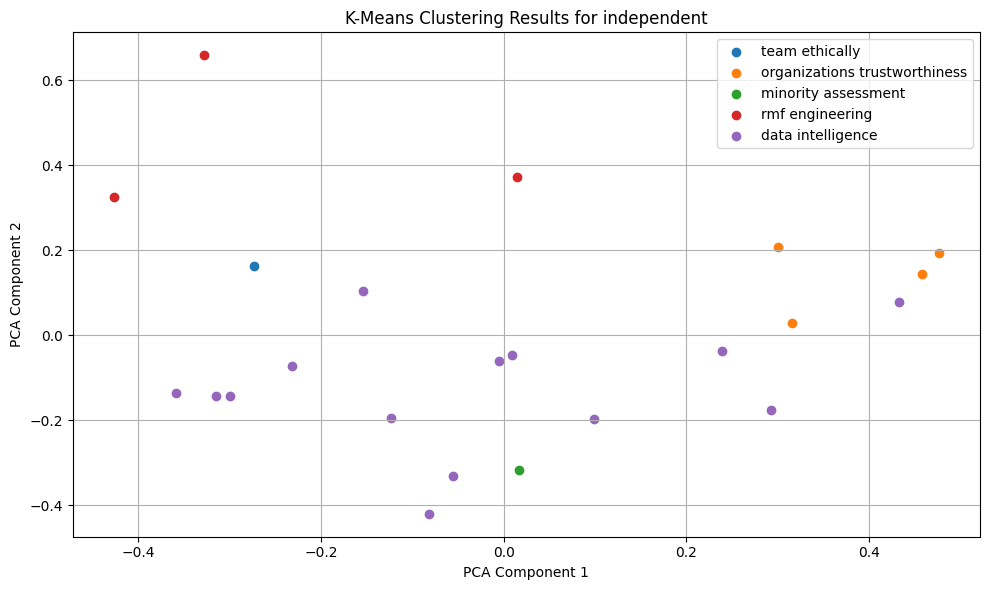

In [331]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november', 
    'the', 'and', 'for', 'did', 'type','mayo', 'dennis', 'farahnaaz', 'who', 'staa', 'least',
    'ctec', 'docket', 'web', 'ksizprx', 'phd', 'end', 'optin', 'physical', 'wanted', 'khakoo', 
    'setting', 'reach', 'comes', 'june', 'feel', 'irritating', 'senior', 'seeing', 'equivalent', 
    'hello', 'passed', 'pdf', 'comments', 'lpqd', 'vertical', 'center', 'rfi', 'comments',
    'best', 'attached', 'topic', 'already', 'dear', 'erik', 'deumens', 'deumensufl', 'franse', 'assurance',
    'dierent', 'cset', 'georgetown', 'recommend', 'dierentially', 'carnegie', 'director', 'postprocessing', 'inversion',
    'mellon', 'including', 'both', 'edu', 'elsi,' 'example', 'realistic', 'risk', 'framework', 'florida', 'system', 'different',
    'management', 'university', 'idsa', 'editorial', 'against', 'supporting', 'call', 'practices', 'regarding', 'reference', 'date',
    'material', 'documents', 'response', 'email', 'subject', 'submit', 'evaluating', 'evaulated', 'event', 'characteristics', 'zick', 'nonai',
    'general', 'essential', 'establishing', 'establishes', 'european', 'evaluates', 'example', 'evaluate', 'evaluated', 'evans', 'evaluation',
    'evaluator', 'random', 'exists', 'expected', 'expect', 'expectation', 'usenix', 'evaluationand', 'events', 'even', 'evaluators', 'class',
    'establish', 'etc', 'etchemendy', 'evaluations', 'lock', 'zicari', 'enumeration', 'entities', 'entire', 'examples', 'exact', 'door', 
    'exactly', 'evolving', 'evolves', 'everyone', 'expanded', 'existing', 'every', 'experiences', 'experience', 'ethayarajh', 'factor', 'experts',
    'factors', 'esposito', 'explain', 'erode', 'especially', 'error', 'expert', 'explanations', 'explicit', 'exploit', 'expressed', 
    'enough', 'ensure', 'ensuring', 'erm', 'into', 'john', 'city', 'focused', 'officer', 'participate', 'safe', 'new', 'fig', 'please', 'provide',
    'use', 'used', 'inherently', 'under', 'while', 'control', 'important', 'easy', 'version', 'find', 'additional', 'conducted', 'big', 'very', 'about',
    'areas', 'president', 'game', 'rate', 'incorporate', 'within'
]

# K-Means Clustering Function for a Subset with Auto-Generated Cluster Names
def kmeans_clustering_for_category(df, category_column, target_category, text_column, n_clusters=5, max_features=2000):
    # Filter the dataframe for the specified category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    # Drop NaN values in the text column
    filtered_df = filtered_df.dropna(subset=[text_column])

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=max_features, stop_words=custom_stop_words)
    tfidf_matrix = vectorizer.fit_transform(filtered_df[text_column])

    # K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)

    # Assign clusters to documents
    filtered_df['Cluster'] = kmeans.labels_

    # Extract top terms per cluster and generate cluster names
    print(f"Top terms per cluster for category '{target_category}':")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    cluster_names = []
    for i in range(n_clusters):
        top_terms = [terms[ind] for ind in order_centroids[i, :10]]
        cluster_label = f"{top_terms[0]} {top_terms[1]}"  # Combine the top two terms for the cluster name
        cluster_names.append(cluster_label)
        print(f"Cluster {i} ({cluster_label}): {', '.join(top_terms)}")

    # Map cluster names to the DataFrame
    filtered_df['Cluster_Name'] = filtered_df['Cluster'].map(lambda x: cluster_names[x])

    # Dimensionality Reduction for Visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(tfidf_matrix.toarray())

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        cluster_data = reduced_data[filtered_df['Cluster'] == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=cluster_names[i])

    plt.title(f'K-Means Clustering Results for {target_category}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return filtered_df

# Example Usage
# Perform K-Means clustering for the 'industry_associations' category
clustered_subset_df = kmeans_clustering_for_category(df1, 'Category', 'independent', 'Text', n_clusters=5)

### NIST Data Set 2: K-Means Clustering

Top terms per cluster:
Cluster 0 (ai launch): ai, launch, auditors, human, output
Cluster 1 (ai content): ai, content, data, model, digital
Cluster 2 (ai standards): ai, standards, data, model, red
Cluster 3 (2023 notice): 2023, notice, regulations, document, foia
Cluster 4 (ai model): ai, model, safety, red, 2023


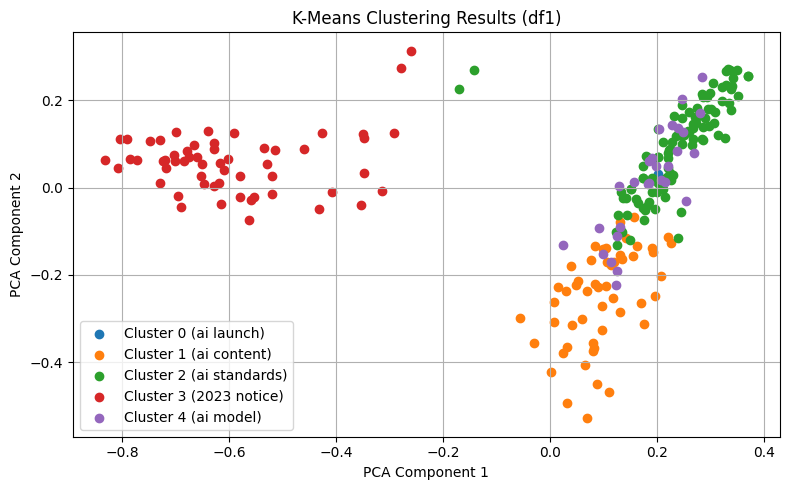

In [263]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november', 
    'the', 'and', 'for', 'did', 'type', 'attachment', 'date', 'risk', 'framework', 'attached',
    'management', 'comments', 'pdf', 'new', 'status', 'please', 'response', 'web', 'to', 'of',
    'on'
]

# K-Means Clustering Function
def kmeans_clustering_with_visualization(df, text_column, n_clusters=5, max_features=2000):
    # Drop NaN values
    df = df.dropna(subset=[text_column])

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=max_features, stop_words=custom_stop_words)
    tfidf_matrix = vectorizer.fit_transform(df[text_column])

    # K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)

    # Assign clusters to documents
    df['Cluster'] = kmeans.labels_

    # Extract top terms per cluster and generate cluster names
    print("Top terms per cluster:")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    cluster_names = []
    for i in range(n_clusters):
        top_terms = [terms[ind] for ind in order_centroids[i, :5]]  # Top 5 terms
        cluster_label = " ".join(top_terms[:2])  # Use the top 2 terms for naming
        cluster_names.append(cluster_label)
        print(f"Cluster {i} ({cluster_label}): ", end="")
        print(", ".join(top_terms))

    # Dimensionality Reduction for Visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(tfidf_matrix.toarray())

    # Plot the clusters
    plt.figure(figsize=(8, 5))  # Reduced size for easier screenshotting
    for i in range(n_clusters):
        cluster_data = reduced_data[df['Cluster'] == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i} ({cluster_names[i]})')

    plt.title('K-Means Clustering Results (df1)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return df

# Example Usage
# Assuming df1 is a pandas DataFrame with a column 'Text'
clustered_df1 = kmeans_clustering_with_visualization(df2, 'Text', n_clusters=5)

### NIST Data Set 2: K-Means Clustering (Industry 1: Industry Associations) 

/Users/haimanwong/miniconda/envs/hicss58/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['elsi'] not in stop_words.
  warnings.warn(


Top terms per cluster for category 'industry_associations':
Cluster 0 (ai credit): ai, credit, unions, applications, financial, companies, institutions, regulators, cybersecurity, supervisory
Cluster 1 (ai content): ai, content, standards, model, red, development, teaming, data, generative, 2023
Cluster 2 (ai deployers): ai, deployers, responsible, guarantees, obligations, stage, pubs, deployer, developers, differential
Cluster 3 (ai health): ai, health, tools, patients, information, clinical, standards, technology, nurses, tool
Cluster 4 (ieee ai): ieee, ai, businesses, department, app, standards, standard, regulations, association, development


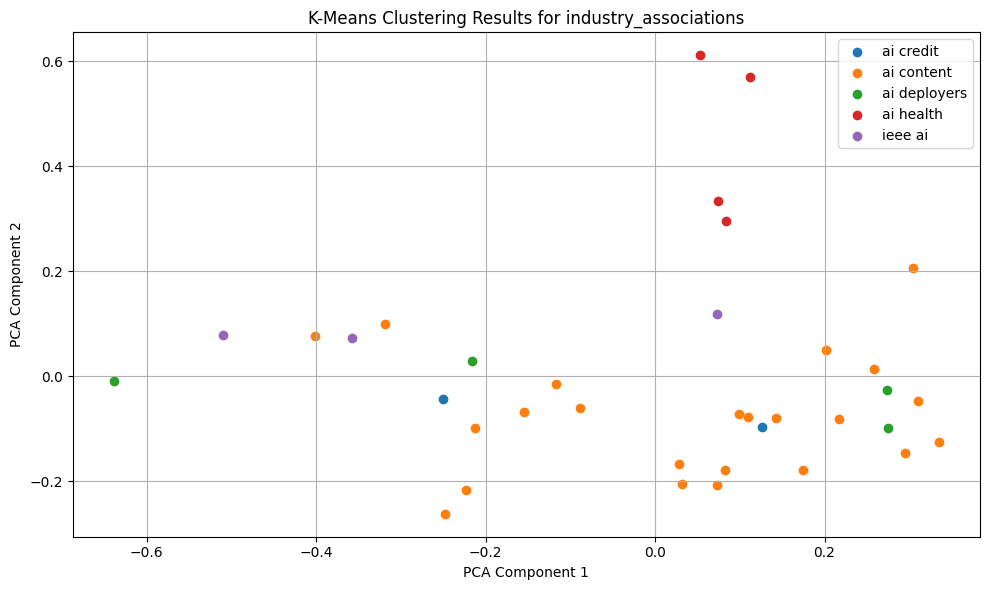

In [336]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
   'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november', 
    'the', 'and', 'for', 'did', 'type','mayo', 'dennis', 'farahnaaz', 'who', 'staa', 'least',
    'ctec', 'docket', 'web', 'ksizprx', 'phd', 'end', 'optin', 'physical', 'wanted', 'khakoo', 
    'setting', 'reach', 'comes', 'june', 'feel', 'irritating', 'senior', 'seeing', 'equivalent', 
    'hello', 'passed', 'pdf', 'comments', 'lpqd', 'vertical', 'center', 'rfi', 'comments',
    'best', 'attached', 'topic', 'already', 'dear', 'erik', 'deumens', 'deumensufl', 'franse', 'assurance',
    'dierent', 'cset', 'georgetown', 'recommend', 'dierentially', 'carnegie', 'director', 'postprocessing', 'inversion',
    'mellon', 'including', 'both', 'edu', 'elsi,' 'example', 'realistic', 'risk', 'framework', 'florida', 'system', 'different',
    'management', 'university', 'idsa', 'editorial', 'against', 'supporting', 'call', 'practices', 'regarding', 'reference', 'date',
    'material', 'documents', 'response', 'email', 'subject', 'submit', 'evaluating', 'evaulated', 'event', 'characteristics', 'zick', 'nonai',
    'general', 'essential', 'establishing', 'establishes', 'european', 'evaluates', 'example', 'evaluate', 'evaluated', 'evans', 'evaluation',
    'evaluator', 'random', 'exists', 'expected', 'expect', 'expectation', 'usenix', 'evaluationand', 'events', 'even', 'evaluators', 'class',
    'establish', 'etc', 'etchemendy', 'evaluations', 'lock', 'zicari', 'enumeration', 'entities', 'entire', 'examples', 'exact', 'door', 
    'exactly', 'evolving', 'evolves', 'everyone', 'expanded', 'existing', 'every', 'experiences', 'experience', 'ethayarajh', 'factor', 'experts',
    'factors', 'esposito', 'explain', 'erode', 'especially', 'error', 'expert', 'explanations', 'explicit', 'exploit', 'expressed', 
    'enough', 'ensure', 'ensuring', 'erm', 'into', 'john', 'city', 'focused', 'officer', 'participate', 'safe', 'new', 'fig', 'please', 'provide',
    'use', 'used', 'inherently', 'under', 'while', 'control', 'important', 'easy', 'version', 'find', 'additional', 'conducted', 'big', 'very', 'about',
    'areas', 'president', 'game', 'rate', 'incorporate', 'within', 'to', 'of', 'and', 'ustelecom', 'sifma', 'party', 'washington', 'on', 
    'hiteu', 'alliance', 'care', 'doi', 'floor', 'ctia', 'fah', 'ril', 'privacyeng', 'cfpb', 'small', 'third', '000000https', 'based', 'bsa', 
    'technet','chi', 'biden', 'csrc', 'ipd'
]

# K-Means Clustering Function for a Subset with Auto-Generated Cluster Names
def kmeans_clustering_for_category(df, category_column, target_category, text_column, n_clusters=5, max_features=2000):
    # Filter the dataframe for the specified category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    # Drop NaN values in the text column
    filtered_df = filtered_df.dropna(subset=[text_column])

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=max_features, stop_words=custom_stop_words)
    tfidf_matrix = vectorizer.fit_transform(filtered_df[text_column])

    # K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)

    # Assign clusters to documents
    filtered_df['Cluster'] = kmeans.labels_

    # Extract top terms per cluster and generate cluster names
    print(f"Top terms per cluster for category '{target_category}':")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    cluster_names = []
    for i in range(n_clusters):
        top_terms = [terms[ind] for ind in order_centroids[i, :10]]
        cluster_label = f"{top_terms[0]} {top_terms[1]}"  # Combine the top two terms for the cluster name
        cluster_names.append(cluster_label)
        print(f"Cluster {i} ({cluster_label}): {', '.join(top_terms)}")

    # Map cluster names to the DataFrame
    filtered_df['Cluster_Name'] = filtered_df['Cluster'].map(lambda x: cluster_names[x])

    # Dimensionality Reduction for Visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(tfidf_matrix.toarray())

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        cluster_data = reduced_data[filtered_df['Cluster'] == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=cluster_names[i])

    plt.title(f'K-Means Clustering Results for {target_category}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return filtered_df

# Example Usage
# Perform K-Means clustering for the 'industry_associations' category
clustered_subset_df = kmeans_clustering_for_category(df2, 'Category', 'industry_associations', 'Text', n_clusters=5)

### NIST Data Set 2: K-Means Clustering (Industry 2: Tech and Private Sector) 

Top terms per cluster for category 'tech_private_sector':
Cluster 0 (credit scoring): credit, scoring, ai, explainability, data, regulation, fairness, model, using, protected
Cluster 1 (ai model): ai, model, content, data, standards, red, teaming, safety, development, security
Cluster 2 (model ai): model, ai, ml, data, autonomous, behavior, adversary, privacy, orthopaedic, training
Cluster 3 (2023 regulations): 2023, regulations, document, gsa, ai, accessibility, reports, learn, info, feedback
Cluster 4 (spam ai): spam, ai, reviews, accuracy, detectors, text, believe, quality, detector, generated


/Users/haimanwong/miniconda/envs/hicss58/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['elsi'] not in stop_words.
  warnings.warn(


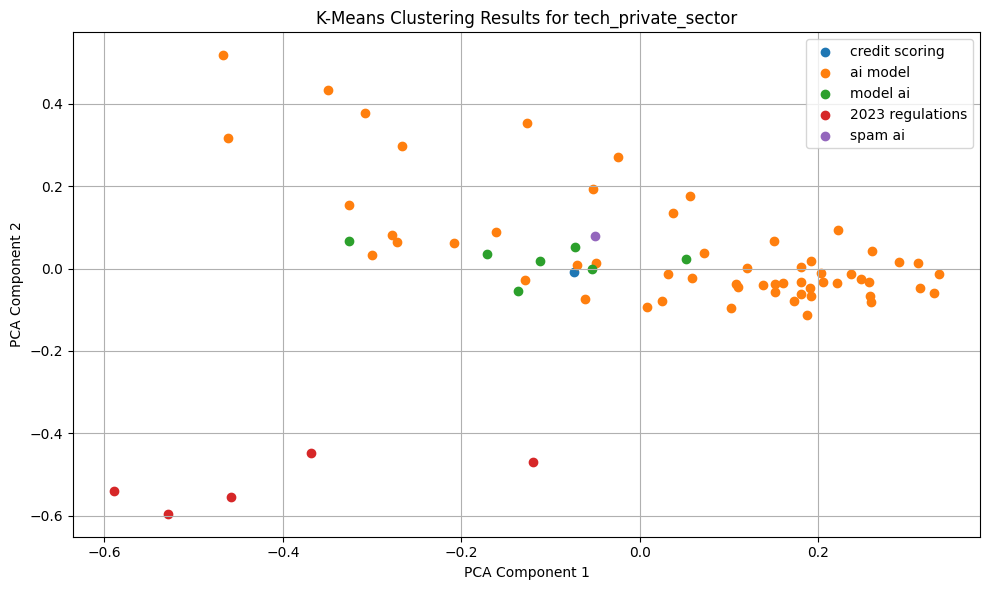

In [340]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november', 
    'the', 'and', 'for', 'did', 'type','mayo', 'dennis', 'farahnaaz', 'who', 'staa', 'least',
    'ctec', 'docket', 'web', 'ksizprx', 'phd', 'end', 'optin', 'physical', 'wanted', 'khakoo', 
    'setting', 'reach', 'comes', 'june', 'feel', 'irritating', 'senior', 'seeing', 'equivalent', 
    'hello', 'passed', 'pdf', 'comments', 'lpqd', 'vertical', 'center', 'rfi', 'comments',
    'best', 'attached', 'topic', 'already', 'dear', 'erik', 'deumens', 'deumensufl', 'franse', 'assurance',
    'dierent', 'cset', 'georgetown', 'recommend', 'dierentially', 'carnegie', 'director', 'postprocessing', 'inversion',
    'mellon', 'including', 'both', 'edu', 'elsi,' 'example', 'realistic', 'risk', 'framework', 'florida', 'system', 'different',
    'management', 'university', 'idsa', 'editorial', 'against', 'supporting', 'call', 'practices', 'regarding', 'reference', 'date',
    'material', 'documents', 'response', 'email', 'subject', 'submit', 'evaluating', 'evaulated', 'event', 'characteristics', 'zick', 'nonai',
    'general', 'essential', 'establishing', 'establishes', 'european', 'evaluates', 'example', 'evaluate', 'evaluated', 'evans', 'evaluation',
    'evaluator', 'random', 'exists', 'expected', 'expect', 'expectation', 'usenix', 'evaluationand', 'events', 'even', 'evaluators', 'class',
    'establish', 'etc', 'etchemendy', 'evaluations', 'lock', 'zicari', 'enumeration', 'entities', 'entire', 'examples', 'exact', 'door', 
    'exactly', 'evolving', 'evolves', 'everyone', 'expanded', 'existing', 'every', 'experiences', 'experience', 'ethayarajh', 'factor', 'experts',
    'factors', 'esposito', 'explain', 'erode', 'especially', 'error', 'expert', 'explanations', 'explicit', 'exploit', 'expressed', 
    'enough', 'ensure', 'ensuring', 'erm', 'into', 'john', 'city', 'focused', 'officer', 'participate', 'safe', 'new', 'fig', 'please', 'provide',
    'use', 'used', 'inherently', 'under', 'while', 'control', 'important', 'easy', 'version', 'find', 'additional', 'conducted', 'big', 'very', 'about',
    'areas', 'president', 'game', 'rate', 'incorporate', 'within', 'to', 'of', 'and', 'ustelecom', 'sifma', 'party', 'washington', 'on', 
    'hiteu', 'alliance', 'care', 'doi', 'floor', 'ctia', 'fah', 'ril', 'privacyeng', 'cfpb', 'small', 'third', '000000https', 'based', 'bsa', 
    'technet','chi', 'biden', 'csrc', 'ipd', 'informaɵon', 'notice', 'give', 'main', 'ctc', 'arɵﬁcial', 'keel'
]

# K-Means Clustering Function for a Subset with Auto-Generated Cluster Names
def kmeans_clustering_for_category(df, category_column, target_category, text_column, n_clusters=5, max_features=2000):
    # Filter the dataframe for the specified category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    # Drop NaN values in the text column
    filtered_df = filtered_df.dropna(subset=[text_column])

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=max_features, stop_words=custom_stop_words)
    tfidf_matrix = vectorizer.fit_transform(filtered_df[text_column])

    # K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)

    # Assign clusters to documents
    filtered_df['Cluster'] = kmeans.labels_

    # Extract top terms per cluster and generate cluster names
    print(f"Top terms per cluster for category '{target_category}':")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    cluster_names = []
    for i in range(n_clusters):
        top_terms = [terms[ind] for ind in order_centroids[i, :10]]
        cluster_label = f"{top_terms[0]} {top_terms[1]}"  # Combine the top two terms for the cluster name
        cluster_names.append(cluster_label)
        print(f"Cluster {i} ({cluster_label}): {', '.join(top_terms)}")

    # Map cluster names to the DataFrame
    filtered_df['Cluster_Name'] = filtered_df['Cluster'].map(lambda x: cluster_names[x])

    # Dimensionality Reduction for Visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(tfidf_matrix.toarray())

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        cluster_data = reduced_data[filtered_df['Cluster'] == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=cluster_names[i])

    plt.title(f'K-Means Clustering Results for {target_category}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return filtered_df

# Example Usage
# Perform K-Means clustering for the 'industry_associations' category
clustered_subset_df = kmeans_clustering_for_category(df2, 'Category', 'tech_private_sector', 'Text', n_clusters=5)

### NIST Data Set 2: K-Means Clustering (Industry 3: Advocacy and Non-Profit Organizations) 

/Users/haimanwong/miniconda/envs/hicss58/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['elsi'] not in stop_words.
  warnings.warn(


Top terms per cluster for category 'advocacy':
Cluster 0 (ai model): ai, model, content, generative, 2023, red, standards, teaming, security, information
Cluster 1 (energy climate): energy, climate, ai, disinformation, carbon, water, emissions, data, social, training
Cluster 2 (online consensual): online, consensual, intimate, pornography, platforms, deepfake, violence, gender, harassment, porn
Cluster 3 (ai content): ai, content, standards, data, synthetic, model, development, media, credentials, guidance
Cluster 4 (equity ai): equity, ai, consumers, administration, racial, discrimination, agenda, order, government, executive


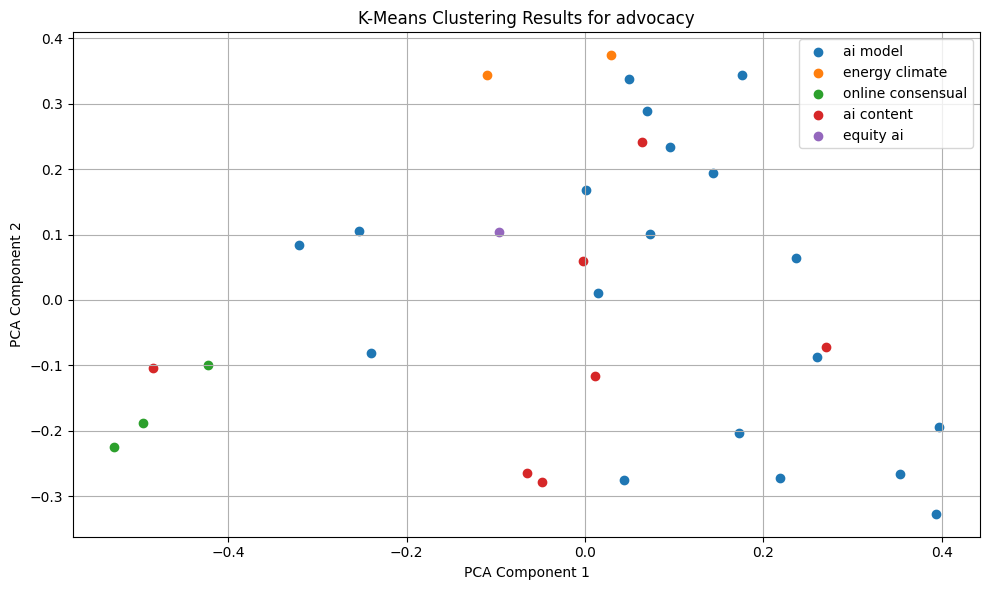

In [342]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november', 
    'the', 'and', 'for', 'did', 'type','mayo', 'dennis', 'farahnaaz', 'who', 'staa', 'least',
    'ctec', 'docket', 'web', 'ksizprx', 'phd', 'end', 'optin', 'physical', 'wanted', 'khakoo', 
    'setting', 'reach', 'comes', 'june', 'feel', 'irritating', 'senior', 'seeing', 'equivalent', 
    'hello', 'passed', 'pdf', 'comments', 'lpqd', 'vertical', 'center', 'rfi', 'comments',
    'best', 'attached', 'topic', 'already', 'dear', 'erik', 'deumens', 'deumensufl', 'franse', 'assurance',
    'dierent', 'cset', 'georgetown', 'recommend', 'dierentially', 'carnegie', 'director', 'postprocessing', 'inversion',
    'mellon', 'including', 'both', 'edu', 'elsi,' 'example', 'realistic', 'risk', 'framework', 'florida', 'system', 'different',
    'management', 'university', 'idsa', 'editorial', 'against', 'supporting', 'call', 'practices', 'regarding', 'reference', 'date',
    'material', 'documents', 'response', 'email', 'subject', 'submit', 'evaluating', 'evaulated', 'event', 'characteristics', 'zick', 'nonai',
    'general', 'essential', 'establishing', 'establishes', 'european', 'evaluates', 'example', 'evaluate', 'evaluated', 'evans', 'evaluation',
    'evaluator', 'random', 'exists', 'expected', 'expect', 'expectation', 'usenix', 'evaluationand', 'events', 'even', 'evaluators', 'class',
    'establish', 'etc', 'etchemendy', 'evaluations', 'lock', 'zicari', 'enumeration', 'entities', 'entire', 'examples', 'exact', 'door', 
    'exactly', 'evolving', 'evolves', 'everyone', 'expanded', 'existing', 'every', 'experiences', 'experience', 'ethayarajh', 'factor', 'experts',
    'factors', 'esposito', 'explain', 'erode', 'especially', 'error', 'expert', 'explanations', 'explicit', 'exploit', 'expressed', 
    'enough', 'ensure', 'ensuring', 'erm', 'into', 'john', 'city', 'focused', 'officer', 'participate', 'safe', 'new', 'fig', 'please', 'provide',
    'use', 'used', 'inherently', 'under', 'while', 'control', 'important', 'easy', 'version', 'find', 'additional', 'conducted', 'big', 'very', 'about',
    'areas', 'president', 'game', 'rate', 'incorporate', 'within', 'to', 'of', 'and', 'ustelecom', 'sifma', 'party', 'washington', 'on', 
    'hiteu', 'alliance', 'care', 'doi', 'floor', 'ctia', 'fah', 'ril', 'privacyeng', 'cfpb', 'small', 'third', '000000https', 'based', 'bsa', 
    'technet','chi', 'biden', 'csrc', 'ipd', 'informaɵon', 'notice', 'give', 'main', 'ctc', 'arɵﬁcial', 'keel', 'swgfl', 'girls', 'young', 'c2pa',
    'serc', 'pai', 'helpline'
]

# K-Means Clustering Function for a Subset with Auto-Generated Cluster Names
def kmeans_clustering_for_category(df, category_column, target_category, text_column, n_clusters=5, max_features=2000):
    # Filter the dataframe for the specified category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    # Drop NaN values in the text column
    filtered_df = filtered_df.dropna(subset=[text_column])

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=max_features, stop_words=custom_stop_words)
    tfidf_matrix = vectorizer.fit_transform(filtered_df[text_column])

    # K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)

    # Assign clusters to documents
    filtered_df['Cluster'] = kmeans.labels_

    # Extract top terms per cluster and generate cluster names
    print(f"Top terms per cluster for category '{target_category}':")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    cluster_names = []
    for i in range(n_clusters):
        top_terms = [terms[ind] for ind in order_centroids[i, :10]]
        cluster_label = f"{top_terms[0]} {top_terms[1]}"  # Combine the top two terms for the cluster name
        cluster_names.append(cluster_label)
        print(f"Cluster {i} ({cluster_label}): {', '.join(top_terms)}")

    # Map cluster names to the DataFrame
    filtered_df['Cluster_Name'] = filtered_df['Cluster'].map(lambda x: cluster_names[x])

    # Dimensionality Reduction for Visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(tfidf_matrix.toarray())

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        cluster_data = reduced_data[filtered_df['Cluster'] == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=cluster_names[i])

    plt.title(f'K-Means Clustering Results for {target_category}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return filtered_df

# Example Usage
# Perform K-Means clustering for the 'industry_associations' category
clustered_subset_df = kmeans_clustering_for_category(df2, 'Category', 'advocacy', 'Text', n_clusters=5)

### NIST Data Set 2: K-Means Clustering (Industry 4: Government and Public Sector)

Top terms per cluster for category 'gov_public_sector':
Cluster 0 (ai tools): ai, tools, generative, efforts, security, local, level, guidance, challenges, plan
Cluster 1 (executive order): executive, order, ai, attorney, defense, production, government, presidential, federal, administration


/Users/haimanwong/miniconda/envs/hicss58/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['elsi'] not in stop_words.
  warnings.warn(


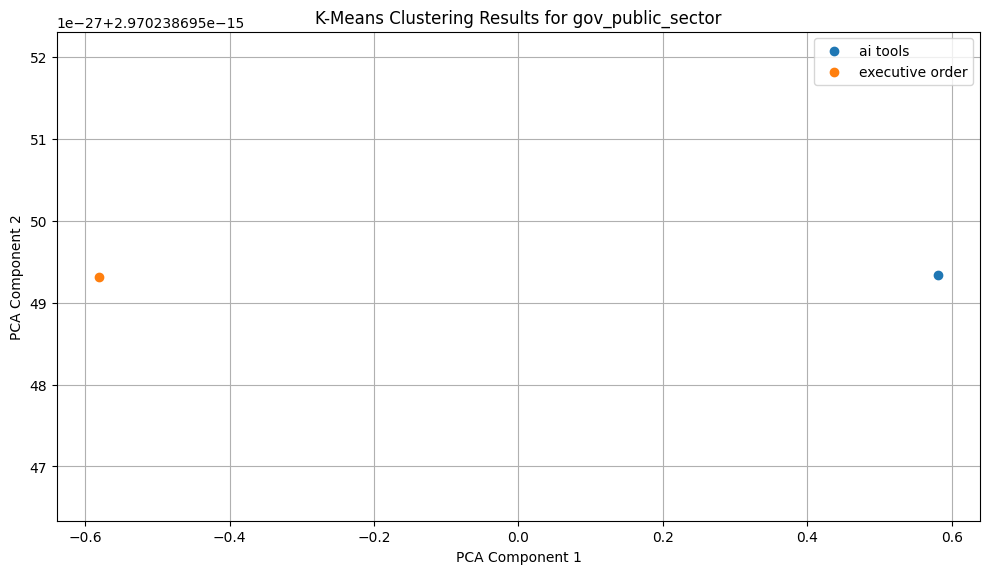

In [356]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november', 
    'the', 'and', 'for', 'did', 'type','mayo', 'dennis', 'farahnaaz', 'who', 'staa', 'least',
    'ctec', 'docket', 'web', 'ksizprx', 'phd', 'end', 'optin', 'physical', 'wanted', 'khakoo', 
    'setting', 'reach', 'comes', 'june', 'feel', 'irritating', 'senior', 'seeing', 'equivalent', 
    'hello', 'passed', 'pdf', 'comments', 'lpqd', 'vertical', 'center', 'rfi', 'comments',
    'best', 'attached', 'topic', 'already', 'dear', 'erik', 'deumens', 'deumensufl', 'franse', 'assurance',
    'dierent', 'cset', 'georgetown', 'recommend', 'dierentially', 'carnegie', 'director', 'postprocessing', 'inversion',
    'mellon', 'including', 'both', 'edu', 'elsi,' 'example', 'realistic', 'risk', 'framework', 'florida', 'system', 'different',
    'management', 'university', 'idsa', 'editorial', 'against', 'supporting', 'call', 'practices', 'regarding', 'reference', 'date',
    'material', 'documents', 'response', 'email', 'subject', 'submit', 'evaluating', 'evaulated', 'event', 'characteristics', 'zick', 'nonai',
    'general', 'essential', 'establishing', 'establishes', 'european', 'evaluates', 'example', 'evaluate', 'evaluated', 'evans', 'evaluation',
    'evaluator', 'random', 'exists', 'expected', 'expect', 'expectation', 'usenix', 'evaluationand', 'events', 'even', 'evaluators', 'class',
    'establish', 'etc', 'etchemendy', 'evaluations', 'lock', 'zicari', 'enumeration', 'entities', 'entire', 'examples', 'exact', 'door', 
    'exactly', 'evolving', 'evolves', 'everyone', 'expanded', 'existing', 'every', 'experiences', 'experience', 'ethayarajh', 'factor', 'experts',
    'factors', 'esposito', 'explain', 'erode', 'especially', 'error', 'expert', 'explanations', 'explicit', 'exploit', 'expressed', 
    'enough', 'ensure', 'ensuring', 'erm', 'into', 'john', 'city', 'focused', 'officer', 'participate', 'safe', 'new', 'fig', 'please', 'provide',
    'use', 'used', 'inherently', 'under', 'while', 'control', 'important', 'easy', 'version', 'find', 'additional', 'conducted', 'big', 'very', 'about',
    'areas', 'president', 'game', 'rate', 'incorporate', 'within', 'to', 'of', 'and', 'ustelecom', 'sifma', 'party', 'washington', 'on', 
    'hiteu', 'alliance', 'care', 'doi', 'floor', 'ctia', 'fah', 'ril', 'privacyeng', 'cfpb', 'small', 'third', '000000https', 'based', 'bsa', 
    'technet','chi', 'biden', 'csrc', 'ipd', 'informaɵon', 'notice', 'give', 'main', 'ctc', 'arɵﬁcial', 'keel', 'swgfl', 'girls', 'young', 'c2pa',
    'serc', 'pai', 'helpline', 'profiles', 'dl', 'abs', 'preprint', 'uc', 'davis', 'useful', 'several', 'boulder', 'office', 'cu', 'subsection',
    'gig', 'children', 'sort', 'awe', 'faq', 'made', '17', 'child', 'keep', 'macrosystem'
]

# K-Means Clustering Function for a Subset with Auto-Generated Cluster Names
def kmeans_clustering_for_category(df, category_column, target_category, text_column, n_clusters=2, max_features=2000):
    # Filter the dataframe for the specified category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    # Drop NaN values in the text column
    filtered_df = filtered_df.dropna(subset=[text_column])

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=max_features, stop_words=custom_stop_words)
    tfidf_matrix = vectorizer.fit_transform(filtered_df[text_column])

    # K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)

    # Assign clusters to documents
    filtered_df['Cluster'] = kmeans.labels_

    # Extract top terms per cluster and generate cluster names
    print(f"Top terms per cluster for category '{target_category}':")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    cluster_names = []
    for i in range(n_clusters):
        top_terms = [terms[ind] for ind in order_centroids[i, :10]]
        cluster_label = f"{top_terms[0]} {top_terms[1]}"  # Combine the top two terms for the cluster name
        cluster_names.append(cluster_label)
        print(f"Cluster {i} ({cluster_label}): {', '.join(top_terms)}")

    # Map cluster names to the DataFrame
    filtered_df['Cluster_Name'] = filtered_df['Cluster'].map(lambda x: cluster_names[x])

 # Dimensionality Reduction for Visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(tfidf_matrix.toarray())

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        cluster_data = reduced_data[filtered_df['Cluster'] == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=cluster_names[i])

    plt.title(f'K-Means Clustering Results for {target_category}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return filtered_df

# Example Usage
# Perform K-Means clustering for the 'industry_associations' category
clustered_subset_df = kmeans_clustering_for_category(df2, 'Category', 'gov_public_sector', 'Text', n_clusters=2)

### NIST Data Set 2: K-Means Clustering (Industry 5: Research Institutions and Academia)

Top terms per cluster for category 'academia':
Cluster 0 (llms levels): llms, levels, ai, biases, less, data, health, artificial, intelligence, research
Cluster 1 (ai standards): ai, standards, research, technical, teaming, engineering, 2023, model, generative, biological
Cluster 2 (2023 ai): 2023, ai, 2021, acm, proceedings, human, 2022, language, conference, text
Cluster 3 (data privacy): data, privacy, security, implement, checklist, protection, access, cloud, compliance, network
Cluster 4 (profile identity): profile, identity, online, participants, offline, people, workers, work, content, meet


/Users/haimanwong/miniconda/envs/hicss58/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['elsi'] not in stop_words.
  warnings.warn(


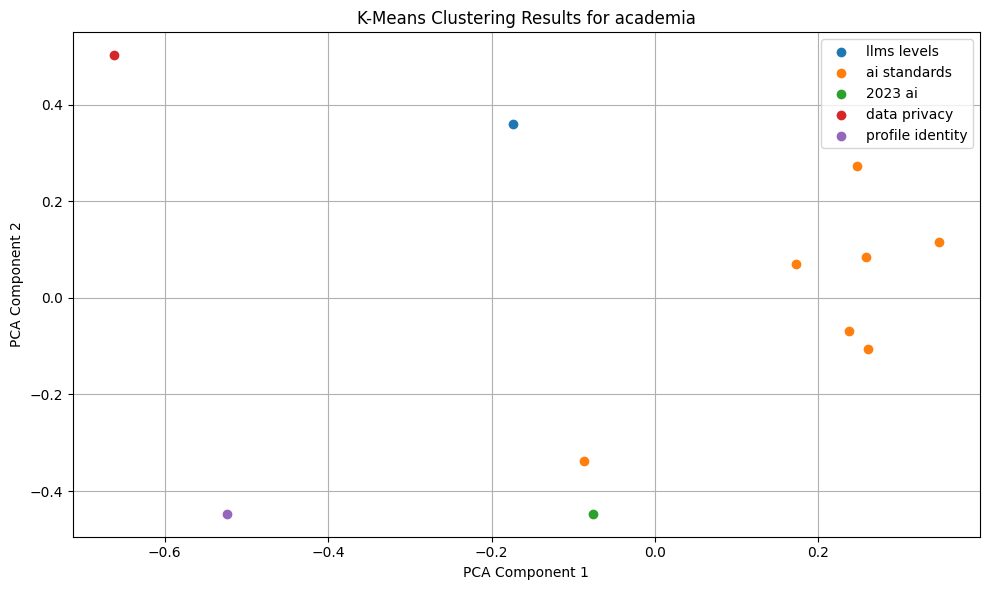

In [346]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
  'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november', 
    'the', 'and', 'for', 'did', 'type','mayo', 'dennis', 'farahnaaz', 'who', 'staa', 'least',
    'ctec', 'docket', 'web', 'ksizprx', 'phd', 'end', 'optin', 'physical', 'wanted', 'khakoo', 
    'setting', 'reach', 'comes', 'june', 'feel', 'irritating', 'senior', 'seeing', 'equivalent', 
    'hello', 'passed', 'pdf', 'comments', 'lpqd', 'vertical', 'center', 'rfi', 'comments',
    'best', 'attached', 'topic', 'already', 'dear', 'erik', 'deumens', 'deumensufl', 'franse', 'assurance',
    'dierent', 'cset', 'georgetown', 'recommend', 'dierentially', 'carnegie', 'director', 'postprocessing', 'inversion',
    'mellon', 'including', 'both', 'edu', 'elsi,' 'example', 'realistic', 'risk', 'framework', 'florida', 'system', 'different',
    'management', 'university', 'idsa', 'editorial', 'against', 'supporting', 'call', 'practices', 'regarding', 'reference', 'date',
    'material', 'documents', 'response', 'email', 'subject', 'submit', 'evaluating', 'evaulated', 'event', 'characteristics', 'zick', 'nonai',
    'general', 'essential', 'establishing', 'establishes', 'european', 'evaluates', 'example', 'evaluate', 'evaluated', 'evans', 'evaluation',
    'evaluator', 'random', 'exists', 'expected', 'expect', 'expectation', 'usenix', 'evaluationand', 'events', 'even', 'evaluators', 'class',
    'establish', 'etc', 'etchemendy', 'evaluations', 'lock', 'zicari', 'enumeration', 'entities', 'entire', 'examples', 'exact', 'door', 
    'exactly', 'evolving', 'evolves', 'everyone', 'expanded', 'existing', 'every', 'experiences', 'experience', 'ethayarajh', 'factor', 'experts',
    'factors', 'esposito', 'explain', 'erode', 'especially', 'error', 'expert', 'explanations', 'explicit', 'exploit', 'expressed', 
    'enough', 'ensure', 'ensuring', 'erm', 'into', 'john', 'city', 'focused', 'officer', 'participate', 'safe', 'new', 'fig', 'please', 'provide',
    'use', 'used', 'inherently', 'under', 'while', 'control', 'important', 'easy', 'version', 'find', 'additional', 'conducted', 'big', 'very', 'about',
    'areas', 'president', 'game', 'rate', 'incorporate', 'within', 'to', 'of', 'and', 'ustelecom', 'sifma', 'party', 'washington', 'on', 
    'hiteu', 'alliance', 'care', 'doi', 'floor', 'ctia', 'fah', 'ril', 'privacyeng', 'cfpb', 'small', 'third', '000000https', 'based', 'bsa', 
    'technet','chi', 'biden', 'csrc', 'ipd', 'informaɵon', 'notice', 'give', 'main', 'ctc', 'arɵﬁcial', 'keel', 'swgfl', 'girls', 'young', 'c2pa',
    'serc', 'pai', 'helpline', 'profiles', 'dl', 'abs', 'preprint', 'uc', 'davis', 'useful', 'several', 'boulder', 'office', 'cu', 'subsection',
    'gig'
]

# K-Means Clustering Function for a Subset with Auto-Generated Cluster Names
def kmeans_clustering_for_category(df, category_column, target_category, text_column, n_clusters=5, max_features=2000):
    # Filter the dataframe for the specified category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    # Drop NaN values in the text column
    filtered_df = filtered_df.dropna(subset=[text_column])

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=max_features, stop_words=custom_stop_words)
    tfidf_matrix = vectorizer.fit_transform(filtered_df[text_column])

    # K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)

    # Assign clusters to documents
    filtered_df['Cluster'] = kmeans.labels_

    # Extract top terms per cluster and generate cluster names
    print(f"Top terms per cluster for category '{target_category}':")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    cluster_names = []
    for i in range(n_clusters):
        top_terms = [terms[ind] for ind in order_centroids[i, :10]]
        cluster_label = f"{top_terms[0]} {top_terms[1]}"  # Combine the top two terms for the cluster name
        cluster_names.append(cluster_label)
        print(f"Cluster {i} ({cluster_label}): {', '.join(top_terms)}")

    # Map cluster names to the DataFrame
    filtered_df['Cluster_Name'] = filtered_df['Cluster'].map(lambda x: cluster_names[x])

    # Dimensionality Reduction for Visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(tfidf_matrix.toarray())

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        cluster_data = reduced_data[filtered_df['Cluster'] == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=cluster_names[i])

    plt.title(f'K-Means Clustering Results for {target_category}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return filtered_df

# Example Usage
# Perform K-Means clustering for the 'industry_associations' category
clustered_subset_df = kmeans_clustering_for_category(df2, 'Category', 'academia', 'Text', n_clusters=5)

### NIST Data Set 2: K-Means Clustering (Industry 6: Independent)

/Users/haimanwong/miniconda/envs/hicss58/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['elsi'] not in stop_words.
  warnings.warn(


Top terms per cluster for category 'independent':
Cluster 0 (art creativity): art, creativity, 2023, human, ai, arts, anthropocentric, regulations, deep, people
Cluster 1 (2023 regulations): 2023, regulations, document, ai, foia, gsa, accessibility, learn, user, agencies
Cluster 2 (red team): red, team, ai, teaming, llm, language, testing, llms, vulnerabilities, model
Cluster 3 (ai safety): ai, safety, cases, csam, congress, arguments, case, argument, images, legislation
Cluster 4 (ai model): ai, model, intelligence, content, development, data, human, artificial, rmf, 2023


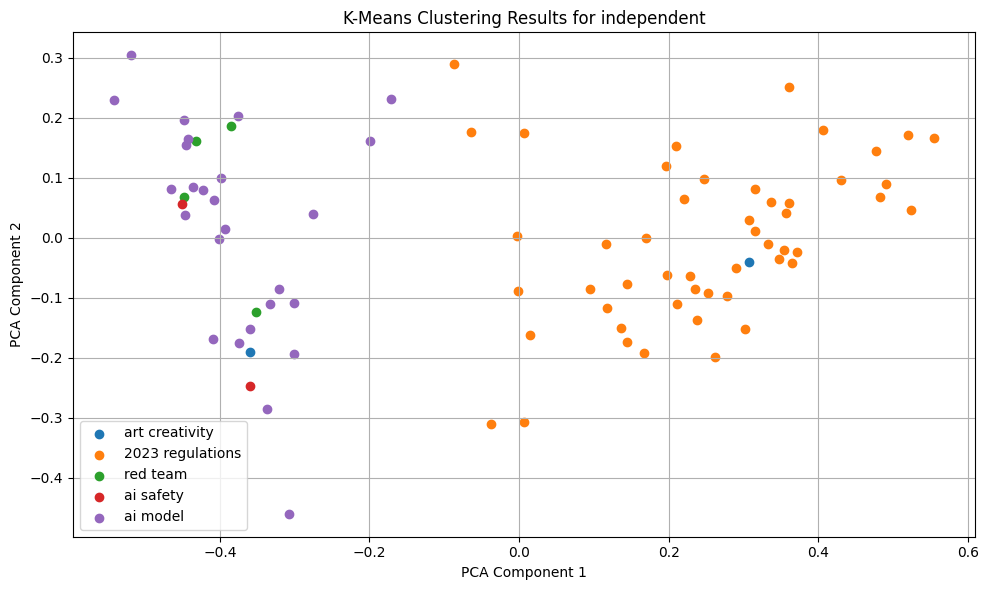

In [350]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november', 
    'the', 'and', 'for', 'did', 'type','mayo', 'dennis', 'farahnaaz', 'who', 'staa', 'least',
    'ctec', 'docket', 'web', 'ksizprx', 'phd', 'end', 'optin', 'physical', 'wanted', 'khakoo', 
    'setting', 'reach', 'comes', 'june', 'feel', 'irritating', 'senior', 'seeing', 'equivalent', 
    'hello', 'passed', 'pdf', 'comments', 'lpqd', 'vertical', 'center', 'rfi', 'comments',
    'best', 'attached', 'topic', 'already', 'dear', 'erik', 'deumens', 'deumensufl', 'franse', 'assurance',
    'dierent', 'cset', 'georgetown', 'recommend', 'dierentially', 'carnegie', 'director', 'postprocessing', 'inversion',
    'mellon', 'including', 'both', 'edu', 'elsi,' 'example', 'realistic', 'risk', 'framework', 'florida', 'system', 'different',
    'management', 'university', 'idsa', 'editorial', 'against', 'supporting', 'call', 'practices', 'regarding', 'reference', 'date',
    'material', 'documents', 'response', 'email', 'subject', 'submit', 'evaluating', 'evaulated', 'event', 'characteristics', 'zick', 'nonai',
    'general', 'essential', 'establishing', 'establishes', 'european', 'evaluates', 'example', 'evaluate', 'evaluated', 'evans', 'evaluation',
    'evaluator', 'random', 'exists', 'expected', 'expect', 'expectation', 'usenix', 'evaluationand', 'events', 'even', 'evaluators', 'class',
    'establish', 'etc', 'etchemendy', 'evaluations', 'lock', 'zicari', 'enumeration', 'entities', 'entire', 'examples', 'exact', 'door', 
    'exactly', 'evolving', 'evolves', 'everyone', 'expanded', 'existing', 'every', 'experiences', 'experience', 'ethayarajh', 'factor', 'experts',
    'factors', 'esposito', 'explain', 'erode', 'especially', 'error', 'expert', 'explanations', 'explicit', 'exploit', 'expressed', 
    'enough', 'ensure', 'ensuring', 'erm', 'into', 'john', 'city', 'focused', 'officer', 'participate', 'safe', 'new', 'fig', 'please', 'provide',
    'use', 'used', 'inherently', 'under', 'while', 'control', 'important', 'easy', 'version', 'find', 'additional', 'conducted', 'big', 'very', 'about',
    'areas', 'president', 'game', 'rate', 'incorporate', 'within', 'to', 'of', 'and', 'ustelecom', 'sifma', 'party', 'washington', 'on', 
    'hiteu', 'alliance', 'care', 'doi', 'floor', 'ctia', 'fah', 'ril', 'privacyeng', 'cfpb', 'small', 'third', '000000https', 'based', 'bsa', 
    'technet','chi', 'biden', 'csrc', 'ipd', 'informaɵon', 'notice', 'give', 'main', 'ctc', 'arɵﬁcial', 'keel', 'swgfl', 'girls', 'young', 'c2pa',
    'serc', 'pai', 'helpline', 'profiles', 'dl', 'abs', 'preprint', 'uc', 'davis', 'useful', 'several', 'boulder', 'office', 'cu', 'subsection',
    'gig', 'children', 'sort', 'awe', 'faq', 'made', '17', 'child', 'keep', 'macrosystem'
]

# K-Means Clustering Function for a Subset with Auto-Generated Cluster Names
def kmeans_clustering_for_category(df, category_column, target_category, text_column, n_clusters=5, max_features=2000):
    # Filter the dataframe for the specified category
    filtered_df = df[df[category_column] == target_category]
    
    if filtered_df.empty:
        print(f"No data found for category: {target_category}")
        return
    
    # Drop NaN values in the text column
    filtered_df = filtered_df.dropna(subset=[text_column])

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=max_features, stop_words=custom_stop_words)
    tfidf_matrix = vectorizer.fit_transform(filtered_df[text_column])

    # K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)

    # Assign clusters to documents
    filtered_df['Cluster'] = kmeans.labels_

    # Extract top terms per cluster and generate cluster names
    print(f"Top terms per cluster for category '{target_category}':")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    cluster_names = []
    for i in range(n_clusters):
        top_terms = [terms[ind] for ind in order_centroids[i, :10]]
        cluster_label = f"{top_terms[0]} {top_terms[1]}"  # Combine the top two terms for the cluster name
        cluster_names.append(cluster_label)
        print(f"Cluster {i} ({cluster_label}): {', '.join(top_terms)}")

    # Map cluster names to the DataFrame
    filtered_df['Cluster_Name'] = filtered_df['Cluster'].map(lambda x: cluster_names[x])

    # Dimensionality Reduction for Visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(tfidf_matrix.toarray())

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        cluster_data = reduced_data[filtered_df['Cluster'] == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=cluster_names[i])

    plt.title(f'K-Means Clustering Results for {target_category}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return filtered_df

# Example Usage
# Perform K-Means clustering for the 'industry_associations' category
clustered_subset_df = kmeans_clustering_for_category(df2, 'Category', 'independent', 'Text', n_clusters=5)

### Combined NIST Data: K-Means Clustering

Top terms per cluster:
Cluster 0 (content ai): content, ai, digital, watermarking, media
Cluster 1 (2023 notice): 2023, notice, regulations, document, foia
Cluster 2 (ai 2021): ai, 2021, data, intelligence, model
Cluster 3 (ai health): ai, health, care, rfi, executive
Cluster 4 (ai model): ai, model, data, development, standards


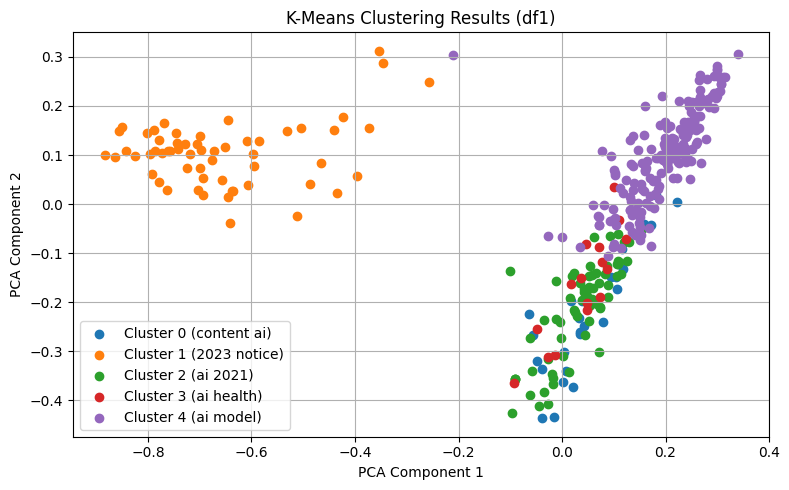

In [261]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Define custom stopwords
custom_stop_words = [
    'et', 'al', 'â', 'j', 'pp', '10', 'with', 'are', 'that', 'this',
    'should', 'will', 'may', 'not', 'can', 'from', 'have', 'each', 
    'use', 'more', 'these', 'other', 'was', 'they', 'you', 'how', 'what', 
    'which', 'its', 'their', 'august', 'york', 'could', 'our', 'there', 'however',
    'such','all', 'with', 'but', 'like', 'thursday', 'forthcoming', 'ours', 'yes', 
    'black', 'cleveland', 'pendingpost', 'tabassi', 'any', 'has', 'comment', 
    'submission', 'see', 'submitter', 'doc', 'nist', 'must', 'also', 'include', 
    'includes', 'dierences', 'imagepng', 'tony', 'pamela', 'jeroen', 'systems', 
    'models', 'an', 'or', 'as', 'be', 'is', 'in', 'www', 'by', 'we', '0001', 
    '0009', 'sp', 'set', 'it', '800', 'https', 'at', 'would', 'if', 'org', '226', 
    '19', 'gov', 'your', 'arxiv', '11', '24', 'pm', 'com', 'risks', 'note', 'november', 
    'the', 'and', 'for', 'did', 'type', 'attachment', 'date', 'risk', 'framework', 'attached',
    'management', 'comments', 'pdf', 'new', 'status', 'please', 'response', 'web', 'of', 'to',
    'on'
]

# K-Means Clustering Function
def kmeans_clustering_with_visualization(df, text_column, n_clusters=5, max_features=2000):
    # Drop NaN values
    df = df.dropna(subset=[text_column])

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=max_features, stop_words=custom_stop_words)
    tfidf_matrix = vectorizer.fit_transform(df[text_column])

    # K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)

    # Assign clusters to documents
    df['Cluster'] = kmeans.labels_

    # Extract top terms per cluster and generate cluster names
    print("Top terms per cluster:")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    cluster_names = []
    for i in range(n_clusters):
        top_terms = [terms[ind] for ind in order_centroids[i, :5]]  # Top 5 terms
        cluster_label = " ".join(top_terms[:2])  # Use the top 2 terms for naming
        cluster_names.append(cluster_label)
        print(f"Cluster {i} ({cluster_label}): ", end="")
        print(", ".join(top_terms))

    # Dimensionality Reduction for Visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(tfidf_matrix.toarray())

    # Plot the clusters
    plt.figure(figsize=(8, 5))  # Reduced size for easier screenshotting
    for i in range(n_clusters):
        cluster_data = reduced_data[df['Cluster'] == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i} ({cluster_names[i]})')

    plt.title('K-Means Clustering Results (df1)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return df

# Example Usage
# Assuming df1 is a pandas DataFrame with a column 'Text'
clustered_df1 = kmeans_clustering_with_visualization(df3, 'Text', n_clusters=5)